# AI PROJECT - CLASSIFICATION AND PREDICTION MODELS


## Group Members: 
### Claudia Zambella, Camilla Cestaro , Maximilian Alexander Mekiska, Gauthier Coppens d'Eeckenbrugge

# APPROACH TO CHALLENGE

Welcome to our project.

Our group of 4 Cyber Risk Strategy and Governance students have worked with determination to give our best solution.

The journey was filled with long coding sessions, neverending group meetings and many very creative ways to approach this dataset.

We are proud to see where this project has lead us and are convinced you will appreciate the effort put into this presentation.

We hope going through this notebook will be a clear and smooth experience.

Enjoy the journey.

# PIPELINE:


### VISUALIZATION

    1. Train Set
    2. Test Set
    
    
### CLASSIFIERS

    1. Data Preparation and Manipulation
    2. Data Preprocessing
    3. Classification with Numerical Columns
        a) Prediction of 'Class'
        b) Prediction of 'Binary Class': Converting class attribute into binary
        c) Prediction of 'Attack type'
            c.i) Random Downsampling
                
    4. Classification Introducing Additional Features
        a) Day of the Week
        b) Flags
        c) IP Address
        d) All 3 of them
        e) Counting total requests in a given amount of seconds       
        
    5. Clustering
        a) Data Preprocessing
        b) Kmeans
        c) DBScan
        
### ANDROID MALWARE DETECTION      
    
               

The following line will output all graphs produced in a higher resolution

In [1]:
%config InlineBackend.figure_format ='retina'

# VISUALIZATION

# 1) Train set

## Network Traffic Analysis

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [151]:
train_df =pd.read_csv('/Users/mmekiska/Desktop/AI project/data/NetworkTraffic/CIDDS-001-internal-week1_10pcSample.csv')
test_df = pd.read_csv('/Users/mmekiska/Desktop/AI project/data/NetworkTraffic/CIDDS-001-internal-week2_10pcSample.csv')

/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Here we drop "Unnamed: 0". It corresponds to the indexes given in the csv file, and we don't need them to visualize the data.

In [152]:
train_df=train_df.drop(columns="Unnamed: 0")
test_df=test_df.drop(columns="Unnamed: 0")

Let's have a quick look at our dataset:

In [154]:
train_df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-15 00:01:17.728,0.047,TCP,192.168.220.16,45586,10000_35,443.0,5,906,1,.AP.S.,0,normal,---,---,---
1,2017-03-15 00:01:18.457,0.170,TCP,10003_195,80,192.168.220.16,48286.0,3,908,1,.AP.S.,32,normal,---,---,---
2,2017-03-15 00:01:18.511,0.003,TCP,10002_113,443,192.168.220.16,49062.0,2,1089,1,.AP...,32,normal,---,---,---
3,2017-03-15 00:01:22.400,0.000,TCP,EXT_SERVER,8082,192.168.220.15,37039.0,1,212,1,.AP...,32,normal,---,---,---
4,2017-03-15 00:01:24.152,0.266,TCP,192.168.200.9,52290,EXT_SERVER,8082.0,2,319,1,.AP...,0,normal,---,---,---


## Description of the data:

In [155]:
print("The number of columns is",train_df.shape[1])

The number of columns is 16


In [156]:
print("The number of rows is",len(train_df.index))

The number of rows is 845152


In [157]:
print("Number of different types of 'class'=", len(train_df['class'].unique()))

print("Number of occurrences of each type of class:")
train_df.groupby('class').size().reset_index().sort_values(0, ascending=False).rename(columns={0:'cnt'})

Number of different types of 'class'= 3
Number of occurrences of each type of class:


,class,cnt
1,normal,700513
0,attacker,75124
2,victim,69515


In [158]:
print("Values taken by the attackType attribute:")
train_df.groupby('attackType').size().reset_index().sort_values(0,ascending=False).rename(columns={0:'cnt'})

Values taken by the attackType attribute:


,attackType,cnt
0,---,700513
2,dos,125430
4,portScan,18686
3,pingScan,355
1,bruteForce,168


As it makes no sense for our analysis to keep 'Bytes' as objects, let's convert this column to floats:

In [159]:
def converting(df):
    o = []
    df.tolist()
    for i in (df):
        try:
            if 'M' and '.' in i:
                o.append(float(i.replace('M', '').replace('.',''))*100000)
            else:
                o.append(float(i))
        except:
            o.append(i)
    return o

In [160]:
list_train_bytes = converting(train_df['Bytes'])
df_train_bytes = pd.DataFrame(list_train_bytes)

In [161]:
train_df = train_df.drop("Bytes", axis=1)
train_df['Bytes'] = df_train_bytes

In [162]:
print("Type of the features:")
train_df.info()

Type of the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845152 entries, 0 to 845151
Data columns (total 16 columns):
Date first seen      845152 non-null object
Duration             845152 non-null float64
Proto                845152 non-null object
Src IP Addr          845152 non-null object
Src Pt               845152 non-null int64
Dst IP Addr          845152 non-null object
Dst Pt               845152 non-null float64
Packets              845152 non-null int64
Flows                845152 non-null int64
Flags                845152 non-null object
Tos                  845152 non-null int64
class                845152 non-null object
attackType           845152 non-null object
attackID             845152 non-null object
attackDescription    845152 non-null object
Bytes                845152 non-null float64
dtypes: float64(3), int64(4), object(9)
memory usage: 103.2+ MB


In [163]:
print("Columns containing numeric values:")
list(train_df._get_numeric_data())

Columns containing numeric values:


['Duration', 'Src Pt', 'Dst Pt', 'Packets', 'Flows', 'Tos', 'Bytes']

## Do they all correspond to numeric variables?

Considering that it does not make any sense to compare categorical values (even if they are of a numeric form), it is clear that some of the columns selected previously for containing numeric values are still categorical variables.

Indeed, comparing different values corresponding to Source Ports, Destination Ports, Flows, or Tos with either "<" or ">" does not answer any question we might have concerning the data.

Therefore, these values are not numeric variables, as opposed to 'Duration', 'Packets' and 'Bytes'. Let's compute simple statistics for each of our numeric variables:

## Statistics on 'Duration':

In [167]:
train_df['Duration'].describe()

count    845152.000000
mean          0.113840
std           0.760426
min           0.000000
25%           0.000000
50%           0.000000
75%           0.025000
max         135.403000
Name: Duration, dtype: float64

Let's visualise this with histograms:

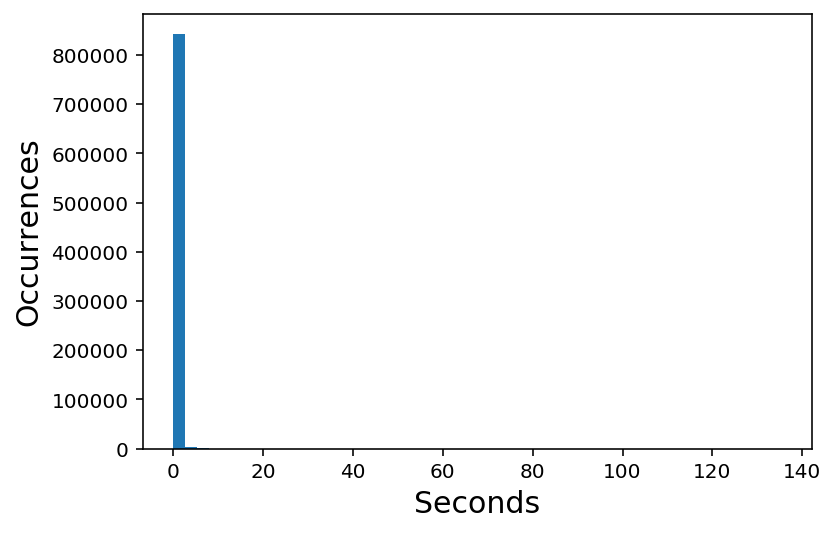

In [169]:
plt.hist(train_df['Duration'].values, bins=50)
plt.xlabel("Seconds",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

Let's zoom in:

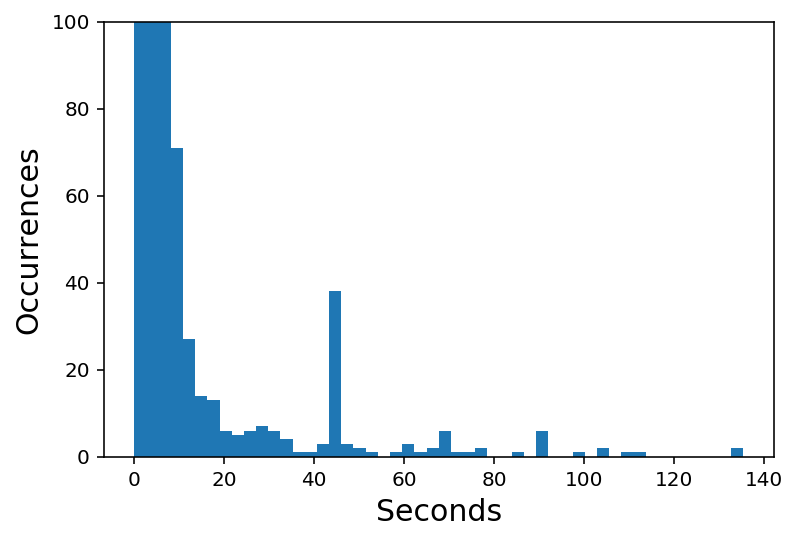

In [170]:
plt.hist(train_df['Duration'].values, bins=50)
plt.xlabel("Seconds",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)
plt.ylim([0.0, 100.0])

plt.show()

Please Note: for visualisation purposes, the y-axis' limit has been set to 100 occurrences. Using a "for loop", we will show that the majority of the traffic flows have a duration close to 0.00 seconds:

In [171]:
counter = 0
for x in train_df['Duration']:
    if x>1.0:
        counter = counter +1
print("Percentage of values which's duration is above 1 second: ")
((counter/train_df['Duration'].count()) *100).round(3)

Percentage of values which's duration is above 1 second: 


3.325

To support our "counter", we use a boxplot to illustrate the very low median of our traffic flows' durations.

{'whiskers': [<matplotlib.lines.Line2D at 0x11e9cfc50>,
 'caps': [<matplotlib.lines.Line2D at 0x11e9d4750>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e9cf050>],
 'medians': [<matplotlib.lines.Line2D at 0x11e9d4cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e9dc6d0>],
 'means': []}

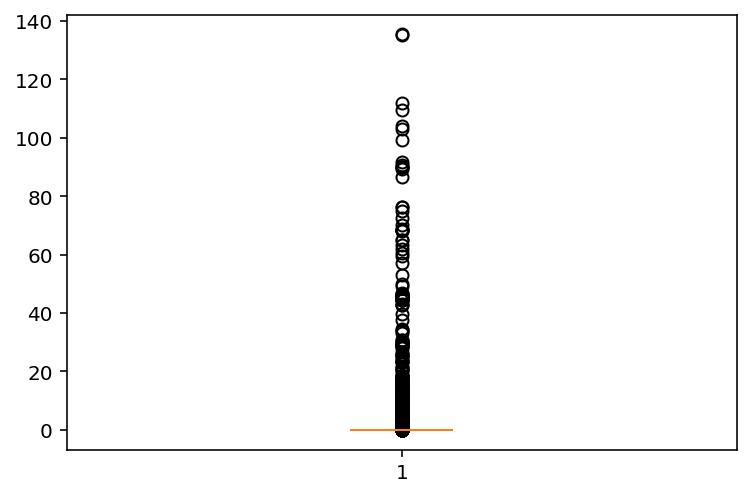

In [172]:
plt.boxplot(train_df['Duration'])

## Statistics on 'Packets':

In [174]:
train_df['Packets'].describe()

count    845152.000000
mean         14.902497
std         978.309853
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max      195912.000000
Name: Packets, dtype: float64

Let's visualise this with histograms:

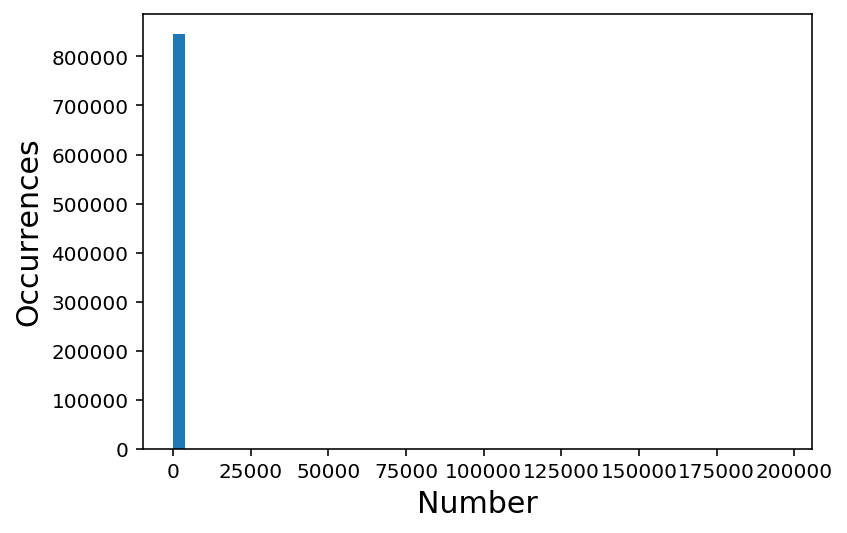

In [175]:
plt.hist(train_df['Packets'].values, bins=50)
plt.xlabel("Number",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

Let's zoom in:

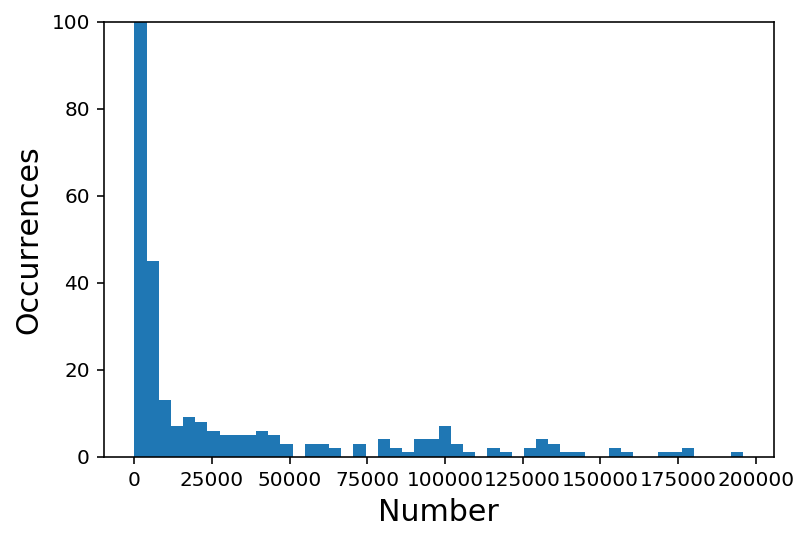

In [176]:
plt.hist(train_df['Packets'].values, bins=50)
plt.xlabel("Number",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)
plt.ylim([0.0, 100.0])
plt.show()

Please Note: for visualisation purposes, the y-axis' limit has been set to 100 occurrences. Using a "for loop", we will show that the majority of the traffic flows have less than 10 packets:

In [177]:
counter = 0
for x in train_df['Packets']:
    if x>10.0:
        counter = counter +1
print("Percentage of values which's number of packets is above 10: ")
((counter/train_df['Packets'].count()) *100).round(3)

Percentage of values which's number of packets is above 10: 


4.651

To support our "counter", we use a boxplot to illustrate the very low median of our traffic flows' durations.

{'whiskers': [<matplotlib.lines.Line2D at 0x11f6c2890>,
 'caps': [<matplotlib.lines.Line2D at 0x11f6b7cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f6b7c90>],
 'medians': [<matplotlib.lines.Line2D at 0x11f6c9dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f6c2ed0>],
 'means': []}

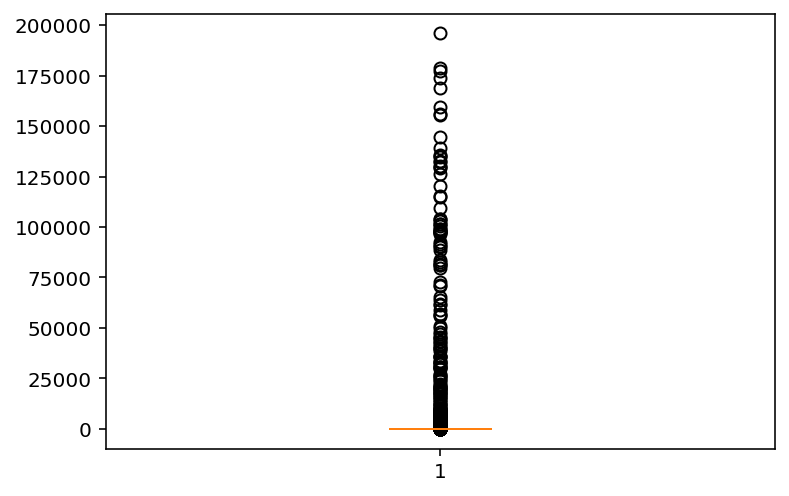

In [178]:
plt.boxplot(train_df['Packets'])

## Statistics on 'Bytes':

In [180]:
train_df['Bytes'].describe()

count    8.451520e+05
mean     1.840946e+04
std      1.990350e+06
min      4.200000e+01
25%      6.600000e+01
50%      1.520000e+02
75%      4.790000e+02
max      4.999000e+08
Name: Bytes, dtype: float64

Let's visualise this with histograms:

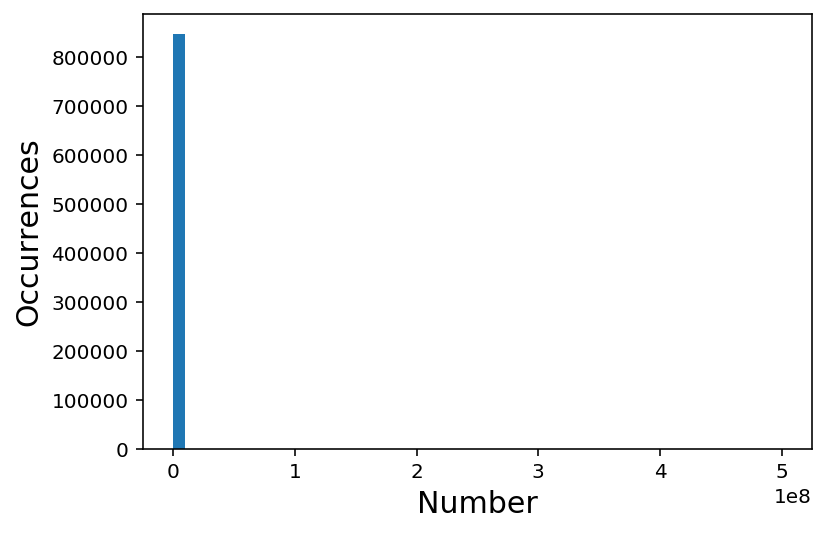

In [181]:
plt.hist(train_df['Bytes'].values, bins=50)
plt.xlabel("Number",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

Let's zoom in:

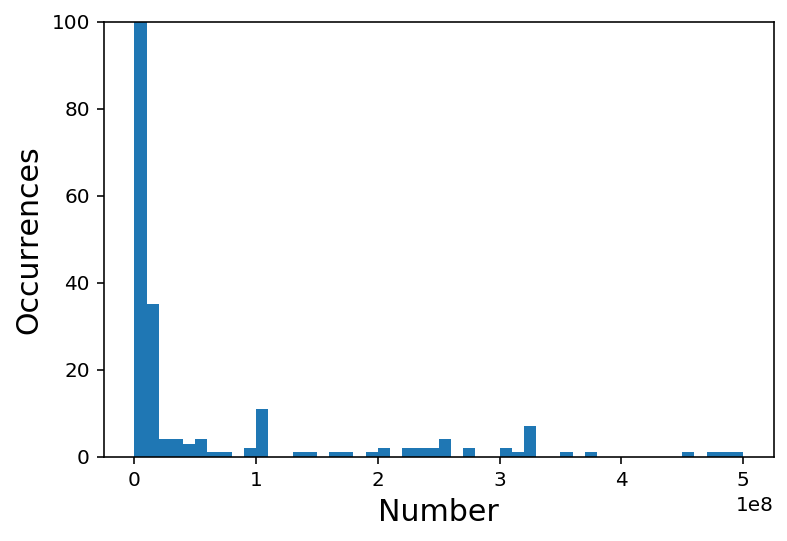

In [182]:
plt.hist(train_df['Bytes'].values, bins=50)
plt.xlabel("Number",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)
plt.ylim([0.0, 100.0])
plt.show()

Please Note: for visualisation purposes, the y-axis' limit has been set to 100 occurrences. Using a "for loop", we will show that the majority of the traffic flows have less than 9000 Bytes:

In [183]:
counter = 0
for x in train_df['Bytes']:
    if x>0.00009*(10**8):
        counter = counter +1
        
print("Percentage of values which's number of bytes is above 1*10^8: ")
((counter/train_df['Bytes'].count()) *100).round(3)

Percentage of values which's number of bytes is above 1*10^8: 


2.192

To support our "counter", we use a boxplot to illustrate the very low median of our traffic flows' durations.

{'whiskers': [<matplotlib.lines.Line2D at 0x11e18f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x133198e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e18f310>],
 'medians': [<matplotlib.lines.Line2D at 0x11e18fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6e107910>],
 'means': []}

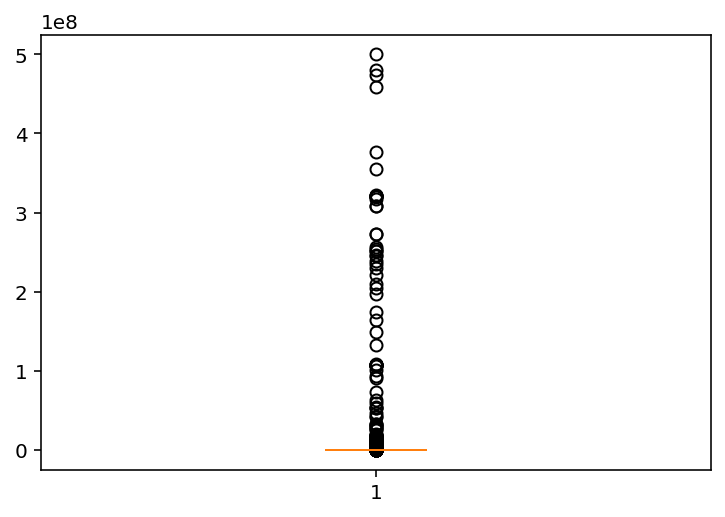

In [184]:
plt.boxplot(train_df['Bytes'])

### Considerations on our results for all three numeric variables:

All three of our numeric variables have a very high range of values. Indeed, all three have maximum values that are way larger than their minimum. Despite that range, all three of our variables have low medians (see boxplots), which tells us that the very high values are unusual.

## Time and dates where the network has come under attack:

Thanks to Professor Carman's code, we will convert the 'Date first seen' column from string to datetime format:

In [185]:
train_df['Date first seen'] = pd.to_datetime(train_df['Date first seen']) 

Let's verify that our operation has indeed been performed:

In [186]:
print("Type of the features:")
train_df.info()

Type of the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845152 entries, 0 to 845151
Data columns (total 16 columns):
Date first seen      845152 non-null datetime64[ns]
Duration             845152 non-null float64
Proto                845152 non-null object
Src IP Addr          845152 non-null object
Src Pt               845152 non-null int64
Dst IP Addr          845152 non-null object
Dst Pt               845152 non-null float64
Packets              845152 non-null int64
Flows                845152 non-null int64
Flags                845152 non-null object
Tos                  845152 non-null int64
class                845152 non-null object
attackType           845152 non-null object
attackID             845152 non-null object
attackDescription    845152 non-null object
Bytes                845152 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 103.2+ MB


Next, we create new columns for the day of the week and for the time of day:

In [187]:
train_df['Date first seen'].dt.dayofweek

0         2
1         2
2         2
3         2
4         2
         ..
845147    1
845148    1
845149    1
845150    1
845151    1
Name: Date first seen, Length: 845152, dtype: int64

In [188]:
train_df['Date first seen'].dt.hour

0          0
1          0
2          0
3          0
4          0
          ..
845147    23
845148    23
845149    23
845150    23
845151    23
Name: Date first seen, Length: 845152, dtype: int64

Let's plot histograms of the day-of-week and of the time-of-day:

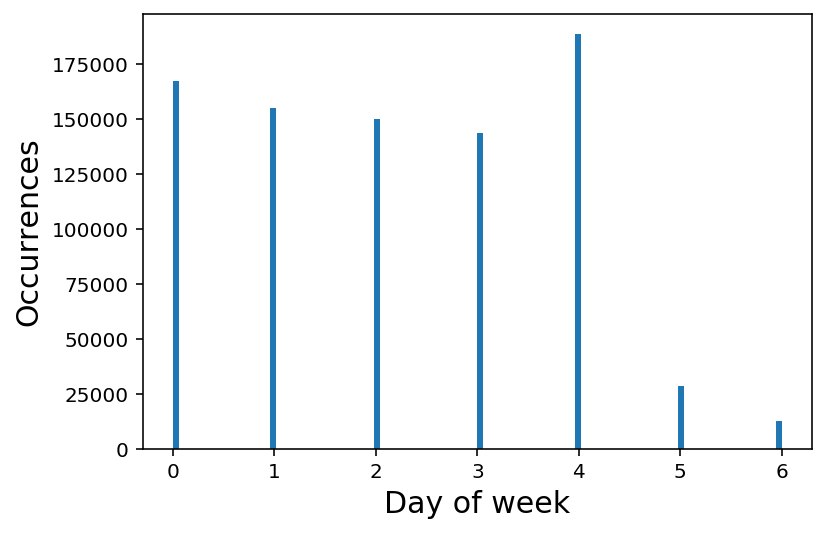

In [189]:
plt.hist(train_df['Date first seen'].dt.dayofweek.values, bins=100)
plt.xlabel("Day of week",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

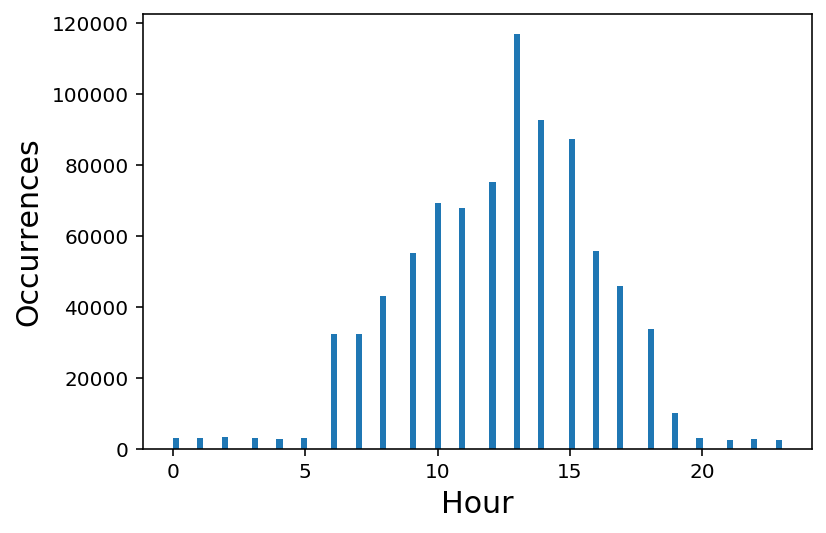

In [190]:
plt.hist(train_df['Date first seen'].dt.hour.values, bins=100)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

Here, we look at every different type of attack, so that we can select only the rows corresponding to attacks:

In [191]:
set(train_df.attackType)

{'---', 'bruteForce', 'dos', 'pingScan', 'portScan'}

In [192]:
set(train_df.loc[train_df.attackType != '---'].attackType)

{'bruteForce', 'dos', 'pingScan', 'portScan'}

The histograms below show us the occurrences of attacks for each day-of-week and time-of-day:

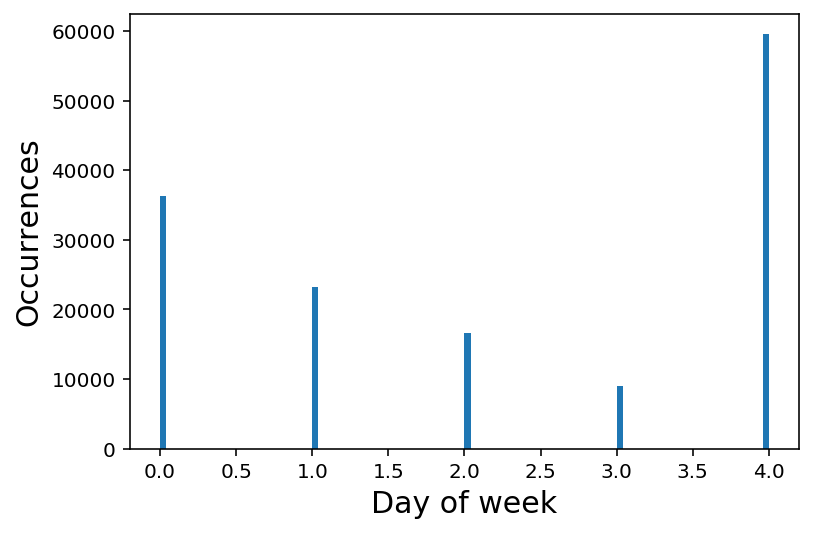

In [193]:
plt.hist(train_df.loc[train_df.attackType != '---']['Date first seen'].dt.dayofweek.values, bins=100)
plt.xlabel("Day of week",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

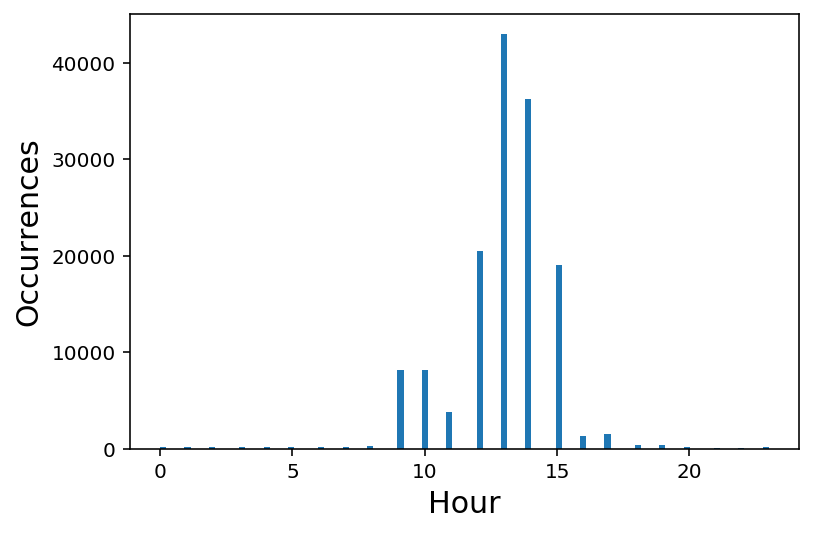

In [194]:
plt.hist(train_df.loc[train_df.attackType != '---']['Date first seen'].dt.hour.values, bins=100)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

It is interesting to note that Friday is by far the day on which the most attacks occurred, followed by Monday.

What's more, the range of hours from 11am to 2pm is the one where the proportion of attacks is the largest.

### That is interesting, but let's now see if the day of the week affects the probability of an individual network flow to be an attack:

###### To understand how likely it is for an individual network flow to correspond to an attack on each day of the week, we will:
    - Show how many attacks there were on each day
    - Show how many traffic flows occurred on each day of the week 
    - Divide the number of attacks by the total number of flows
    - Plot a graph to visualise our findings

In [195]:
train_df.loc[train_df.attackType != '---']['Date first seen'].groupby(train_df.loc[train_df.attackType != '---']['Date first seen'].dt.dayofweek.values).size().reset_index()

,index,Date first seen
0,0,36270
1,1,23288
2,2,16585
3,3,8981
4,4,59515


In [196]:
train_df['Date first seen'].groupby(train_df['Date first seen'].dt.dayofweek.values).size().reset_index()

,index,Date first seen
0,0,167174
1,1,155030
2,2,150140
3,3,143468
4,4,188417
5,5,28414
6,6,12509


In [201]:
dow_individual_prob = (train_df.loc[train_df.attackType != '---']['Date first seen'].groupby(train_df.loc[train_df.attackType != '---']['Date first seen'].dt.dayofweek.values).size().reset_index()/train_df['Date first seen'].groupby(train_df['Date first seen'].dt.dayofweek.values).size().reset_index()).drop('index', axis=1)

In [202]:
dow_individual_prob['Date first seen']

0    0.216960
1    0.150216
2    0.110464
3    0.062599
4    0.315869
5         NaN
6         NaN
Name: Date first seen, dtype: float64

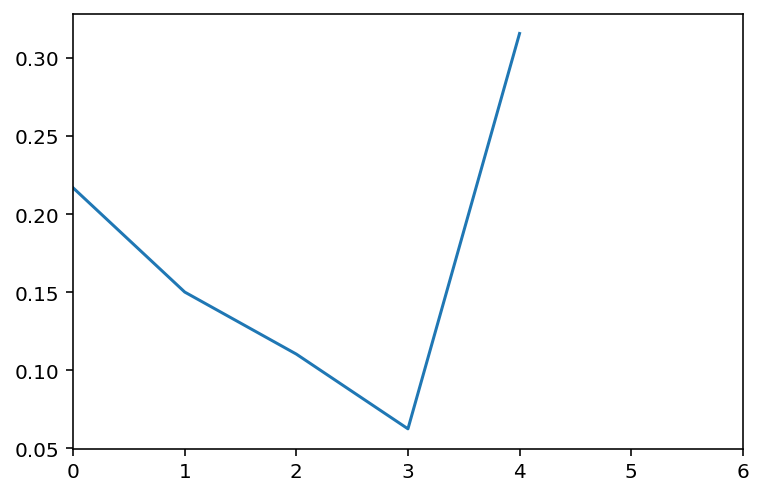

In [203]:
dow_individual_prob['Date first seen'].plot()

The graph shows the percentage of the traffic flows that correspond to attacks for every day of the week.
Even in this case, Friday is the day in which the percentage of attacks is the highest: 31.6%. 
What's more, even if there is traffic flow on the weekends, no attack has been recorded during that time. 

It turns out even hackers need to rest after a busy Friday ! In all seriousness, hackers probably know that the network flow is a lot lower on the weekend, and therefore don't waste their time and resources on these days. On the contrary, Friday is a popular day, hence the focus of the attackers.  

###### Let's go through the same steps to understand, for each hour of the day, the probability of an individual network flow to be an attack :

In [204]:
train_df.loc[train_df.attackType != '---']['Date first seen'].groupby(train_df.loc[train_df.attackType != '---']['Date first seen'].dt.hour.values).size().reset_index()

,index,Date first seen
0,0,169
1,1,191
2,2,195
3,3,188
4,4,202
5,5,210
6,6,162
7,7,189
8,8,227
9,9,8149


In [205]:
train_df['Date first seen'].groupby(train_df['Date first seen'].dt.hour.values).size().reset_index()

,index,Date first seen
0,0,2947
1,1,3104
2,2,3144
3,3,2974
4,4,2755
5,5,2926
6,6,32385
7,7,32283
8,8,42921
9,9,55217


In [206]:
hod_individual_prob = (train_df.loc[train_df.attackType != '---']['Date first seen'].groupby(train_df.loc[train_df.attackType != '---']['Date first seen'].dt.hour.values).size().reset_index()/train_df['Date first seen'].groupby(train_df['Date first seen'].dt.hour.values).size().reset_index()).drop('index', axis=1)

In [207]:
hod_individual_prob['Date first seen']

0     0.057346
1     0.061534
2     0.062023
3     0.063215
4     0.073321
5     0.071770
6     0.005002
7     0.005854
8     0.005289
9     0.147581
10    0.117196
11    0.056491
12    0.272118
13    0.367618
14    0.391269
15    0.218862
16    0.023588
17    0.033493
18    0.011020
19    0.036139
20    0.070413
21    0.043531
22    0.038813
23    0.051163
Name: Date first seen, dtype: float64

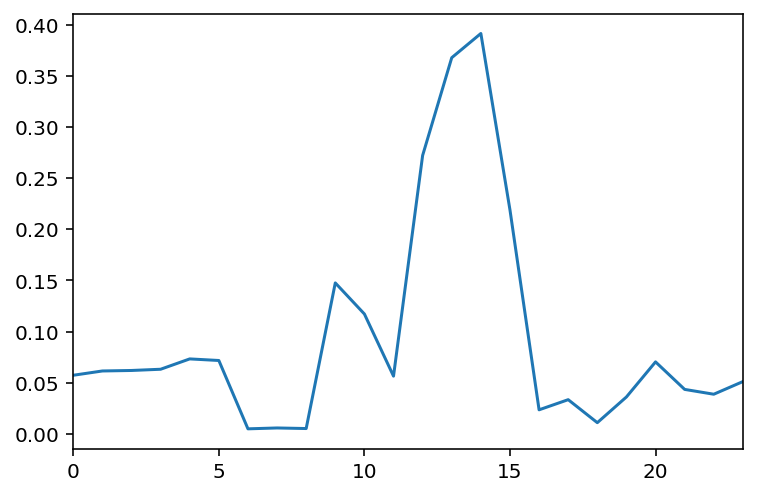

In [208]:
hod_individual_prob['Date first seen'].plot()

The graph shows the percentage of the traffic flows that correspond to attacks for every hour of the day.
The range between 12pm and 2pm is the one in which the percentage of attacks is the highest. 

The cliché about hackers being up to no good at night with dark circles under their eyes and a hoodie over their heads seems to be wrong! 

# 2) Test Set

### We will perform the exact same analyses on our test database, for comparison purposes. Our comments for this part will not be as thorough as the ones with the training set.

In [209]:
test_df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-22 00:00:11.767,0.004,TCP,192.168.220.5,55126,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---
1,2017-03-22 00:00:11.768,0.000,TCP,192.168.100.5,445,192.168.220.5,55126.0,1,108,1,.AP...,0,normal,---,---,---
2,2017-03-22 00:00:27.207,0.232,TCP,192.168.200.8,58749,EXT_SERVER,8082.0,2,319,1,.AP...,0,normal,---,---,---
3,2017-03-22 00:00:32.830,0.000,UDP,192.168.210.5,50947,DNS,53.0,1,81,1,......,0,normal,---,---,---
4,2017-03-22 00:00:46.964,0.000,TCP,10179_174,443,192.168.210.5,51433.0,1,54,1,.A....,32,normal,---,---,---


## Description of the data:

In [210]:
print("The number of columns is",test_df.shape[1])

The number of columns is 16


In [211]:
print("The number of rows is",len(test_df.index))

The number of rows is 1031073


In [212]:
print("Number of different types of 'class'=", len(test_df['class'].unique()))

print("Number of occurrences of each type of class:")
test_df.groupby('class').size().reset_index().sort_values(0, ascending=False).rename(columns={0:'cnt'})

Number of different types of 'class'= 3
Number of occurrences of each type of class:


,class,cnt
1,normal,851802
0,attacker,91009
2,victim,88262


In [213]:
print("Values taken by the attackType attribute:")
test_df.groupby('attackType').size().reset_index().sort_values(0,ascending=False).rename(columns={0:'cnt'})

Values taken by the attackType attribute:


,attackType,cnt
0,---,851802
2,dos,170512
4,portScan,8142
1,bruteForce,360
3,pingScan,257


In [214]:
list_test_bytes = converting(test_df['Bytes'])

In [215]:
df_test_bytes = pd.DataFrame(list_test_bytes)

In [216]:
test_df = test_df.drop("Bytes", axis=1)
test_df['Bytes'] = df_test_bytes

In [217]:
print("Type of the features:")
test_df.info()

Type of the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031073 entries, 0 to 1031072
Data columns (total 16 columns):
Date first seen      1031073 non-null object
Duration             1031073 non-null float64
Proto                1031073 non-null object
Src IP Addr          1031073 non-null object
Src Pt               1031073 non-null int64
Dst IP Addr          1031073 non-null object
Dst Pt               1031073 non-null float64
Packets              1031073 non-null int64
Flows                1031073 non-null int64
Flags                1031073 non-null object
Tos                  1031073 non-null int64
class                1031073 non-null object
attackType           1031073 non-null object
attackID             1031073 non-null object
attackDescription    1031073 non-null object
Bytes                1031073 non-null float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ MB


In [218]:
print("Columns containing numeric values:")
list(test_df._get_numeric_data())

Columns containing numeric values:


['Duration', 'Src Pt', 'Dst Pt', 'Packets', 'Flows', 'Tos', 'Bytes']

## Do they all correspond to numeric variables?

Considering that it does not make any sense to compare categorical values (even if they are of a numeric form), it is clear that some of the columns selected previously for containing numeric values are still categorical variables.

Indeed, comparing different values corresponding to Source Ports, Destination Ports, Flows, or Tos with either "<" or ">" does not answer any question we might have concerning the data. 

Therefore, these values are not numeric variables, as opposed to 'Duration', 'Packets' and 'Bytes'.
Let's compute simple statistics for each of our numeric variables:

## Statistics on 'Duration':

In [219]:
test_df['Duration'].describe()

count    1.031073e+06
mean     1.115508e-01
std      8.059567e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e-03
75%      2.300000e-02
max      1.759840e+02
Name: Duration, dtype: float64

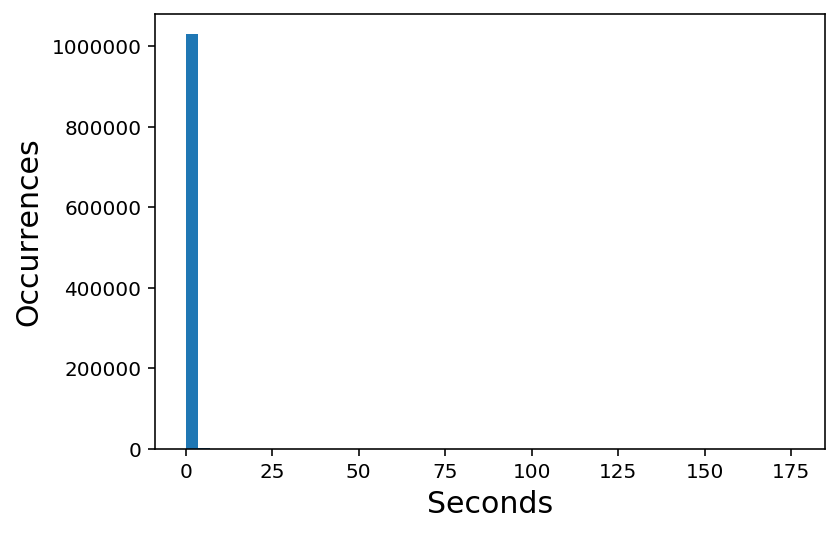

In [220]:
plt.hist(test_df['Duration'].values, bins=50)
plt.xlabel("Seconds",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

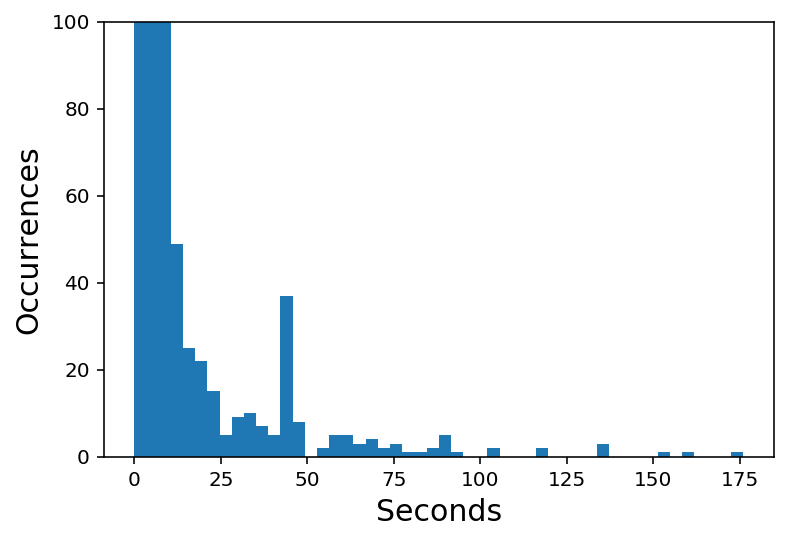

In [221]:
plt.hist(test_df['Duration'].values, bins=50)
plt.xlabel("Seconds",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)
plt.ylim([0.0, 100.0])

plt.show()

Please Note: for visualisation purposes, the y-axis' limit has been set to 100 occurrences. Using a "for loop", we will show that the majority of the traffic flows have a duration close to 0.00 seconds:

In [222]:
counter = 0
for x in test_df['Duration']:
    if x>1.0:
        counter = counter +1
print("Percentage of values which's duration is above 1 second: ")
((counter/test_df['Duration'].count()) *100).round(3)

Percentage of values which's duration is above 1 second: 


3.197

{'whiskers': [<matplotlib.lines.Line2D at 0x11ec91310>,
 'caps': [<matplotlib.lines.Line2D at 0x11ecbdad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11ecbd790>],
 'medians': [<matplotlib.lines.Line2D at 0x11f3e9ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11ec91950>],
 'means': []}

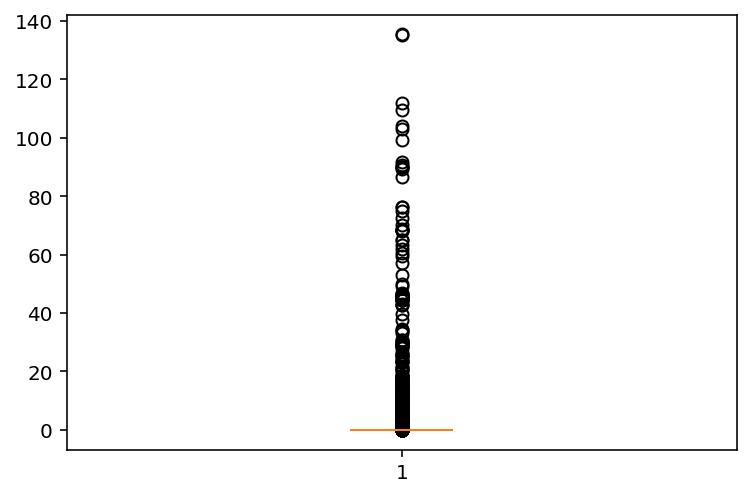

In [223]:
plt.boxplot(train_df['Duration'])

## Statistics on 'Packets':

In [224]:
test_df['Packets'].describe()

count    1.031073e+06
mean     1.164510e+01
std      7.960468e+02
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.972860e+05
Name: Packets, dtype: float64

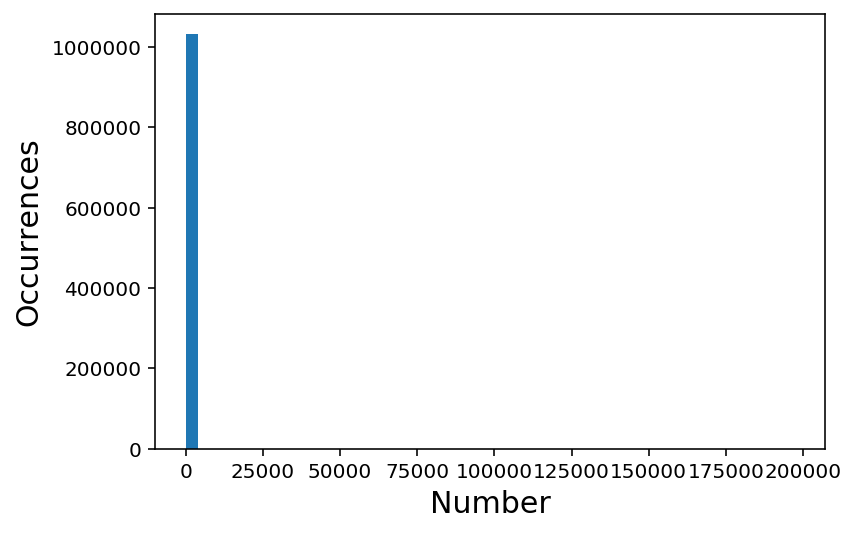

In [225]:
plt.hist(test_df['Packets'].values, bins=50)
plt.xlabel("Number",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

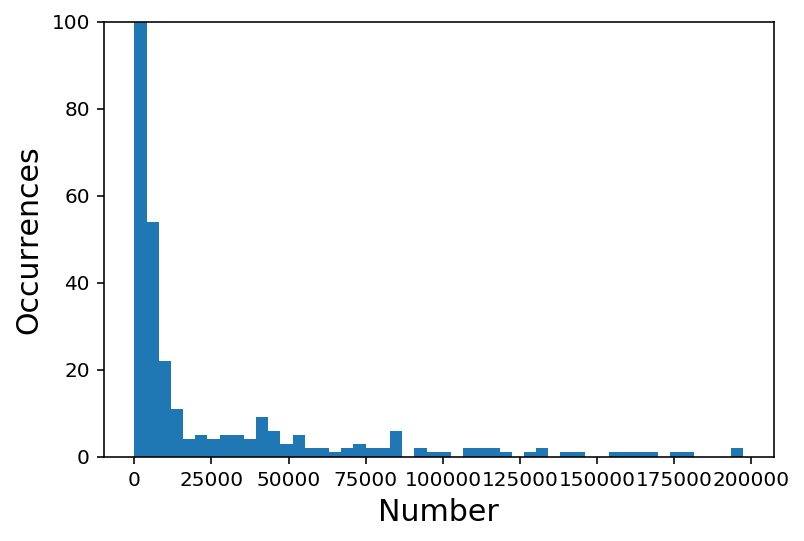

In [226]:
plt.hist(test_df['Packets'].values, bins=50)
plt.xlabel("Number",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)
plt.ylim([0.0, 100.0])
plt.show()

In [227]:
counter = 0
for x in test_df['Packets']:
    if x>10.0:
        counter = counter +1
print("Percentage of values which's number of packets is above 10: ")
((counter/test_df['Packets'].count()) *100).round(3)

Percentage of values which's number of packets is above 10: 


4.303

{'whiskers': [<matplotlib.lines.Line2D at 0x12348d710>,
 'caps': [<matplotlib.lines.Line2D at 0x123482b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x123482b10>],
 'medians': [<matplotlib.lines.Line2D at 0x123493c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x12348dd50>],
 'means': []}

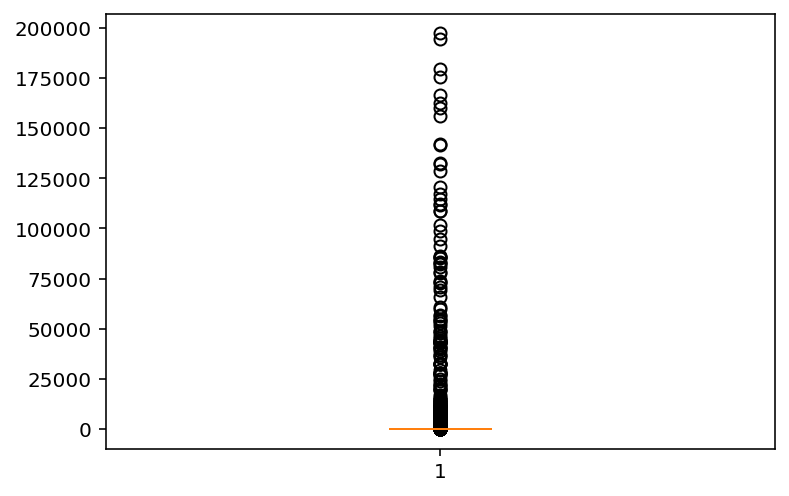

In [228]:
plt.boxplot(test_df['Packets'])

Statistics on 'Bytes':

In [229]:
test_df['Bytes'].describe()

count    1.031073e+06
mean     1.619754e+04
std      1.918643e+06
min      4.200000e+01
25%      6.600000e+01
50%      1.630000e+02
75%      4.790000e+02
max      4.839000e+08
Name: Bytes, dtype: float64

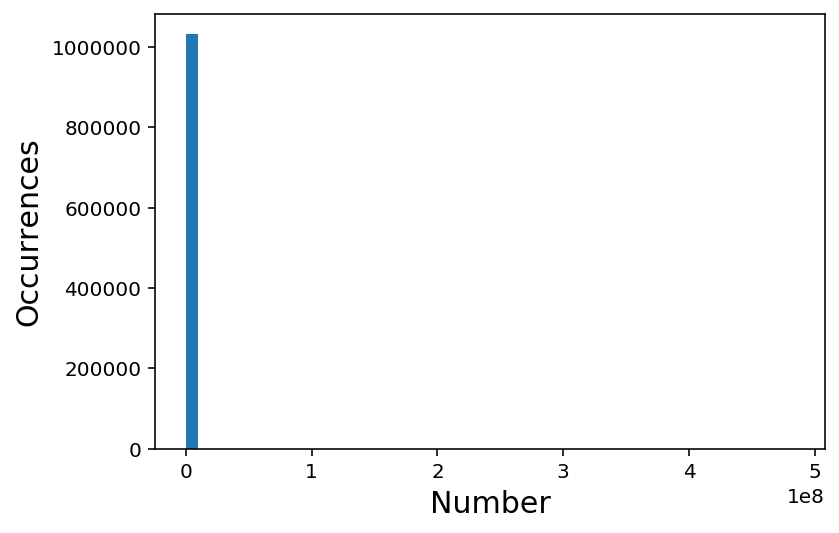

In [230]:
plt.hist(test_df['Bytes'].values, bins=50)
plt.xlabel("Number",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

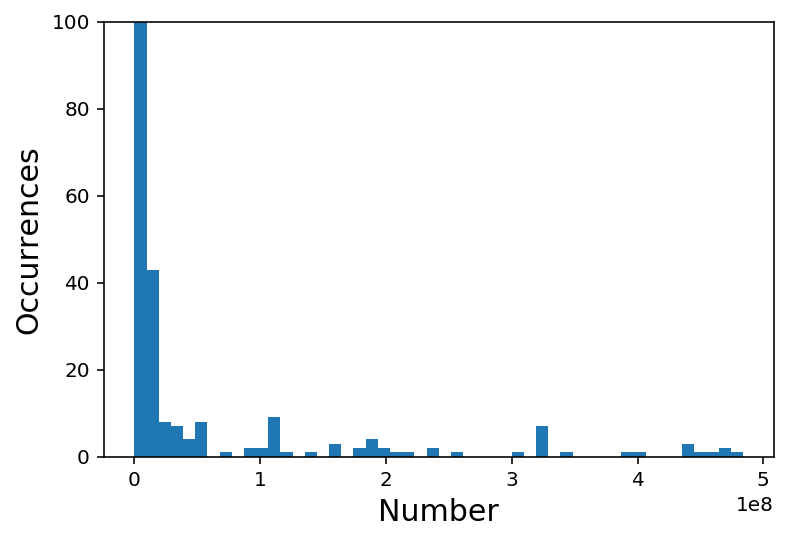

In [231]:
plt.hist(test_df['Bytes'].values, bins=50)
plt.xlabel("Number",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)
plt.ylim([0.0, 100.0])
plt.show()

In [232]:
counter = 0
for x in train_df['Bytes']:
    if x>0.00009*(10**8):
        counter = counter +1
        
print("Percentage of values which's number of bytes is above 1*10^8: ")
((counter/test_df['Bytes'].count()) *100).round(3)

Percentage of values which's number of bytes is above 1*10^8: 


1.796

{'whiskers': [<matplotlib.lines.Line2D at 0x124b47e10>,
 'caps': [<matplotlib.lines.Line2D at 0x124b4c910>,
 'boxes': [<matplotlib.lines.Line2D at 0x124b47250>],
 'medians': [<matplotlib.lines.Line2D at 0x124b47ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x124b53890>],
 'means': []}

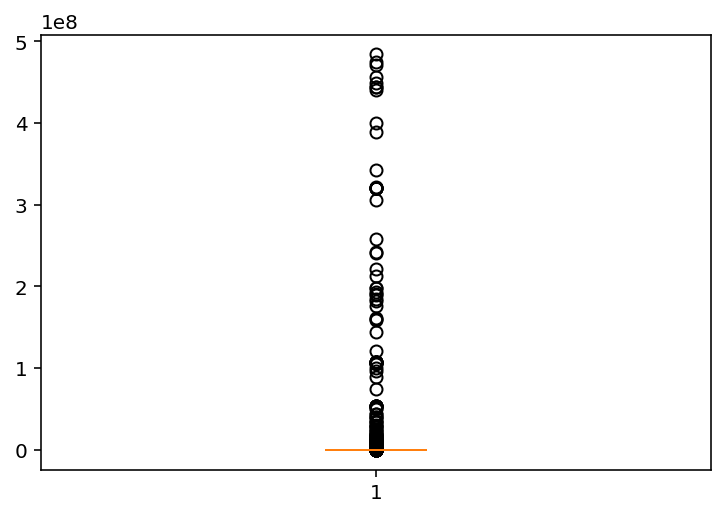

In [233]:
plt.boxplot(test_df['Bytes'])

## Time and dates where the system has come under attack:

In [234]:
test_df['Date first seen'] = pd.to_datetime(test_df['Date first seen']) 

In [235]:
print("Type of the features:")
test_df.info()

Type of the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031073 entries, 0 to 1031072
Data columns (total 16 columns):
Date first seen      1031073 non-null datetime64[ns]
Duration             1031073 non-null float64
Proto                1031073 non-null object
Src IP Addr          1031073 non-null object
Src Pt               1031073 non-null int64
Dst IP Addr          1031073 non-null object
Dst Pt               1031073 non-null float64
Packets              1031073 non-null int64
Flows                1031073 non-null int64
Flags                1031073 non-null object
Tos                  1031073 non-null int64
class                1031073 non-null object
attackType           1031073 non-null object
attackID             1031073 non-null object
attackDescription    1031073 non-null object
Bytes                1031073 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 125.9+ MB


In [236]:
test_df['Date first seen'].dt.dayofweek

0          2
1          2
2          2
3          2
4          2
          ..
1031068    1
1031069    1
1031070    1
1031071    1
1031072    1
Name: Date first seen, Length: 1031073, dtype: int64

In [237]:
test_df['Date first seen'].dt.hour

0           0
1           0
2           0
3           0
4           0
           ..
1031068    23
1031069    23
1031070    23
1031071    23
1031072    23
Name: Date first seen, Length: 1031073, dtype: int64

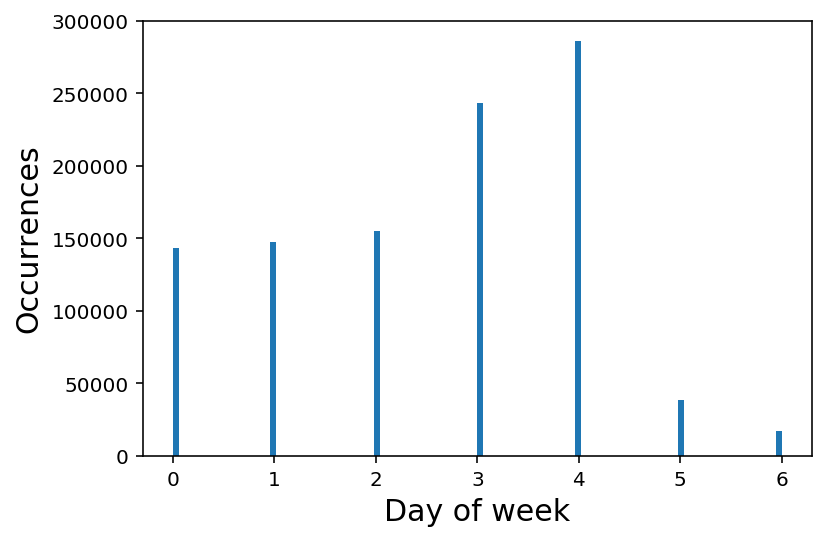

In [238]:
plt.hist(test_df['Date first seen'].dt.dayofweek.values, bins=100)
plt.xlabel("Day of week",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

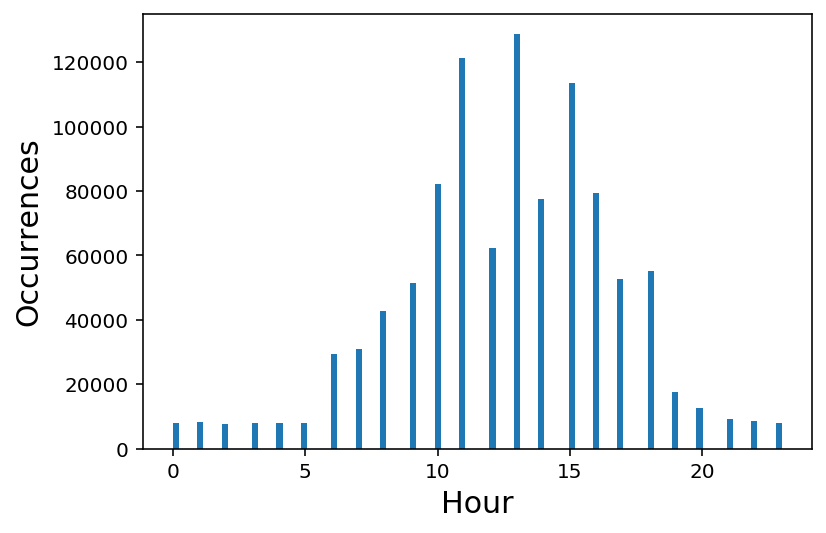

In [239]:
plt.hist(test_df['Date first seen'].dt.hour.values, bins=100)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

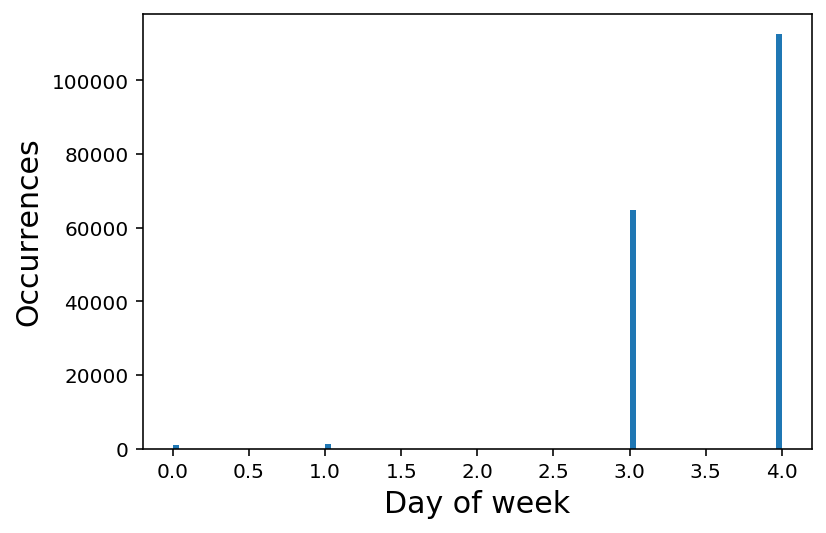

In [240]:
plt.hist(test_df.loc[test_df.attackType != '---']['Date first seen'].dt.dayofweek.values, bins=100)
plt.xlabel("Day of week",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

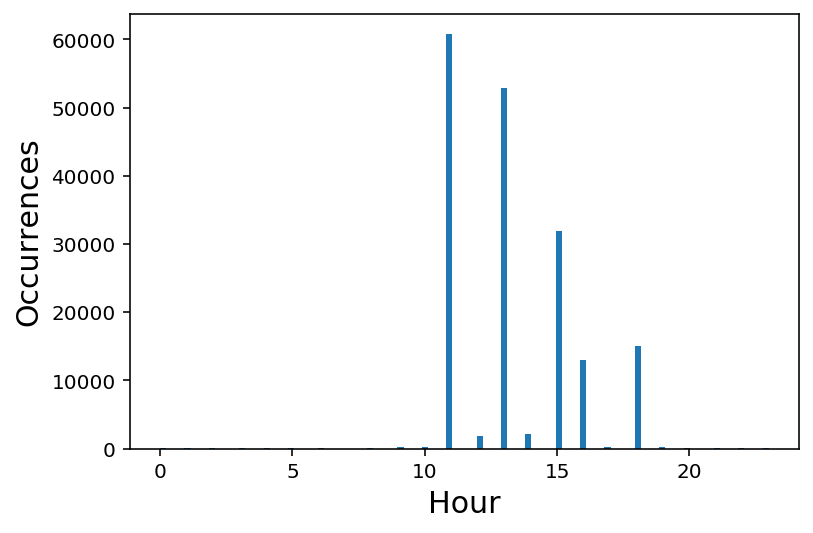

In [241]:
plt.hist(test_df.loc[test_df.attackType != '---']['Date first seen'].dt.hour.values, bins=100)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Occurrences",fontsize=15)

plt.show()

In [242]:
test = test_df.loc[test_df.attackType != '---']['Date first seen'].groupby(test_df.loc[test_df.attackType != '---']['Date first seen'].dt.dayofweek.values).size().reset_index()
test

,index,Date first seen
0,0,849
1,1,1209
2,3,64710
3,4,112503


In [244]:
# source: https://www.geeksforgeeks.org/insert-row-at-given-position-in-pandas-dataframe/
def Insert_row(row_number, df, row_value): 
    # Starting value of upper half 
    start_upper = 0
   
    # End value of upper half 
    end_upper = row_number 
   
    # Start value of lower half 
    start_lower = row_number 
   
    # End value of lower half 
    end_lower = df.shape[0] 
   
    # Create a list of upper_half index 
    upper_half = [*range(start_upper, end_upper, 1)] 
   
    # Create a list of lower_half index 
    lower_half = [*range(start_lower, end_lower, 1)] 
   
    # Increment the value of lower half by 1 
    lower_half = [x.__add__(1) for x in lower_half] 
   
    # Combine the two lists 
    index_ = upper_half + lower_half 
   
    # Update the index of the dataframe 
    df.index = index_ 
   
    # Insert a row at the end 
    df.loc[row_number] = row_value 
    
    # Sort the index labels 
    df = df.sort_index() 
   
    # return the dataframe 
    return df 

In [245]:
test2 = Insert_row(2, test, 0)

In [246]:
test2

,index,Date first seen
0,0,849
1,1,1209
2,0,0
3,3,64710
4,4,112503


In [247]:
test_df['Date first seen'].groupby(test_df['Date first seen'].dt.dayofweek.values).size().reset_index()

,index,Date first seen
0,0,143513
1,1,147521
2,2,154764
3,3,243506
4,4,285898
5,5,38576
6,6,17295


In [248]:
dow_individual_prob = (test2/test_df['Date first seen'].groupby(test_df['Date first seen'].dt.dayofweek.values).size().reset_index()).drop('index', axis=1)

In [249]:
dow_individual_prob['Date first seen']

0    0.005916
1    0.008195
2    0.000000
3    0.265743
4    0.393507
5         NaN
6         NaN
Name: Date first seen, dtype: float64

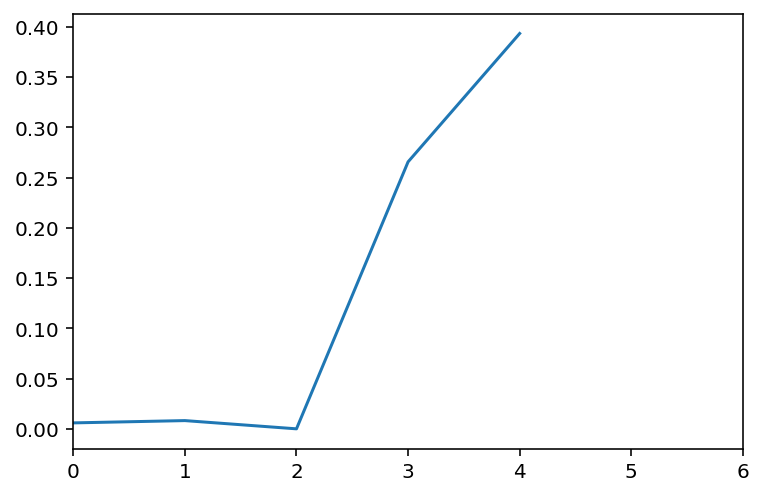

In [250]:
dow_individual_prob['Date first seen'].plot()

###### Let's go through the same steps to understand, for each hour of the day, the probability of an individual network flow to be an attack :

In [251]:
test_df.loc[test_df.attackType != '---']['Date first seen'].groupby(test_df.loc[test_df.attackType != '---']['Date first seen'].dt.hour.values).size().reset_index()

,index,Date first seen
0,0,51
1,1,52
2,2,53
3,3,95
4,4,116
5,5,122
6,6,94
7,7,5
8,8,78
9,9,235


In [252]:
test_df['Date first seen'].groupby(test_df['Date first seen'].dt.hour.values).size().reset_index()

,index,Date first seen
0,0,8028
1,1,8340
2,2,7678
3,3,7860
4,4,8035
5,5,7978
6,6,29356
7,7,31045
8,8,42784
9,9,51434


In [253]:
hod_individual_prob = (test_df.loc[test_df.attackType != '---']['Date first seen'].groupby(test_df.loc[test_df.attackType != '---']['Date first seen'].dt.hour.values).size().reset_index()/test_df['Date first seen'].groupby(test_df['Date first seen'].dt.hour.values).size().reset_index()).drop('index', axis=1)

In [254]:
hod_individual_prob['Date first seen']

0     0.006353
1     0.006235
2     0.006903
3     0.012087
4     0.014437
5     0.015292
6     0.003202
7     0.000161
8     0.001823
9     0.004569
10    0.002757
11    0.500400
12    0.029979
13    0.410843
14    0.026987
15    0.280720
16    0.164074
17    0.004526
18    0.272809
19    0.009816
20    0.004749
21    0.006763
22    0.005448
23    0.006985
Name: Date first seen, dtype: float64

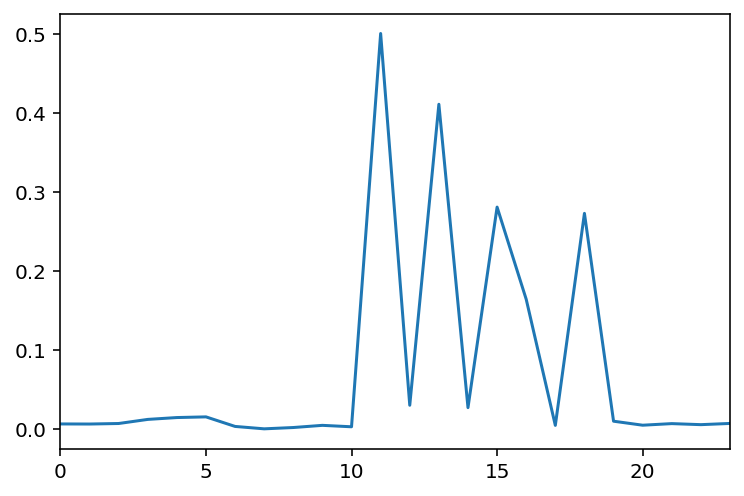

In [255]:
hod_individual_prob['Date first seen'].plot()

## Let's now explore the differences and similarities between the Train and the Test datasets (respectively weeks 1 and 2):

The obvious difference in the two datasets is the number of rows, which goes from 845,152 for week1 to 1,031,073 for week2.

In the first week, the pingScan attack type is more frequent than the brute force (which is the least frequent of all attack types). In the second week, it is the other way around. For the two datasets, Denials of Service represent the most frequent attack type. 

Our three numeric variables - the columns 'Bytes', 'Duration' and 'Packets' - are almost identical statistically in both datasets. They all have a high range of values, but a relatively very low median, which tells us that they contain abnormally high values. 

It is only when it comes to time-related analysis that we truly see a difference between the two weeks. Indeed, the proportion of traffic flows that happened on Thursday and Friday is a lot higher during the second week than the first one. Also, whereas attacks happened on every single day of the working week during the first week, they happened only on Thursday and Friday during the second. 

During the second week, a negligeable amount of attacks happened before 10am. A bigger proportion of those happened during week1. 
Individually, network flows had a 31.5% chance of being an attack on Friday during the first week. That percentage is slightly higher for week two: 39%.
The difference in the individual probabilities of being an attack for network flows was a lot more notable when looking at the hours of the day. Whereas these probabilities almost looked like a bell curve peaking at 2pm in the first week, they were more like regular spikes every other hour, starting from 11am and ending at 6pm. 


# CLASSIFICATION
    
   
        
    
    

The following line will output all graphs produced in a higher resolution

In [1]:
%config InlineBackend.figure_format ='retina'

# 1) Data Preparation and Manipulation

Here we import all the libraries necessary to load the dataset and visualize it 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

The following cell has to contain the directory of where the datasets are in the user's computer. 

We define two paths for the two csv files provided.

In [3]:
TRAIN_DATA_FILENAME ='/Users/mmekiska/Desktop/AI project/data/NetworkTraffic/CIDDS-001-internal-week1_10pcSample.csv'
TEST_DATA_FILENAME = '/Users/mmekiska/Desktop/AI project/data/NetworkTraffic/CIDDS-001-internal-week2_10pcSample.csv'

Here we define two datasets:

* train_df : it contains the first week data
* test_df : it contains the second week data

The way we get the csv files is throught the directory defined above

In [4]:
train_df = pd.read_csv(TRAIN_DATA_FILENAME)
test_df = pd.read_csv(TEST_DATA_FILENAME)

/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We print out the data types of our variables, to see if there are some changes to be made in order to carry out the analysis. We see right away that:

* "Date first seen" is of type 'object'. It needs to be changed to datetime, so as to extract the day of the week and hour of the day.
* "Bytes" is a numerical feature, but here it is of type 'object', so we need to change it to a float to use it in the classification.

In [5]:
train_df.dtypes

Unnamed: 0             int64
Date first seen       object
Duration             float64
Proto                 object
Src IP Addr           object
Src Pt                 int64
Dst IP Addr           object
Dst Pt               float64
Packets                int64
Bytes                 object
Flows                  int64
Flags                 object
Tos                    int64
class                 object
attackType            object
attackID              object
attackDescription     object
dtype: object

In the following cell we define a list containing the names of each column (variable). Then we create a numoy array from the list we just created.

In [6]:
header_names = list(train_df.columns.values)
col_names = np.array(header_names)

Because we use the Numeric Columns often we decide to create a list containing their column names.

In [7]:
numeric_idx = [2,8,9] # 9 = flows removed because we do not consider it further
date_idx=[1,2,8,9]
numeric_cols = col_names[numeric_idx].tolist()
date_cols = col_names[date_idx].tolist()

These are the columns we chose as our numerical variables. 

In [8]:
print(numeric_cols)

['Duration', 'Packets', 'Bytes']


In [9]:
train_df['Duration'].nunique()

4756

In [10]:
train_df['Packets'].nunique()

1109

In [11]:
train_df['Bytes'].nunique()

23284

Printing out "Tos" we see that there are only a few values, meaning that we can consider it as a categorical feature. Because it is not sufficiently explained in the technical report, we decide to avoid using it in the classification.

In [12]:
train_df['Tos'].unique()

array([  0,  32, 192,  16,  12])

Here we visualize the problem we highlighted before, with the format of the "Bytes" value, which is considered as an object. 

As we can see below, high values are a mixture between strings and numbers, so we need to convert them first to numbers. We choose to use floats.

In [14]:
train_df['Bytes'][1034]

'   1.4 M'

This function takes care of converting bytes from 'object' to 'float'. 

The way we developed it is:

* First we create an empty list, then convert the dataframe column into a list. 
* Then we create a 'try-except'; in here we substitute the non numerical values and convert them to floats. These values are directly added to the empty list created beforehand.

In [16]:
def converting(df):
    o = []
    df.tolist()
    for i in (df):
        try:
            if 'M' and '.' in i:
                o.append(float(i.replace('M', '').replace('.',''))*100000)
            else:
                o.append(float(i))
        except:
            o.append(i)
    return o
        

The following cells convert the list containing the converted values of bytes for both the train and test set.

In [17]:
list_train_bytes = converting(train_df['Bytes'])
df_train_bytes = pd.DataFrame(list_train_bytes)

In [18]:
list_test_bytes = converting(test_df['Bytes'])
df_test_bytes = pd.DataFrame(list_test_bytes)

Here we create a copy of the original data frames we imported. This is a choice we will carry out through the whole notebook. 

We decided not to modify the original datasets so as to have stored a copy that we can always look back at, to actually see the modifications we have done and how effective they are. 

We will follow the same reasoning when introducing additional features as well, so as to isolate the factor that can implement the performace of our classifiers.

In [19]:
train_df_b= train_df.copy()
test_df_b= test_df.copy()

This new dataset is modified so as to subsititute the old "Bytes" column with the new one containing floats.

In [20]:
train_df_b = train_df_b.drop("Bytes", axis=1)

In [21]:
train_df_b['Bytes'] = df_train_bytes

In [22]:
test_df_b = test_df_b.drop("Bytes", axis=1)

In [23]:
test_df_b['Bytes'] = df_test_bytes

Through the next cell we see that the subsititution was carried out successfully

In [24]:
train_df_b['Bytes'][1034]

1400000.0

We take flows out because it is the same value for every observation.

In [25]:
train_df_b = train_df_b.drop("Flows", axis=1)
test_df_b = test_df_b.drop("Flows", axis=1)

In [26]:
train_df_b.sample(20)

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Flags,Tos,class,attackType,attackID,attackDescription,Bytes
272516,2729407,2017-03-16 16:40:12.687,0.000,UDP,192.168.220.7,33854,DNS,53.0,2,......,0,normal,---,---,---,264.0
226577,2271194,2017-03-16 13:34:27.380,0.268,TCP,192.168.200.9,58129,11925_166,80.0,5,.AP.SF,0,normal,---,---,---,1508.0
395345,3958067,2017-03-17 14:02:06.827,0.097,TCP,192.168.220.4,56903,10074_39,443.0,9,.AP.S.,0,normal,---,---,---,1205.0
481971,4823205,2017-03-17 23:48:23.214,0.000,TCP,192.168.100.5,445,192.168.220.10,50989.0,1,.AP...,0,normal,---,---,---,108.0
136467,1364751,2017-03-15 17:23:15.947,0.036,UDP,DNS,53,192.168.220.8,54009.0,2,......,0,normal,---,---,---,296.0
814727,8148661,2017-03-21 16:01:39.420,1.748,TCP,192.168.220.15,35057,10223_4,80.0,90,.AP.S.,0,normal,---,---,---,7251.0
598573,5989442,2017-03-20 11:50:29.655,0.737,TCP,192.168.220.14,47270,10707_81,80.0,7,.AP.SF,0,normal,---,---,---,2057.0
35613,353651,2017-03-15 09:27:35.483,0.000,UDP,192.168.220.6,33928,DNS,53.0,2,......,0,normal,---,---,---,166.0
785098,7854874,2017-03-21 14:31:47.585,0.210,TCP,14813_63,80,192.168.210.5,57955.0,5,.AP.SF,32,normal,---,---,---,881.0
767153,7675499,2017-03-21 13:19:47.081,0.000,UDP,192.168.210.5,57221,DNS,53.0,1,......,0,normal,---,---,---,79.0


# 2) Data Preprocessing

We start the data separation to run our models.
Here we want to predict "Class", so we assign it as our target predicition variable.

We split the training dataset into train and test0, with a 80-20 splitting. Then we also define test, as the second week dataset. 

The models will be trained on the train portion, and then tested on both test0 (from week 1) and test (week 2 dataset)

In [28]:
from sklearn.model_selection import train_test_split

# Split dataset up into train and test sets
X_train, X_test0, y_train, y_test0 = train_test_split(
    train_df_b.drop(['class'], axis=1), 
   train_df_b['class'], 
    test_size=0.2
)


X_test = test_df_b.drop('class', axis=1)
y_test=test_df_b['class']

Because our numerical features contain such different values we decide to scale them, so as to normalize the input of our classification models.

In [29]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train[numeric_cols])

X_train[numeric_cols] = standard_scaler.transform(X_train[numeric_cols])
X_test0[numeric_cols] = standard_scaler.transform(X_test0[numeric_cols])
X_test[numeric_cols] = standard_scaler.transform(X_test[numeric_cols])

Here we reassign the features to their respective datasets. They contain the numerical columns scaled by the stardard scaler, and will be the input to the algorithms below.

In [30]:
X_train_num = X_train[numeric_cols]
X_test0_num = X_test0[numeric_cols]
X_test_num = X_test[numeric_cols]


In [31]:
X_train_num.shape

(676121, 3)

In [32]:
X_test0_num.shape

(169031, 3)

Here we import the libraries containing the algorithms and the evaluation metrics, as well as the time module that allows us to see how long it takes for the algorithms to run, so as to evaluate their efficiency.

In [5]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, 
    recall_score,
    precision_score,
    confusion_matrix
)

from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

# 3) Classification with Numerical Columns

This cell defines a function containing a wrapper which will perfrom all the mandatory shared computation for each classifier model. 

In addition, the wrapper contains a time measure function which will return the total time spent for calculating a classfier. 

Furthermore, the wrapper returns the Accuracy on the Test0 data which is resulting from the 80/20 split, the Test data which is the second week data and finally the accuracy on the train data. 

The wrapper continues by returning the confusion matrix and classification reports for both Test data and Training data.

All classifiers are afterwards decorated into the wrapper. This allows to define most of the code just once but use the full functionality of each classifier within just one line




In [6]:
def Classification(func):
    def wrapper(X_train_new, y_train, X_test_new, y_test, X_test0, y_test0):
        t0 = time.time()
        func(X_train_new, y_train, X_test_new, y_test, X_test0, y_test0 )
        clf.fit(X_train_new, y_train)
        y_pred_test = clf.predict(X_test_new)
        y_pred_test0 = clf.predict(X_test0)
        y_pred_train = clf.predict(X_train_new)
        print("elapsed time = %.2f" % (time.time()-t0))
        print("ACCURACY Test: ", accuracy_score(y_pred_test, y_test))
        print("ACCURACY Test0: ", accuracy_score(y_pred_test0, y_test0))
        print("ACCURACY Train: ", accuracy_score(y_pred_train, y_train))
        
        print('')
        print("--------------Classification Report Test-------------------")
        print('')
        try:
            print(classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1','Class 2']))
        except:
            try:
                print(classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1','Class 2','Class 3','Class 4']))
            except:
                print(classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1']))
        print('')
        print("--------------Classification Report Test0-------------------")
        print('')
        try:
            print(classification_report(y_test0, y_pred_test0, target_names=['Class 0', 'Class 1','Class 2']))
        except:
            try:
                print(classification_report(y_test0, y_pred_test0, target_names=['Class 0', 'Class 1','Class 2','Class 3','Class 4']))
            except:
                print(classification_report(y_test0, y_pred_test0, target_names=['Class 0', 'Class 1']))
        print('')
        print("--------------Classification Report Train-------------------")
        print('')
        try:
            print(classification_report(y_train, y_pred_train, target_names=['Class 0', 'Class 1','Class 2']))
        except:
            try:
                print(classification_report(y_train, y_pred_train, target_names=['Class 0', 'Class 1','Class 2','Class 3','Class 4']))
            except:
                print(classification_report(y_train, y_pred_train, target_names=['Class 0', 'Class 1']))
        print('')

        
        print('')
        print("--------------CONFUSION-MATRIX-------------------")
        print('')

        conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
        print('Confusion matrix:\n', conf_mat)

        labels = ['Class 0', 'Class 1','Class 2','Class 3','Class 4']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True Value')
        plt.show()
        
    return wrapper

@Classification
def logistic_reg(X_train_new, y_train, X_test_new, y_test, X_test0, y_test0):
    global clf
    clf = LogisticRegression(solver='lbfgs', max_iter=400, verbose=1,n_jobs=-1)
    
    
    
@Classification
def decision_tree(X_train_new, y_train, X_test_new, y_test, X_test0, y_test0):
    global clf
    clf = DecisionTreeClassifier()
    
    

@Classification
def randomforest(X_train_new, y_train, X_test_new, y_test, X_test0, y_test0):
    global clf
    clf = RandomForestClassifier(verbose=1,n_jobs=-1)
    
    
    
@Classification
def gaussiannb(X_train_new, y_train, X_test_new, y_test, X_test0, y_test0):
    global clf
    clf = GaussianNB()
       

@Classification
def SupportVectorMachine(X_train_new, y_train, X_test_new, y_test, X_test0, y_test0):
    global clf
    clf = SVC(verbose=1)
        

@Classification
def NeuralNetwork(X_train_new, y_train, X_test_new, y_test, X_test0, y_test0):
    global clf
    clf = MLPClassifier(hidden_layer_sizes=(10,20,10), activation='relu',verbose=1)

@Classification
def BaggingSVM(X_train_new, y_train, X_test_new, y_test, X_test0, y_test0):
    global clf
    clf = BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples= 0.01, n_estimators=10,n_jobs=-1, verbose = 1)

## a) Prediction of 'Class'

 In the following section we run the prediction models on the dataset containing only the numerical features. Our aim is to predict "Class". We use a few different algorithms, and compare their predictions through evaluation metrics

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.3s finished


elapsed time = 16.34
ACCURACY Test:  0.8261267630904893
ACCURACY Test0:  0.829019528962143
ACCURACY Train:  0.8288161438559074

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     91009
     Class 1       0.83      1.00      0.90    851802
     Class 2       0.00      0.00      0.00     88262

    accuracy                           0.83   1031073
   macro avg       0.28      0.33      0.30   1031073
weighted avg       0.68      0.83      0.75   1031073


--------------Classification Report Test0-------------------



/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     15084
     Class 1       0.83      1.00      0.91    140130
     Class 2       0.00      0.00      0.00     13817

    accuracy                           0.83    169031
   macro avg       0.28      0.33      0.30    169031
weighted avg       0.69      0.83      0.75    169031


--------------Classification Report Train-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     60040
     Class 1       0.83      1.00      0.91    560383
     Class 2       0.00      0.00      0.00     55698

    accuracy                           0.83    676121
   macro avg       0.28      0.33      0.30    676121
weighted avg       0.69      0.83      0.75    676121



--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[     0  91009      0]
 [     1 851797      4]
 [     0  88262      0]]


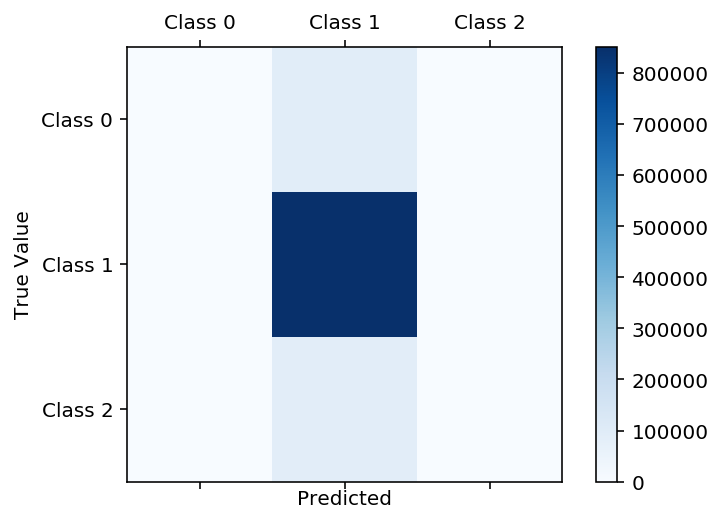

In [35]:
logistic_reg(X_train_num, y_train, X_test_num, y_test, X_test0_num, y_test0)

elapsed time = 1.73
ACCURACY Test:  0.9954503706333111
ACCURACY Test0:  0.9904455395755808
ACCURACY Train:  0.9905963577525324

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       1.00      0.96      0.98     88262

    accuracy                           1.00   1031073
   macro avg       1.00      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     15084
     Class 1       0.99      1.00      0.99    140130
     Class 2       1.00      0.90      0.95     13817

    accuracy                           0.99    169031
   macro avg       0.99      0.96      0.98    169031
weighted avg       0.99      0.99      0.

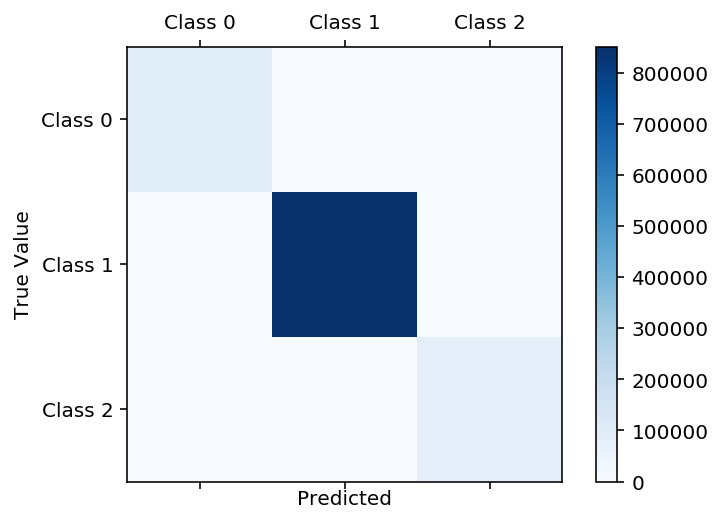

In [36]:
decision_tree(X_train_num, y_train, X_test_num, y_test, X_test0_num, y_test0)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished


elapsed time = 18.70
ACCURACY Test:  0.9955463871132306
ACCURACY Test0:  0.9905283646195077
ACCURACY Train:  0.9905948787273284

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       1.00      0.96      0.98     88262

    accuracy                           1.00   1031073
   macro avg       1.00      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     15084
     Class 1       0.99      1.00      0.99    140130
     Class 2       1.00      0.90      0.95     13817

    accuracy                           0.99    169031
   macro avg       0.99      0.96      0.98    169031
weighted avg       0.99      0.99      0

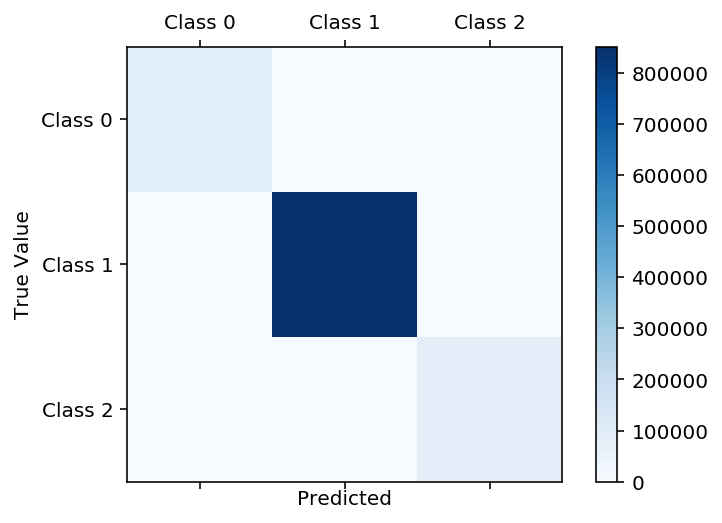

In [37]:
randomforest(X_train_num, y_train, X_test_num, y_test, X_test0_num, y_test0)

elapsed time = 1.35
ACCURACY Test:  0.26617417001512017
ACCURACY Test0:  0.237417988416326
ACCURACY Train:  0.23807868709890687

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.33      0.94      0.49     91009
     Class 1       1.00      0.14      0.24    851802
     Class 2       0.11      0.81      0.19     88262

    accuracy                           0.27   1031073
   macro avg       0.48      0.63      0.31   1031073
weighted avg       0.86      0.27      0.26   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.29      0.84      0.43     15084
     Class 1       1.00      0.14      0.24    140130
     Class 2       0.08      0.59      0.14     13817

    accuracy                           0.24    169031
   macro avg       0.46      0.52      0.27    169031
weighted avg       0.86      0.24      0

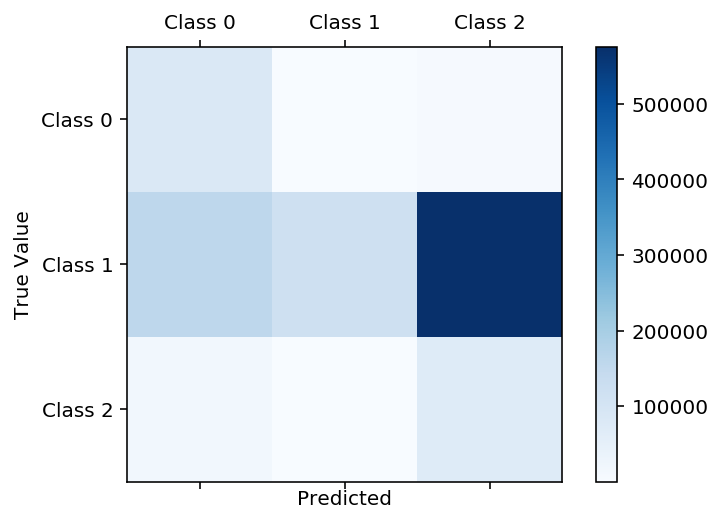

In [38]:
gaussiannb(X_train_num, y_train, X_test_num, y_test, X_test0_num, y_test0)

In [0]:
#SupportVectorMachine(X_train_num, y_train, X_test_num, y_test, X_test0_num, y_test0)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   22.5s remaining:  1.1min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   31.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.8min remaining:  5.3min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.5min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   15.6s remaining:   46.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   24.3s finished
[Parallel(n_jobs=8)]: 

elapsed time = 304.67
ACCURACY Test:  0.8260792397822463
ACCURACY Test0:  0.828960368216481
ACCURACY Train:  0.8287466296713162

--------------Classification Report Test-------------------



/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     91009
     Class 1       0.83      1.00      0.90    851802
     Class 2       0.00      0.00      0.00     88262

    accuracy                           0.83   1031073
   macro avg       0.28      0.33      0.30   1031073
weighted avg       0.68      0.83      0.75   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     15084
     Class 1       0.83      1.00      0.91    140130
     Class 2       0.00      0.00      0.00     13817

    accuracy                           0.83    169031
   macro avg       0.28      0.33      0.30    169031
weighted avg       0.69      0.83      0.75    169031


--------------Classification Report Train-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     60040
   

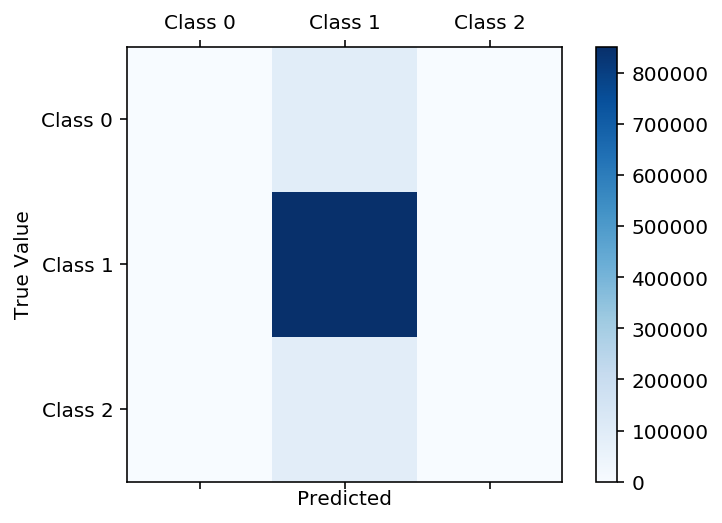

In [39]:
BaggingSVM(X_train_num, y_train, X_test_num, y_test, X_test0_num, y_test0)

Iteration 1, loss = 0.54560694
Iteration 2, loss = 0.43353957
Iteration 3, loss = 0.28457377
Iteration 4, loss = 0.26225267
Iteration 5, loss = 0.24933520
Iteration 6, loss = 0.23612901
Iteration 7, loss = 0.22198784
Iteration 8, loss = 0.20484176
Iteration 9, loss = 0.18864358
Iteration 10, loss = 0.17799042
Iteration 11, loss = 0.17020293
Iteration 12, loss = 0.16622449
Iteration 13, loss = 0.16261845
Iteration 14, loss = 0.16060038
Iteration 15, loss = 0.15920056
Iteration 16, loss = 0.15844131
Iteration 17, loss = 0.15807110
Iteration 18, loss = 0.15622768
Iteration 19, loss = 0.15567407
Iteration 20, loss = 0.15544557
Iteration 21, loss = 0.15389803
Iteration 22, loss = 0.15405584
Iteration 23, loss = 0.15286035
Iteration 24, loss = 0.15299427
Iteration 25, loss = 0.15253437
Iteration 26, loss = 0.15181656
Iteration 27, loss = 0.15123521
Iteration 28, loss = 0.15017030
Iteration 29, loss = 0.15029797
Iteration 30, loss = 0.14907159
Iteration 31, loss = 0.14862899
Iteration 32, los

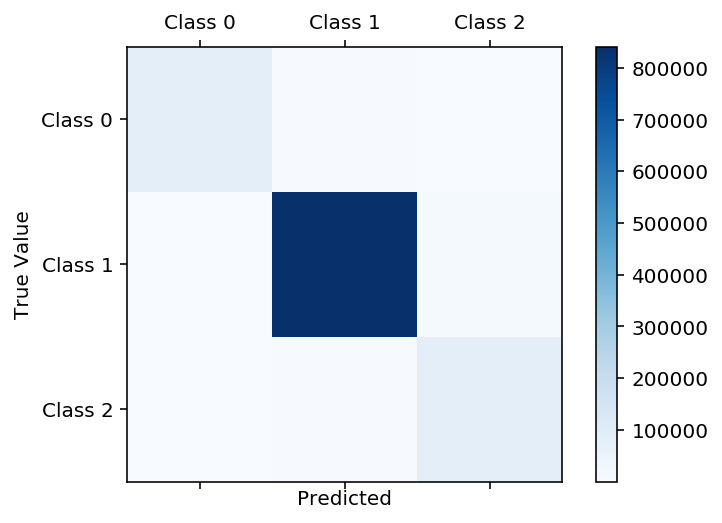

In [40]:
NeuralNetwork(X_train_num, y_train, X_test_num, y_test, X_test0_num, y_test0)

#### Initial Findings

The models yield very different results. 

Logistic regression performs badly, which is to be expected given that the prediction target is non-binary. Its accuracy is actually not bad, but that's because it arbitrarly assigns almost all the observations to the most likely/popolous class. This means that the prediction is actually useless, because our aim is most likely to separate normal behavior from anomalous behavior, and we are not achieving that. It is interesting to see what will happen when considering more features, in that case logistic regression might work better.

Decision Tree and Random Forest perform very well, they have a super high accuracy and their confusion matrix looks like it is actually predicting the anomalies. They can be optimized further by adding categorical features, but we need to be careful about overfitting. Because their performance is good on the test set, we have no reason to believe it is overfitting too badly as of now.

SVM is definitely not the right algorithm to analyze this dataset. It takes over 5 hours to run and yields a below average result. That's why we implemented a bagged version of the algorithm, that takes only a portion of the dataset at the time to fit the model, and repeats the process a few times, to return the average findings. Its performance is comparable to the non bagged version of the algorithm, so we decide to continue using the bagged version. Its performance is not good though, it always assign the observations to the most popolous class.

Neural Network performs very well. It is not the best performer here, but we believe that with further adjustments of the layering and parameters it could outperform Random Forest.

## b) Prediction of 'Binary Class': Converting class attribute into binary

Now, after having predicted the class only with numerical features, we converted the class values into binary values. 

In detail, we assigned the value 0 to all observations with class value 'normal', and 1 to all other class values.




In [35]:
y_train.nunique()

3

In [36]:
y_train_bin = y_train.apply(lambda x: 0 if x == 'normal' else 1)

In [37]:
y_test_bin = y_test.apply(lambda x: 0 if x == 'normal' else 1)

In [38]:
y_test0_bin = y_test0.apply(lambda x: 0 if x == 'normal' else 1)

In [39]:
y_train_bin.nunique()

2

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.3s finished


elapsed time = 3.34
ACCURACY Test:  0.8261267630904893
ACCURACY Test0:  0.829019528962143
ACCURACY Train:  0.8288146648307034

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.90    851802
     Class 1       0.00      0.00      0.00    179271

    accuracy                           0.83   1031073
   macro avg       0.41      0.50      0.45   1031073
weighted avg       0.68      0.83      0.75   1031073


--------------Classification Report Test0-------------------



/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.91    140130
     Class 1       0.00      0.00      0.00     28901

    accuracy                           0.83    169031
   macro avg       0.41      0.50      0.45    169031
weighted avg       0.69      0.83      0.75    169031


--------------Classification Report Train-------------------

              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.91    560383
     Class 1       0.00      0.00      0.00    115738

    accuracy                           0.83    676121
   macro avg       0.41      0.50      0.45    676121
weighted avg       0.69      0.83      0.75    676121



--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[851797      5]
 [179271      0]]


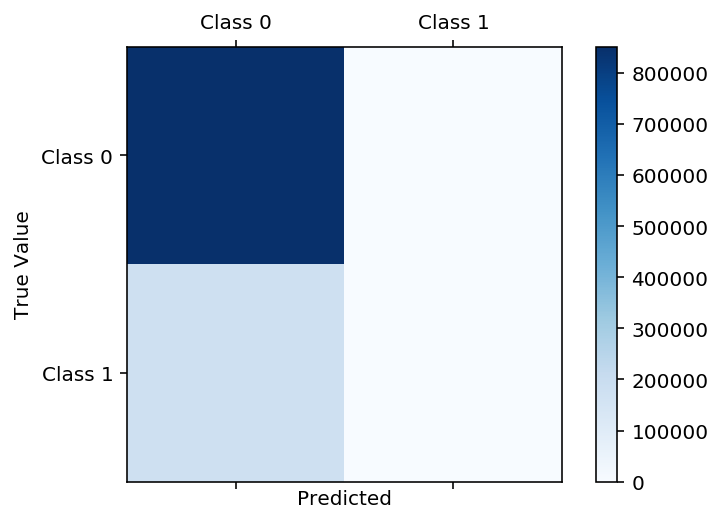

In [47]:
logistic_reg(X_train_num, y_train_bin, X_test_num, y_test_bin, X_test0_num, y_test0_bin)

elapsed time = 0.78
ACCURACY Test:  0.9955512364303982
ACCURACY Test0:  0.9909484059137081
ACCURACY Train:  0.990997173582835

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    851802
     Class 1       1.00      0.98      0.99    179271

    accuracy                           1.00   1031073
   macro avg       1.00      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99    140130
     Class 1       0.99      0.95      0.97     28901

    accuracy                           0.99    169031
   macro avg       0.99      0.98      0.98    169031
weighted avg       0.99      0.99      0.99    169031


--------------Classification Report Train-------------------

              precision    recal

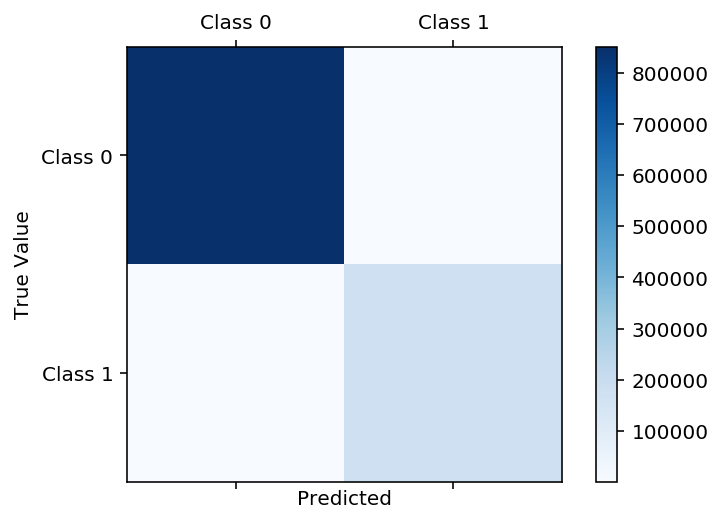

In [48]:
decision_tree(X_train_num, y_train_bin, X_test_num, y_test_bin, X_test0_num, y_test0_bin)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished


elapsed time = 14.63
ACCURACY Test:  0.9956307652319477
ACCURACY Test0:  0.9910016505848039
ACCURACY Train:  0.990997173582835

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    851802
     Class 1       1.00      0.98      0.99    179271

    accuracy                           1.00   1031073
   macro avg       1.00      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99    140130
     Class 1       1.00      0.95      0.97     28901

    accuracy                           0.99    169031
   macro avg       0.99      0.98      0.98    169031
weighted avg       0.99      0.99      0.99    169031


--------------Classification Report Train-------------------

              precision    reca

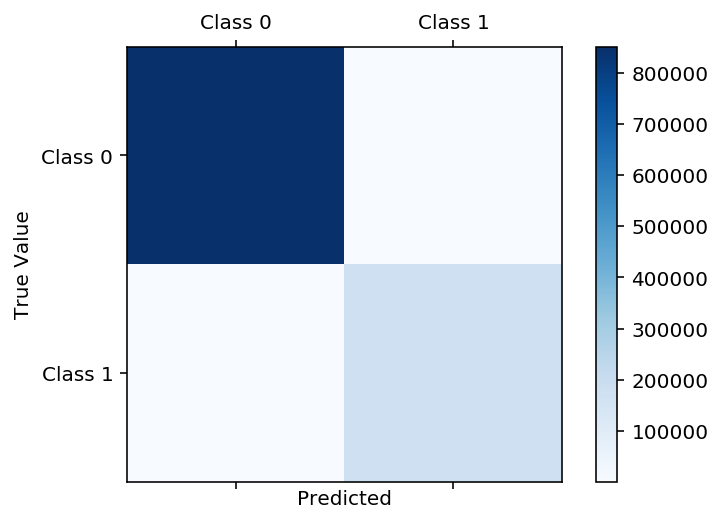

In [49]:
randomforest(X_train_num, y_train_bin, X_test_num, y_test_bin, X_test0_num, y_test0_bin)

elapsed time = 0.28
ACCURACY Test:  0.2845841177103852
ACCURACY Test0:  0.2841904739367335
ACCURACY Train:  0.2845112043554334

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.13      0.24    851802
     Class 1       0.20      1.00      0.33    179271

    accuracy                           0.28   1031073
   macro avg       0.60      0.57      0.28   1031073
weighted avg       0.86      0.28      0.25   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.14      0.24    140130
     Class 1       0.19      1.00      0.32     28901

    accuracy                           0.28    169031
   macro avg       0.60      0.57      0.28    169031
weighted avg       0.86      0.28      0.25    169031


--------------Classification Report Train-------------------

              precision    reca

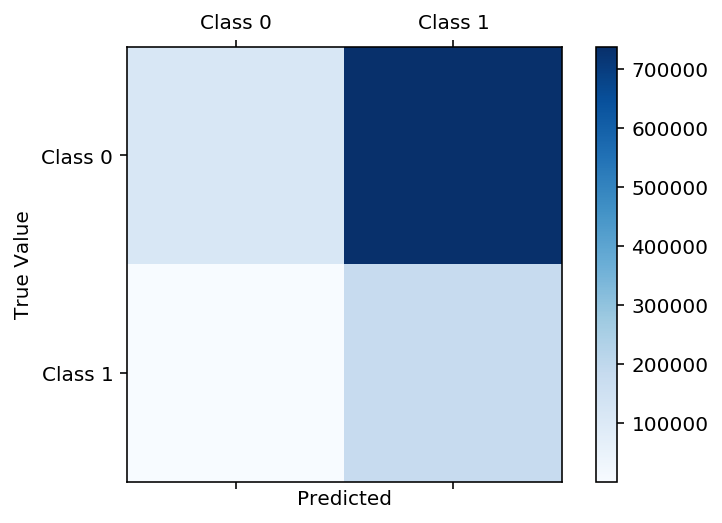

In [50]:
gaussiannb(X_train_num, y_train_bin, X_test_num, y_test_bin, X_test0_num, y_test0_bin)

In [0]:
# SupportVectorMachine(X_train_num, y_train_bin, X_test_num, y_test_bin, X_test0_num, y_test0_bin)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   14.4s remaining:   43.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   20.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.4min remaining:  4.1min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.0min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   13.7s remaining:   41.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   20.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   53.5s remaining:  2.7min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.3min finished


elapsed time = 240.32
ACCURACY Test:  0.8260724507382116
ACCURACY Test0:  0.8289544521419148
ACCURACY Train:  0.8287407135704999

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.90    851802
     Class 1       0.00      0.00      0.00    179271

    accuracy                           0.83   1031073
   macro avg       0.41      0.50      0.45   1031073
weighted avg       0.68      0.83      0.75   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.91    140130
     Class 1       0.00      0.00      0.00     28901

    accuracy                           0.83    169031
   macro avg       0.41      0.50      0.45    169031
weighted avg       0.69      0.83      0.75    169031


--------------Classification Report Train-------------------

              precision    re

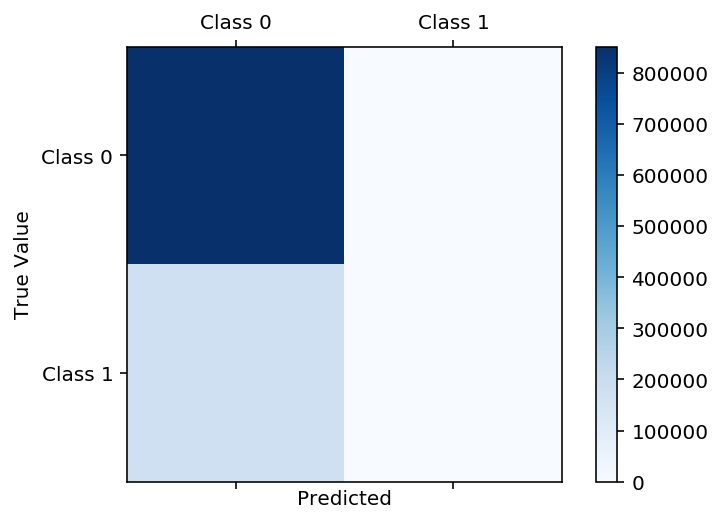

In [52]:
BaggingSVM(X_train_num, y_train_bin, X_test_num, y_test_bin, X_test0_num, y_test0_bin)

Iteration 1, loss = 0.42227551
Iteration 2, loss = 0.38826359
Iteration 3, loss = 0.18528951
Iteration 4, loss = 0.14960595
Iteration 5, loss = 0.14577000
Iteration 6, loss = 0.14346276
Iteration 7, loss = 0.14169452
Iteration 8, loss = 0.14039582
Iteration 9, loss = 0.13933684
Iteration 10, loss = 0.13788026
Iteration 11, loss = 0.13670705
Iteration 12, loss = 0.13607634
Iteration 13, loss = 0.13520687
Iteration 14, loss = 0.13418887
Iteration 15, loss = 0.13389846
Iteration 16, loss = 0.13325306
Iteration 17, loss = 0.13296453
Iteration 18, loss = 0.13266715
Iteration 19, loss = 0.13222419
Iteration 20, loss = 0.13156065
Iteration 21, loss = 0.13168815
Iteration 22, loss = 0.13099627
Iteration 23, loss = 0.13141982
Iteration 24, loss = 0.13103324
Iteration 25, loss = 0.13090826
Iteration 26, loss = 0.13114052
Iteration 27, loss = 0.13074400
Iteration 28, loss = 0.13068921
Iteration 29, loss = 0.13062460
Iteration 30, loss = 0.13068212
Iteration 31, loss = 0.13158511
Iteration 32, los

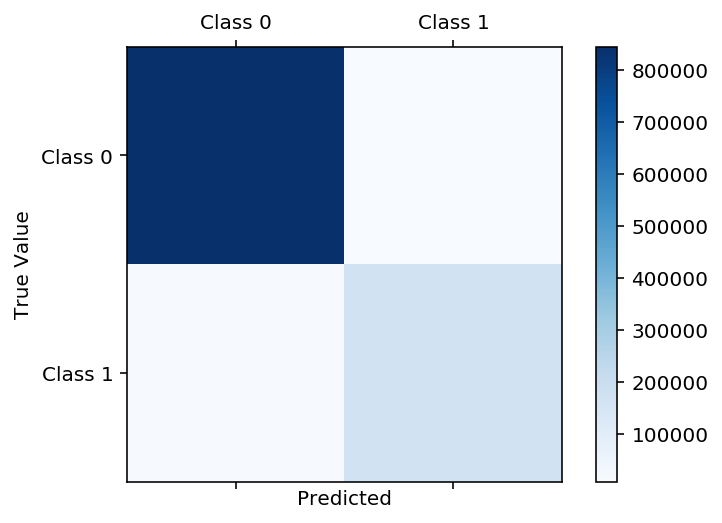

In [51]:
NeuralNetwork(X_train_num, y_train_bin, X_test_num, y_test_bin, X_test0_num, y_test0_bin)

#### Findings

Not much changes from before. With the binary target variable the algorithms perform pretty much in the same way, and keep the same flaws and strengths highlighted before. Because we keep the numerical variables only as features, this is not surprising.

## c) Prediction of 'Attack type'

In the following we will repeat the steps from above, however now we define and predict "Attack type" as our target variable. 

We still use the numerical features we used before, but we expect worse results than when we predicted "Class" because here we have 5 categories of which 2 in particular are heavily under represented.

In [40]:
# Split dataset up into train and test sets
X_train_at, X_test0_at, y_train_at, y_test0_at = train_test_split(
    train_df_b.drop(['attackType'], axis=1), 
   train_df_b['attackType'], 
    test_size=0.2
)


X_test_at = test_df_b.drop('attackType', axis=1)
y_test_at=test_df_b['attackType']

In [41]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train_at[numeric_cols])

X_train_at[numeric_cols] = standard_scaler.transform(X_train_at[numeric_cols])
X_test_at[numeric_cols] = standard_scaler.transform(X_test_at[numeric_cols])
X_test0_at[numeric_cols] = standard_scaler.transform(X_test0_at[numeric_cols])

In [42]:
X_train_at = X_train_at[numeric_cols]
X_test_at= X_test_at[numeric_cols]
X_test0_at= X_test0_at[numeric_cols]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   51.3s finished


elapsed time = 52.30
ACCURACY Test:  0.8261141548658534
ACCURACY Test0:  0.8295697238968
ACCURACY Train:  0.8286652832850925

--------------Classification Report Test-------------------



/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.90    851802
     Class 1       0.00      0.00      0.00       360
     Class 2       0.00      0.00      0.00    170512
     Class 3       0.00      0.00      0.00       257
     Class 4       0.00      0.00      0.00      8142

    accuracy                           0.83   1031073
   macro avg       0.17      0.20      0.18   1031073
weighted avg       0.68      0.83      0.75   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.83      1.00      0.91    140224
     Class 1       0.00      0.00      0.00        35
     Class 2       0.00      0.00      0.00     24884
     Class 3       0.00      0.00      0.00        60
     Class 4       0.00      0.00      0.00      3828

    accuracy                           0.83    169031
   macro avg       0.17      0.20      0.18    169031
weighted avg  

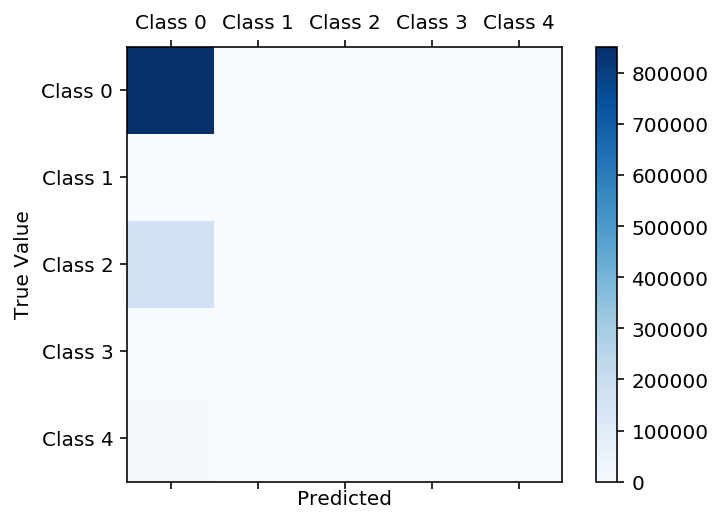

In [56]:
logistic_reg(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

elapsed time = 1.74
ACCURACY Test:  0.9954338829549411
ACCURACY Test0:  0.9902562251894623
ACCURACY Train:  0.990954281851917

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    851802
     Class 1       0.51      0.12      0.19       360
     Class 2       1.00      1.00      1.00    170512
     Class 3       0.77      0.13      0.23       257
     Class 4       0.86      0.60      0.71      8142

    accuracy                           1.00   1031073
   macro avg       0.83      0.57      0.63   1031073
weighted avg       0.99      1.00      0.99   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99    140224
     Class 1       0.63      0.34      0.44        35
     Class 2       1.00      1.00      1.00     24884
     Class 3       1.00      0.32      0.48

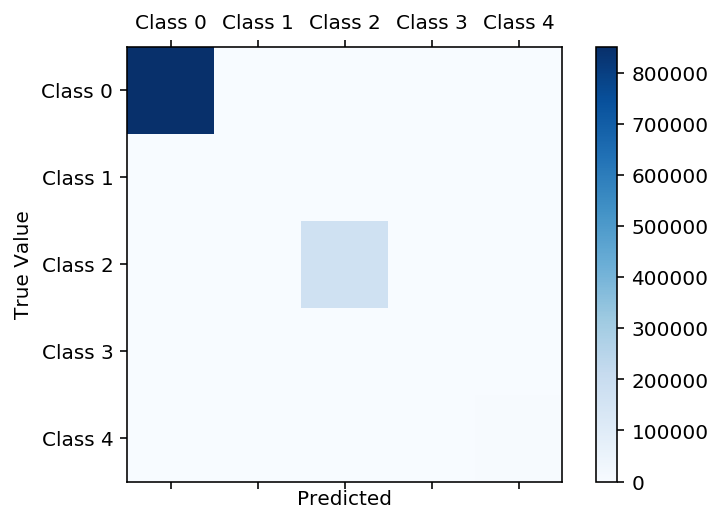

In [57]:
decision_tree(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.8s finished


elapsed time = 16.30
ACCURACY Test:  0.99552698984456
ACCURACY Test0:  0.9903213020096905
ACCURACY Train:  0.990954281851917

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    851802
     Class 1       0.90      0.12      0.21       360
     Class 2       1.00      1.00      1.00    170512
     Class 3       1.00      0.13      0.23       257
     Class 4       0.87      0.60      0.71      8142

    accuracy                           1.00   1031073
   macro avg       0.95      0.57      0.63   1031073
weighted avg       1.00      1.00      0.99   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99    140224
     Class 1       1.00      0.37      0.54        35
     Class 2       1.00      1.00      1.00     24884
     Class 3       1.00      0.32      0.48 

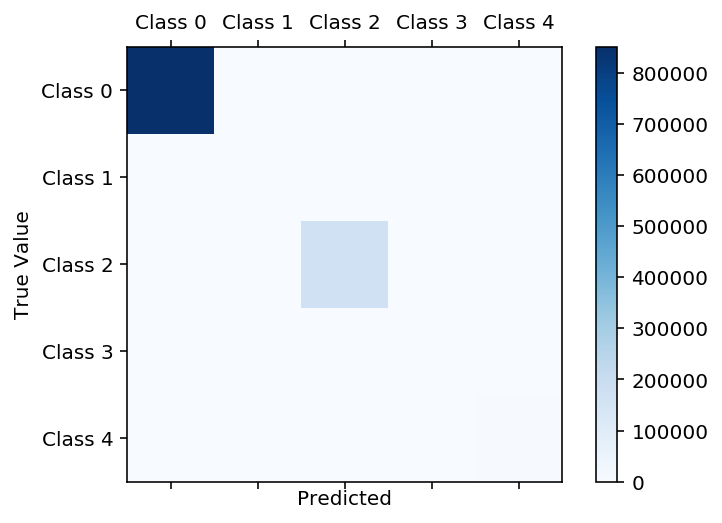

In [58]:
randomforest(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

elapsed time = 1.43
ACCURACY Test:  0.21707386382923421
ACCURACY Test0:  0.21451686377055096
ACCURACY Train:  0.2148994041007453

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.05      0.10    851802
     Class 1       0.00      0.07      0.00       360
     Class 2       0.46      1.00      0.63    170512
     Class 3       0.00      0.08      0.00       257
     Class 4       0.02      0.97      0.03      8142

    accuracy                           0.22   1031073
   macro avg       0.30      0.44      0.15   1031073
weighted avg       0.90      0.22      0.19   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.05      0.10    140224
     Class 1       0.00      0.34      0.00        35
     Class 2       0.46      1.00      0.63     24884
     Class 3       0.00      0.03      0

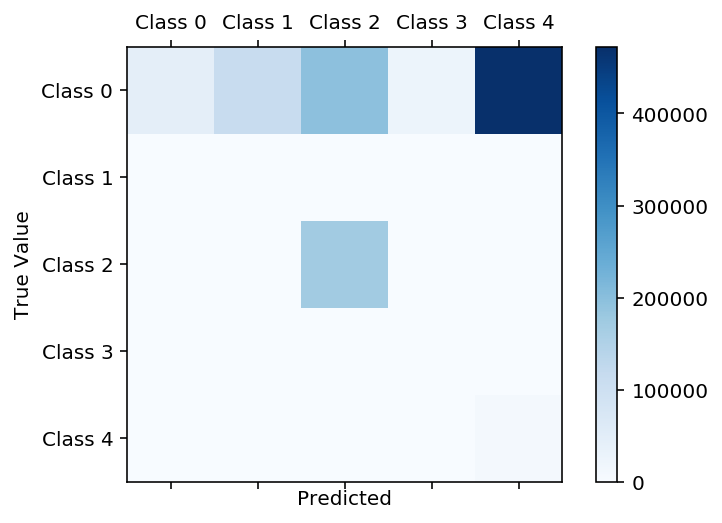

In [59]:
gaussiannb(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

In [0]:
# SupportVectorMachine(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

Iteration 1, loss = inf
Iteration 2, loss = 0.41003285
Iteration 3, loss = 0.20742074
Iteration 4, loss = 0.17220208
Iteration 5, loss = 0.15572980
Iteration 6, loss = 0.14901434
Iteration 7, loss = 0.14652144
Iteration 8, loss = 0.14472743
Iteration 9, loss = 0.14359056
Iteration 10, loss = 0.14277356
Iteration 11, loss = 0.14181314
Iteration 12, loss = 0.14117402
Iteration 13, loss = 0.14045556
Iteration 14, loss = 0.14033687
Iteration 15, loss = 0.13930048
Iteration 16, loss = 0.13911315
Iteration 17, loss = 0.13794673
Iteration 18, loss = 0.13739007
Iteration 19, loss = 0.13653375
Iteration 20, loss = 0.13640297
Iteration 21, loss = 0.13510762
Iteration 22, loss = 0.13470337
Iteration 23, loss = 0.13438817
Iteration 24, loss = 0.13390338
Iteration 25, loss = 0.13304129
Iteration 26, loss = 0.13292300
Iteration 27, loss = 0.13205621
Iteration 28, loss = 0.13240503
Iteration 29, loss = 0.13205402
Iteration 30, loss = 0.13154545
Iteration 31, loss = 0.13134046
Iteration 32, loss = 0.1

/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99    851802
     Class 1       0.00      0.00      0.00       360
     Class 2       0.97      0.97      0.97    170512
     Class 3       0.00      0.00      0.00       257
     Class 4       0.00      0.00      0.00      8142

    accuracy                           0.98   1031073
   macro avg       0.39      0.39      0.39   1031073
weighted avg       0.97      0.98      0.98   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98    140224
     Class 1       0.00      0.00      0.00        35
     Class 2       0.97      0.98      0.97     24884
     Class 3       0.00      0.00      0.00        60
     Class 4       0.00      0.00      0.00      3828

    accuracy                           0.97    169031
   macro avg       0.39      0.39      0.39    169031
weighted avg  

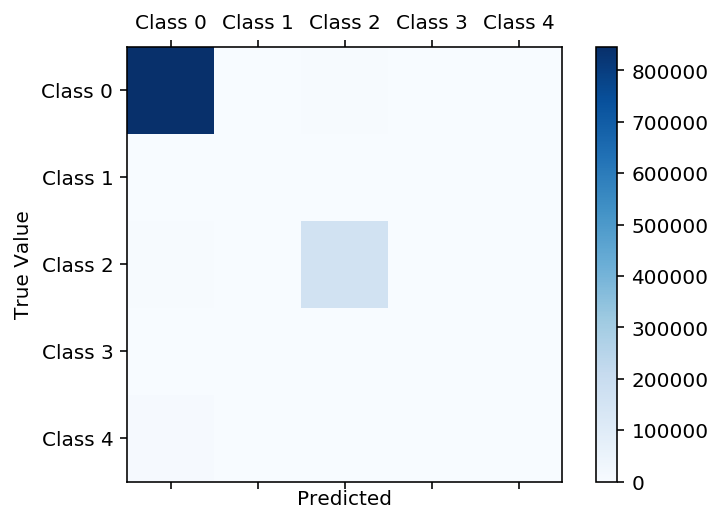

In [62]:
NeuralNetwork(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

In [57]:
# BaggingSVM(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

#### Findings

We have the results we were expecting, but with a few additional interesting findings.

Logistic Regression performs porly, just as with the classifications above.

We can really see the difference in performance between Decision Tree and Random Forest thank to this analysis. Decision tree still performs well, but struggles predicting the under represented Attack types. Random Forest instead can predict the under represented categories very well. In this scenario we would choose for sure Random Forest as our top performer.

Naive Bayes keeps performing poorly.

BaggingSVM yields an error. This error most likely occurs because of the highly unbalanced dataset. Since the BaggingSVM takes randomly 1% of the data available it is possible that the underrperesented values are not in the sample. Hence, we get a shape error.

Neural Network struggles in this scenario, it never predicts the under represented categories.

### c.i) Random Downsampling

In this section we randomly downsampled the data contained in the class column since it is highly unbalanced.

We plot this graph to see how unbalanced the dataset is:

Class 0: 700513
Class 1: 125430
Class 2: 18686
Class 3: 355
Class 4: 168


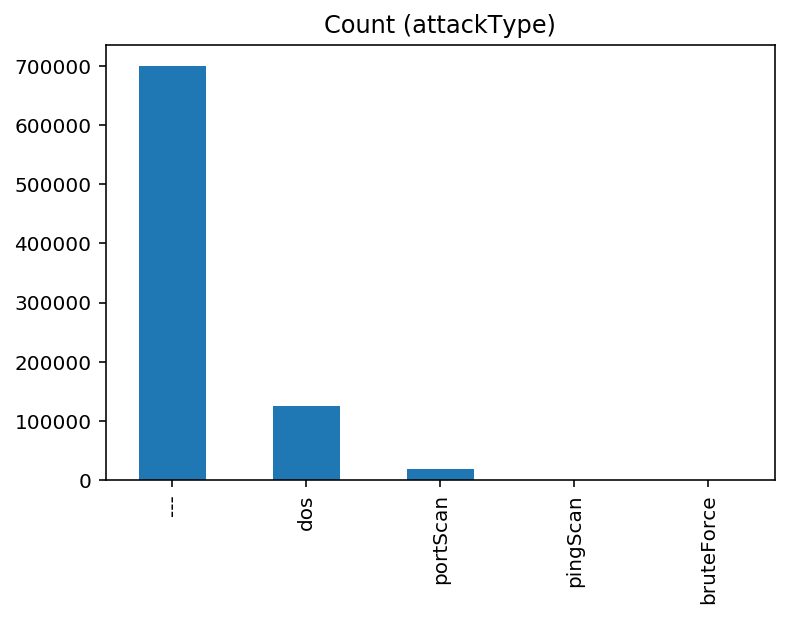

In [40]:
at_count = train_df_b.attackType.value_counts()
print('Class 0:', at_count[0])
print('Class 1:', at_count[1])
print('Class 2:', at_count[2])
print('Class 3:', at_count[3])
print('Class 4:', at_count[4])


at_count.plot(kind='bar', title='Count (attackType)');

Here we rebalance only the training set, and then fit the model on it. 

Then we apply this new model to the original test set (not undersampled), and see if the predictions get better.

In [41]:
df_0 = train_df_b[train_df_b.attackType=='---']
df_1 = train_df_b[train_df_b.attackType=='dos']
df_2 = train_df_b[train_df_b.attackType=='portScan']
df_3 = train_df_b[train_df_b.attackType=='pingScan']
df_minority = train_df_b[train_df_b.attackType=='bruteForce']

In [42]:
df_class_0_under = df_0.sample(168)
df_class_1_under = df_1.sample(168)
df_class_2_under = df_2.sample(168)
df_class_3_under = df_3.sample(168)

In [43]:
df_downsampled = pd.concat([df_class_0_under,df_class_1_under,df_class_2_under,df_class_3_under, df_minority])

In [44]:
df_downsampled.groupby('attackType').count()

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Flags,Tos,class,attackID,attackDescription,Bytes
attackType,,,,,,,,,,,,,,,
---,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
bruteForce,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
dos,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
pingScan,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
portScan,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168


As usual, we split the new downsampled training dataset and fit the model. We also scale the numerical variables, and then run the algorithms.

In [45]:
# Split dataset up into train and test sets
X_train_at, X_test0_at, y_train_at, y_test0_at = train_test_split(
    df_downsampled.drop(['attackType'], axis=1), 
   df_downsampled['attackType'], 
    test_size=0.2
)


X_test_at = test_df_b.drop('attackType', axis=1)
y_test_at=test_df_b['attackType']

In [46]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train_at[numeric_cols])

X_train_at[numeric_cols] = standard_scaler.transform(X_train_at[numeric_cols])
X_test_at[numeric_cols] = standard_scaler.transform(X_test_at[numeric_cols])
X_test0_at[numeric_cols] = standard_scaler.transform(X_test0_at[numeric_cols])

In [47]:
X_train_at = X_train_at[numeric_cols]
X_test_at= X_test_at[numeric_cols]
X_test0_at= X_test0_at[numeric_cols]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


elapsed time = 1.00
ACCURACY Test:  0.2722959480075611
ACCURACY Test0:  0.5178571428571429
ACCURACY Train:  0.5758928571428571

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.12      0.21    851802
     Class 1       0.00      0.09      0.00       360
     Class 2       0.50      1.00      0.67    170512
     Class 3       0.00      0.16      0.00       257
     Class 4       0.02      0.97      0.04      8142

    accuracy                           0.27   1031073
   macro avg       0.30      0.47      0.18   1031073
weighted avg       0.91      0.27      0.29   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.05      0.10        40
     Class 1       0.63      0.40      0.49        30
     Class 2       0.64      1.00      0.78        25
     Class 3       0.71      0.32      0.4

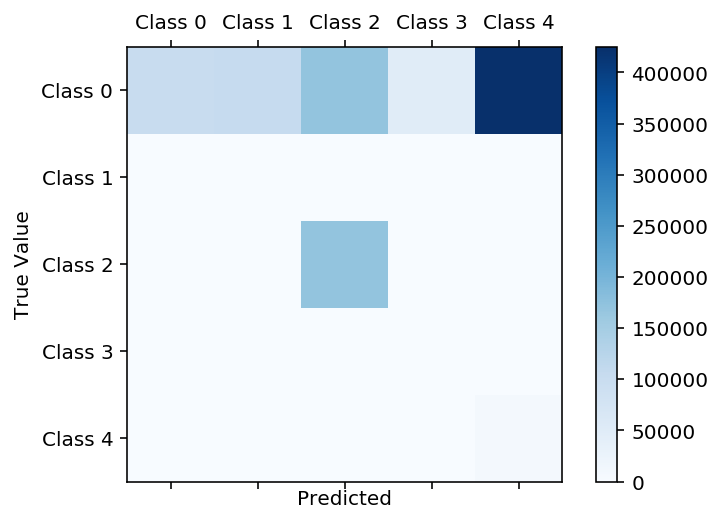

In [50]:
logistic_reg(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

elapsed time = 0.12
ACCURACY Test:  0.8467819446343761
ACCURACY Test0:  0.9404761904761905
ACCURACY Train:  0.9836309523809523

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.82      0.90    851802
     Class 1       0.00      0.88      0.01       360
     Class 2       0.93      0.99      0.96    170512
     Class 3       0.03      0.86      0.05       257
     Class 4       0.17      0.93      0.29      8142

    accuracy                           0.85   1031073
   macro avg       0.43      0.90      0.44   1031073
weighted avg       0.98      0.85      0.90   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.88      0.93        40
     Class 1       0.83      0.97      0.89        30
     Class 2       0.96      1.00      0.98        25
     Class 3       0.92      0.97      0.9

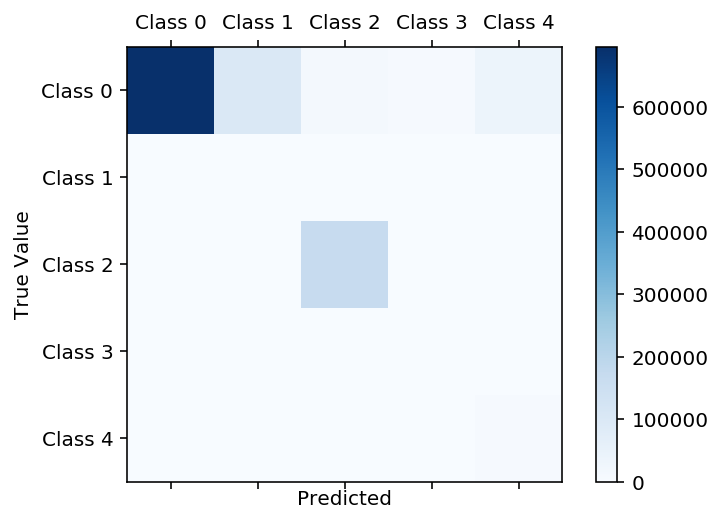

In [51]:
decision_tree(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


elapsed time = 3.03
ACCURACY Test:  0.8947998832284426
ACCURACY Test0:  0.9583333333333334
ACCURACY Train:  0.9836309523809523

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.87      0.93    851802
     Class 1       0.01      0.92      0.01       360
     Class 2       0.94      1.00      0.97    170512
     Class 3       0.03      0.86      0.06       257
     Class 4       0.17      0.93      0.29      8142

    accuracy                           0.89   1031073
   macro avg       0.43      0.92      0.45   1031073
weighted avg       0.98      0.89      0.93   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.93      0.96        40
     Class 1       0.91      1.00      0.95        30
     Class 2       1.00      1.00      1.00        25
     Class 3       0.92      0.97      0.9

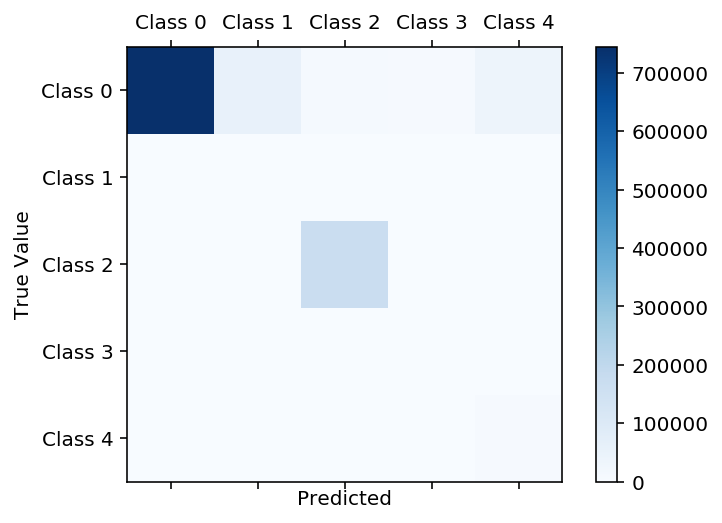

In [52]:
randomforest(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

elapsed time = 0.19
ACCURACY Test:  0.218881689269334
ACCURACY Test0:  0.5178571428571429
ACCURACY Train:  0.5625

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.06      0.11    851802
     Class 1       0.00      0.10      0.00       360
     Class 2       0.54      1.00      0.70    170512
     Class 3       0.00      0.16      0.00       257
     Class 4       0.02      0.96      0.04      8142

    accuracy                           0.22   1031073
   macro avg       0.31      0.45      0.17   1031073
weighted avg       0.91      0.22      0.20   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.05      0.10        40
     Class 1       0.67      0.40      0.50        30
     Class 2       0.69      1.00      0.82        25
     Class 3       0.52      0.32      0.40        37
 

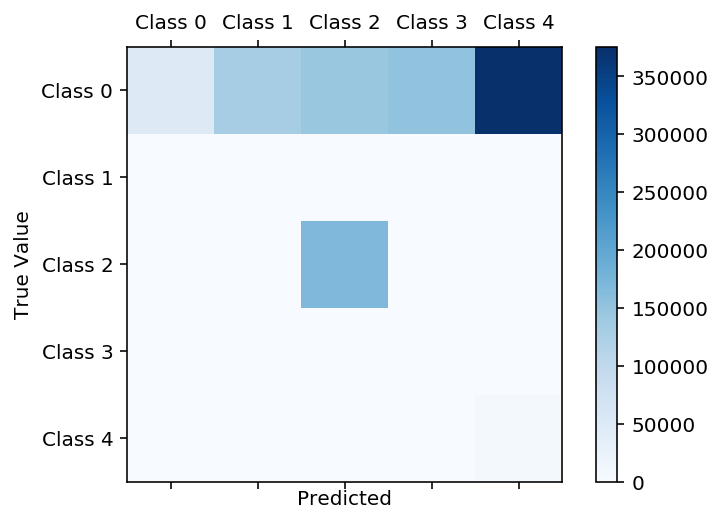

In [53]:
gaussiannb(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

Iteration 1, loss = 1.76749237
Iteration 2, loss = 1.75129944
Iteration 3, loss = 1.73767794
Iteration 4, loss = 1.72597824
Iteration 5, loss = 1.71470654
Iteration 6, loss = 1.70509773
Iteration 7, loss = 1.69572211
Iteration 8, loss = 1.68654694
Iteration 9, loss = 1.67892672
Iteration 10, loss = 1.67112465
Iteration 11, loss = 1.66374608
Iteration 12, loss = 1.65650742
Iteration 13, loss = 1.64923536
Iteration 14, loss = 1.64184679
Iteration 15, loss = 1.63503205
Iteration 16, loss = 1.62829538
Iteration 17, loss = 1.62221019
Iteration 18, loss = 1.61652150
Iteration 19, loss = 1.60955626
Iteration 20, loss = 1.60344605
Iteration 21, loss = 1.59688090
Iteration 22, loss = 1.59114740
Iteration 23, loss = 1.58502520
Iteration 24, loss = 1.57947960
Iteration 25, loss = 1.57419025
Iteration 26, loss = 1.56917295
Iteration 27, loss = 1.56396640
Iteration 28, loss = 1.55886854
Iteration 29, loss = 1.55342769
Iteration 30, loss = 1.54837458
Iteration 31, loss = 1.54302265
Iteration 32, los

/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


elapsed time = 1.28
ACCURACY Test:  0.4505442388657253
ACCURACY Test0:  0.6011904761904762
ACCURACY Train:  0.6220238095238095

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.34      0.50    851802
     Class 1       0.00      0.09      0.00       360
     Class 2       0.73      1.00      0.84    170512
     Class 3       0.00      0.16      0.00       257
     Class 4       0.02      0.97      0.04      8142

    accuracy                           0.45   1031073
   macro avg       0.35      0.51      0.28   1031073
weighted avg       0.95      0.45      0.56   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.38      0.55        40
     Class 1       0.86      0.40      0.55        30
     Class 2       0.81      1.00      0.89        25
     Class 3       0.76      0.35      0.4

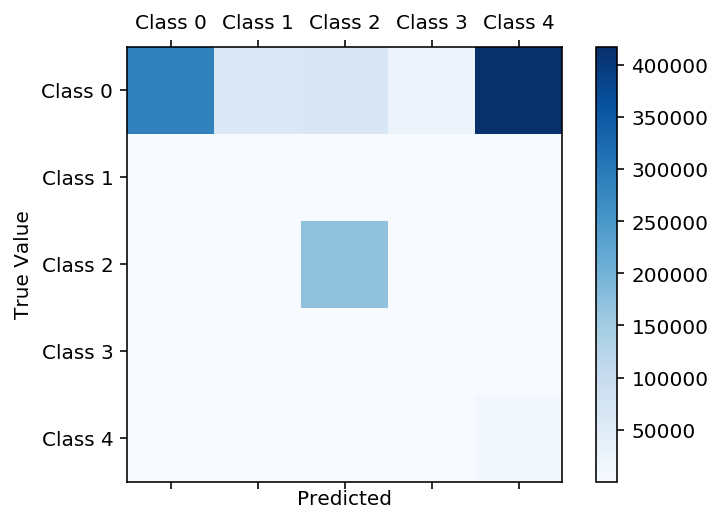

In [54]:
NeuralNetwork(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

In [59]:
# BaggingSVM(X_train_at, y_train_at, X_test_at, y_test_at, X_test0_at, y_test0_at)

#### Findings:

The models generally speaking perform worse than before. This is probably due to the small amount of data used to fit the model, oversampling the under represented variables might be a more appropriate technique. 

What seems to be interesting is that Naive Bayes suddenly performs better, but only on the train and test0 data. When it is presented with the test data from week 2 it performs poorly, meaning that is likely overfitted, the model cannot be generalized to other datasets (rather it fitted on the specific patterns of week 1).

# 4) Classification Introducing Additional Features

## a) Day of the Week

We create a copy of the dataset, so that we modify it with the features regarding the date exclusively. 

In [48]:
train_date = train_df_b.copy()
test_date = test_df_b.copy()

First we add the day and hour as two new columns, both in the training and testing.

In [49]:
train_date['Date first seen'] = pd.to_datetime(train_date['Date first seen'])
test_date['Date first seen'] = pd.to_datetime(test_date['Date first seen'])

In [50]:
train_date['day']=train_date['Date first seen'].dt.dayofweek
test_date['day']=test_date['Date first seen'].dt.dayofweek

In [51]:
train_date['hour']=train_date['Date first seen'].dt.hour
test_date['hour']=test_date['Date first seen'].dt.hour

We decided to add the peak time of attacks as well (which corresponds to friday at 2 pm).

In [52]:
train_date['friday'] = train_date['day'].apply(lambda x: 1 if x == 4 else 0)
train_date['2pm'] = train_date['hour'].apply(lambda x: 1 if x == 14 else 0)
test_date['friday'] = test_date['day'].apply(lambda x: 1 if x == 4 else 0)
test_date['2pm'] = test_date['hour'].apply(lambda x: 1 if x == 14 else 0)

In [53]:
train_date['friday'].nunique()

2

In [54]:
train_date['2pm'].nunique()

2

In [55]:
train_date.sample(20)

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Flags,Tos,class,attackType,attackID,attackDescription,Bytes,day,hour,friday,2pm
371510,3720493,2017-03-17 13:06:00.395,0.005,TCP,192.168.100.6,80,192.168.220.16,42506.0,4,.A..SF,0,victim,dos,16,10000 connections on 192.168.100.6:80,272.0,4,13,1,0
168749,1688820,2017-03-16 08:31:53.320,0.000,TCP,192.168.210.5,56282,10089_52,443.0,1,.A....,0,normal,---,---,---,55.0,3,8,0,0
45386,453539,2017-03-15 10:30:34.123,0.533,TCP,10710_179,443,192.168.220.9,43100.0,27,.AP.S.,0,normal,---,---,---,40046.0,2,10,0,0
357760,3582970,2017-03-17 13:03:33.598,0.000,TCP,192.168.200.4,55746,10037_159,443.0,1,.A....,0,normal,---,---,---,66.0,4,13,1,0
505241,5054830,2017-03-18 17:52:37.324,0.000,UDP,192.168.220.14,34186,DNS,53.0,2,......,0,normal,---,---,---,158.0,5,17,0,0
675709,6761890,2017-03-20 17:42:25.798,0.522,TCP,192.168.220.14,38679,10081_164,80.0,6,.AP.S.,0,normal,---,---,---,1373.0,0,17,0,0
579078,5795367,2017-03-20 10:44:33.183,0.008,UDP,192.168.220.8,56185,DNS,53.0,2,......,0,normal,---,---,---,174.0,0,10,0,0
15571,154261,2017-03-15 06:48:48.626,0.000,UDP,DNS,53,192.168.220.4,54342.0,1,......,0,normal,---,---,---,233.0,2,6,0,0
422043,4225263,2017-03-17 14:18:04.591,0.005,TCP,192.168.220.16,34095,192.168.100.6,80.0,6,.AP.SF,0,attacker,dos,18,10000 connections on 192.168.100.6:80,545.0,4,14,1,1
344200,3448295,2017-03-17 12:04:53.754,0.000,TCP,192.168.220.13,38659,10223_4,80.0,1,.A....,0,normal,---,---,---,66.0,4,12,1,0


Here we start the usual splitting process, and scale the numeric columns.

In [56]:
# Split dataset up into train and test sets
X_train, X_test0, y_train, y_test0 = train_test_split(
    train_date.drop(['class'], axis=1), 
   train_date['class'], 
    test_size=0.2
)


X_test = test_date.drop('class', axis=1)
y_test=test_date['class']

In [57]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train[numeric_cols])

X_train[numeric_cols] = standard_scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = standard_scaler.transform(X_test[numeric_cols])
X_test0[numeric_cols] = standard_scaler.transform(X_test0[numeric_cols])

This time, instead of reassigning then numerical columns only, we reassign the columns regarding the date information, and then we run the algorithms.

In [58]:
X_train= X_train[['Duration','Packets','Bytes','day','hour','friday','2pm']]
X_test= X_test[['Duration', 'Packets', 'Bytes','day','hour','friday','2pm']]
X_test0= X_test0[['Duration', 'Packets', 'Bytes','day','hour','friday','2pm']]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   53.0s finished


elapsed time = 54.14
ACCURACY Test:  0.8261257932270557
ACCURACY Test0:  0.8283628446852944
ACCURACY Train:  0.8289773576031509

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     91009
     Class 1       0.83      1.00      0.90    851802
     Class 2       0.00      0.00      0.00     88262

    accuracy                           0.83   1031073
   macro avg       0.28      0.33      0.30   1031073
weighted avg       0.68      0.83      0.75   1031073


--------------Classification Report Test0-------------------



/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     15024
     Class 1       0.83      1.00      0.91    140020
     Class 2       0.00      0.00      0.00     13987

    accuracy                           0.83    169031
   macro avg       0.28      0.33      0.30    169031
weighted avg       0.69      0.83      0.75    169031


--------------Classification Report Train-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     60100
     Class 1       0.83      1.00      0.91    560493
     Class 2       0.00      0.00      0.00     55528

    accuracy                           0.83    676121
   macro avg       0.28      0.33      0.30    676121
weighted avg       0.69      0.83      0.75    676121



--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[     0  91009      0]
 [     1 851796      5]
 [     0  88262      0]]


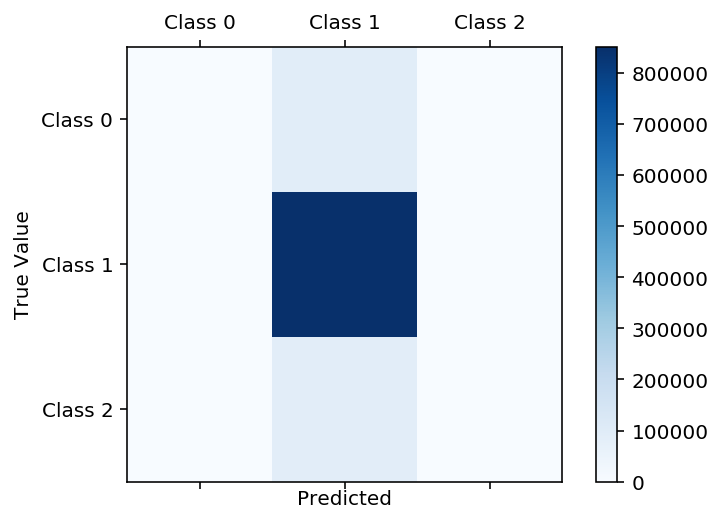

In [46]:
logistic_reg(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 2.37
ACCURACY Test:  0.9487359284939088
ACCURACY Test0:  0.9919659707390952
ACCURACY Train:  0.9924318280307814

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.65      0.78     91009
     Class 1       0.95      1.00      0.97    851802
     Class 2       0.95      0.81      0.88     88262

    accuracy                           0.95   1031073
   macro avg       0.96      0.82      0.88   1031073
weighted avg       0.95      0.95      0.95   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     15024
     Class 1       0.99      1.00      1.00    140020
     Class 2       0.97      0.94      0.96     13987

    accuracy                           0.99    169031
   macro avg       0.99      0.98      0.98    169031
weighted avg       0.99      0.99      0.

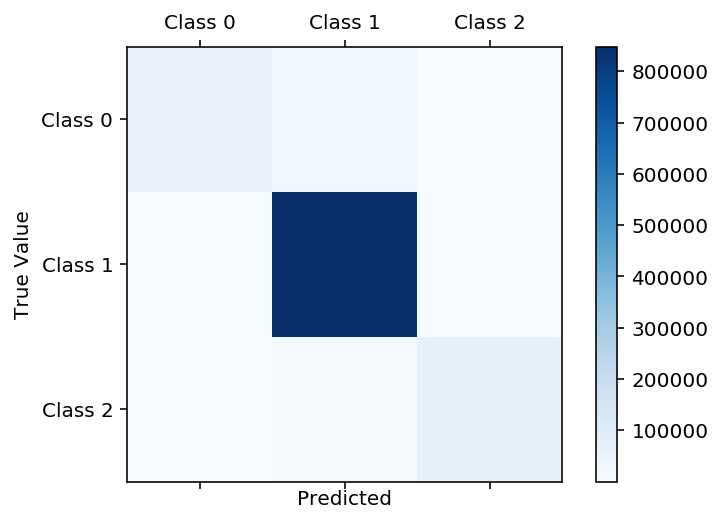

In [47]:
decision_tree(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.7s finished


elapsed time = 19.55
ACCURACY Test:  0.9305849343353962
ACCURACY Test0:  0.9920902083049855
ACCURACY Train:  0.9924318280307814

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.81      0.89     91009
     Class 1       0.93      1.00      0.96    851802
     Class 2       0.92      0.42      0.58     88262

    accuracy                           0.93   1031073
   macro avg       0.95      0.74      0.81   1031073
weighted avg       0.93      0.93      0.92   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     15024
     Class 1       0.99      1.00      1.00    140020
     Class 2       0.97      0.94      0.96     13987

    accuracy                           0.99    169031
   macro avg       0.99      0.98      0.98    169031
weighted avg       0.99      0.99      0

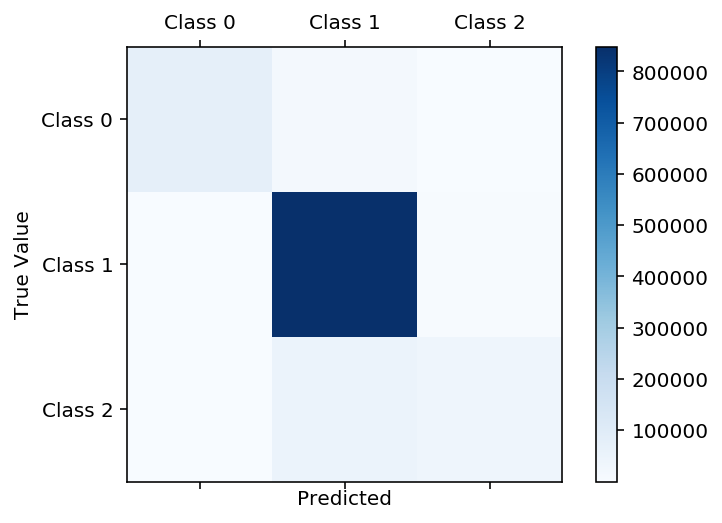

In [48]:
randomforest(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 1.65
ACCURACY Test:  0.28086760103309855
ACCURACY Test0:  0.26156740479557006
ACCURACY Train:  0.2608275737626845

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.20      0.95      0.33     91009
     Class 1       1.00      0.15      0.26    851802
     Class 2       0.16      0.86      0.27     88262

    accuracy                           0.28   1031073
   macro avg       0.45      0.65      0.29   1031073
weighted avg       0.86      0.28      0.27   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.19      0.88      0.31     15024
     Class 1       1.00      0.15      0.25    140020
     Class 2       0.13      0.76      0.23     13987

    accuracy                           0.26    169031
   macro avg       0.44      0.59      0.27    169031
weighted avg       0.85      0.26      

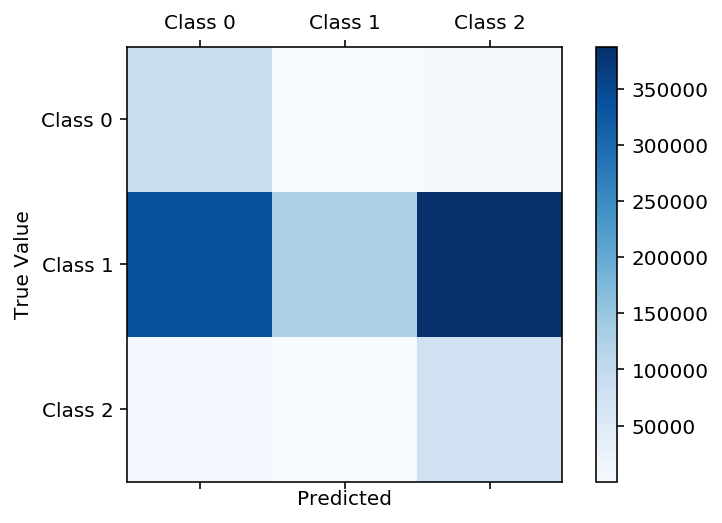

In [49]:
gaussiannb(X_train, y_train, X_test, y_test, X_test0, y_test0)

Iteration 1, loss = 0.46467221
Iteration 2, loss = 0.40650279
Iteration 3, loss = 0.38939190
Iteration 4, loss = 0.37736864
Iteration 5, loss = 0.36364582
Iteration 6, loss = 0.35300457
Iteration 7, loss = 0.33948055
Iteration 8, loss = 0.32466130
Iteration 9, loss = 0.31068656
Iteration 10, loss = 0.29521417
Iteration 11, loss = 0.28061520
Iteration 12, loss = 0.26599539
Iteration 13, loss = 0.25369371
Iteration 14, loss = 0.24475711
Iteration 15, loss = 0.23641085
Iteration 16, loss = 0.22864729
Iteration 17, loss = 0.22394075
Iteration 18, loss = 0.22169405
Iteration 19, loss = 0.21531055
Iteration 20, loss = 0.21160745
Iteration 21, loss = 0.20823881
Iteration 22, loss = 0.20385832
Iteration 23, loss = 0.20321853
Iteration 24, loss = 0.19998042
Iteration 25, loss = 0.19701033
Iteration 26, loss = 0.19447699
Iteration 27, loss = 0.19374195
Iteration 28, loss = 0.18987573
Iteration 29, loss = 0.18645036
Iteration 30, loss = 0.18455991
Iteration 31, loss = 0.18255346
Iteration 32, los

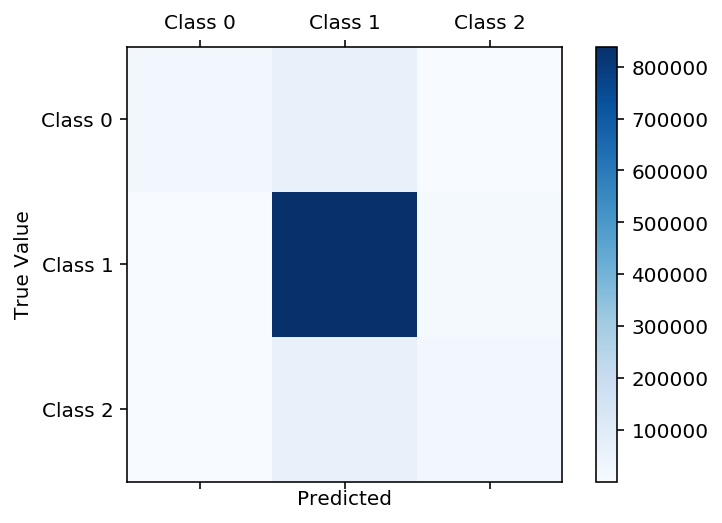

In [50]:
NeuralNetwork(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  2.2min remaining:  6.5min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.6min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.6min remaining:  4.8min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.5min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   16.2s remaining:   48.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   24.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.0min remaining:  3.1min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.6min finished


elapsed time = 427.89
ACCURACY Test:  0.8261063959583851
ACCURACY Test0:  0.8283332643124633
ACCURACY Train:  0.8289670044267224

--------------Classification Report Test-------------------



/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     91009
     Class 1       0.83      1.00      0.90    851802
     Class 2       0.00      0.00      0.00     88262

    accuracy                           0.83   1031073
   macro avg       0.28      0.33      0.30   1031073
weighted avg       0.68      0.83      0.75   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     15024
     Class 1       0.83      1.00      0.91    140020
     Class 2       0.00      0.00      0.00     13987

    accuracy                           0.83    169031
   macro avg       0.28      0.33      0.30    169031
weighted avg       0.69      0.83      0.75    169031


--------------Classification Report Train-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     60100
   

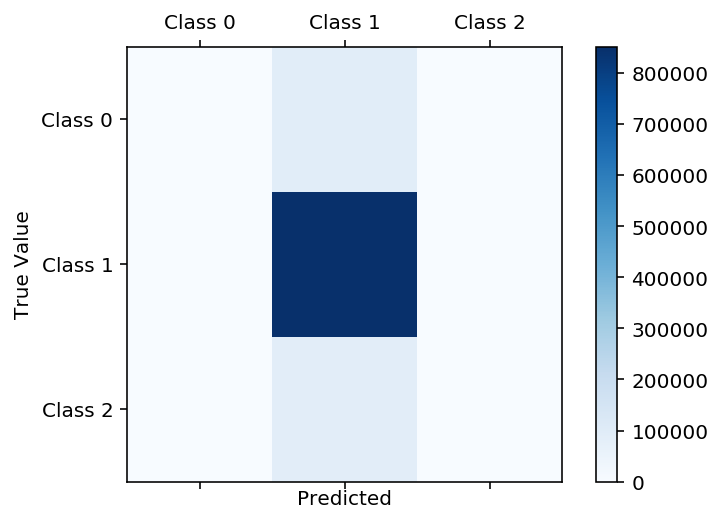

In [51]:
BaggingSVM(X_train, y_train, X_test, y_test, X_test0, y_test0)

#### Findings

We don't see significant improvements in the results of the algorithms. There are a few interesting facts though.

We see that Naive Bayes sees a slight improvement (although it still has a long way to go).

Logistic Regression, Decision Tree, Random Forest, and SVM have the same strengths and flaws as above.

Neural Network performs decently, but underperforms on the test set compared to the other algorithms, meaning that it is probably a bit overfitted  and doesn't generalize very well.

## b) Flags

We follow the same steps as above, but here we define new features based on "Flags". 

We then do the usual splitting, scaling of numerical features and reassignment with numerical features and the additional columns with the information about Flags. 

Finally, we convert the new columns with one hot encoding, so as to apply the algorithms.

In [59]:
train_flags = train_df_b.copy()
test_flags = test_df_b.copy()

In [60]:
train_flags["Flag_1"] = [x[0] for x in train_flags["Flags"]]
train_flags["Flag_2"] = [x[1] for x in train_flags["Flags"]]
train_flags["Flag_3"] = [x[2] for x in train_flags["Flags"]]
train_flags["Flag_4"] = [x[3] for x in train_flags["Flags"]]
train_flags["Flag_5"] = [x[4] for x in train_flags["Flags"]]
train_flags["Flag_6"] = [x[5] for x in train_flags["Flags"]]

In [61]:
test_flags["Flag_1"] = [x[0] for x in test_flags["Flags"]]
test_flags["Flag_2"] = [x[1] for x in test_flags["Flags"]]
test_flags["Flag_3"] = [x[2] for x in test_flags["Flags"]]
test_flags["Flag_4"] = [x[3] for x in test_flags["Flags"]]
test_flags["Flag_5"] = [x[4] for x in test_flags["Flags"]]
test_flags["Flag_6"] = [x[5] for x in test_flags["Flags"]]

In [62]:
# Split dataset up into train and test sets
X_train, X_test0, y_train, y_test0 = train_test_split(
    train_flags.drop(['class'], axis=1), 
   train_flags['class'], 
    test_size=0.2
)


X_test = test_flags.drop('class', axis=1)
y_test=test_flags['class']

In [63]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train[numeric_cols])

X_train[numeric_cols] = standard_scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = standard_scaler.transform(X_test[numeric_cols])
X_test0[numeric_cols] = standard_scaler.transform(X_test0[numeric_cols])

In [64]:
X_train= X_train[['Duration','Packets','Bytes','Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6']]
X_test= X_test[['Duration','Packets','Bytes','Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6']]
X_test0= X_test0[['Duration','Packets','Bytes','Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6']]

In [65]:
X_train.columns

Index(['Duration', 'Packets', 'Bytes', 'Flag_1', 'Flag_2', 'Flag_3', 'Flag_4',
       'Flag_5', 'Flag_6'],
      dtype='object')

In [66]:
X_train = pd.get_dummies(X_train, columns=['Flag_1', 'Flag_2', 'Flag_3', 'Flag_4',
       'Flag_5', 'Flag_6'])

In [67]:
X_test = pd.get_dummies(X_test, columns=['Flag_1', 'Flag_2', 'Flag_3', 'Flag_4',
       'Flag_5', 'Flag_6'])

In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031073 entries, 0 to 1031072
Data columns (total 14 columns):
Duration    1031073 non-null float64
Packets     1031073 non-null float64
Bytes       1031073 non-null float64
Flag_1_.    1031073 non-null uint8
Flag_2_.    1031073 non-null uint8
Flag_2_A    1031073 non-null uint8
Flag_3_.    1031073 non-null uint8
Flag_3_P    1031073 non-null uint8
Flag_4_.    1031073 non-null uint8
Flag_4_R    1031073 non-null uint8
Flag_5_.    1031073 non-null uint8
Flag_5_S    1031073 non-null uint8
Flag_6_.    1031073 non-null uint8
Flag_6_F    1031073 non-null uint8
dtypes: float64(3), uint8(11)
memory usage: 34.4 MB


In [69]:
X_test0 = pd.get_dummies(X_test0, columns=['Flag_1', 'Flag_2', 'Flag_3', 'Flag_4',
       'Flag_5', 'Flag_6'])

In [70]:
X_test0

,Duration,Packets,Bytes,Flag_1_.,Flag_2_.,Flag_2_A,Flag_3_.,Flag_3_P,Flag_4_.,Flag_4_R,Flag_5_.,Flag_5_S,Flag_6_.,Flag_6_F
646824,-0.144823,-0.014328,-0.009164,1,0,1,1,0,1,0,1,0,1,0
267646,-0.144823,-0.014328,-0.009164,1,0,1,1,0,1,0,1,0,1,0
3244,-0.144823,-0.014328,-0.009168,1,1,0,1,0,1,0,0,1,1,0
175474,-0.144823,-0.014328,-0.009164,1,0,1,1,0,1,0,1,0,1,0
225713,-0.013348,-0.013331,-0.009128,1,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635935,-0.144823,-0.014328,-0.009164,1,0,1,1,0,1,0,1,0,1,0
482176,-0.141031,-0.013331,-0.009110,1,0,1,0,1,1,0,1,0,1,0
106027,-0.139767,-0.010340,-0.008958,1,0,1,0,1,1,0,0,1,0,1
374070,-0.141031,-0.011337,-0.009061,1,0,1,1,0,1,0,0,1,0,1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


elapsed time = 63.10
ACCURACY Test:  0.9919200677352622
ACCURACY Test0:  0.989493051570422
ACCURACY Train:  0.9896409074707042

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.96      0.99      0.98     91009
     Class 1       1.00      0.99      1.00    851802
     Class 2       0.96      1.00      0.98     88262

    accuracy                           0.99   1031073
   macro avg       0.97      0.99      0.98   1031073
weighted avg       0.99      0.99      0.99   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.95      0.98      0.97     15011
     Class 1       1.00      0.99      0.99    140128
     Class 2       0.95      0.99      0.97     13892

    accuracy                           0.99    169031
   macro avg       0.97      0.99      0.98    169031
weighted avg       0.99      0.99      0.

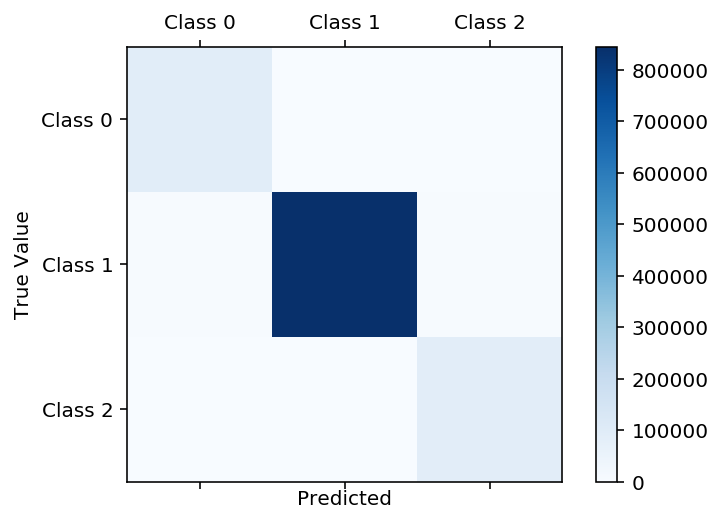

In [65]:
logistic_reg(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 2.16
ACCURACY Test:  0.9971282343733179
ACCURACY Test0:  0.9967461589885879
ACCURACY Train:  0.9968659455925788

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       0.98      1.00      0.99     88262

    accuracy                           1.00   1031073
   macro avg       0.99      1.00      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     15011
     Class 1       1.00      1.00      1.00    140128
     Class 2       0.98      0.99      0.98     13892

    accuracy                           1.00    169031
   macro avg       0.99      0.99      0.99    169031
weighted avg       1.00      1.00      1.

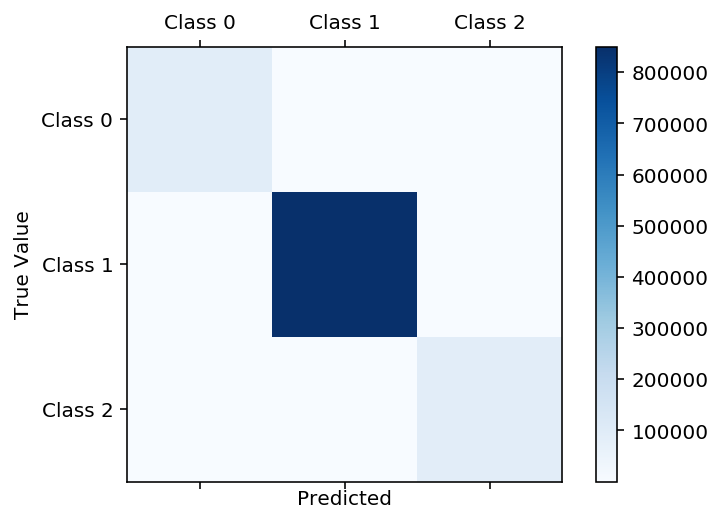

In [66]:
decision_tree(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished


elapsed time = 16.71
ACCURACY Test:  0.9971825467255956
ACCURACY Test0:  0.9968112358088161
ACCURACY Train:  0.9968659455925788

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       0.98      1.00      0.99     88262

    accuracy                           1.00   1031073
   macro avg       0.99      1.00      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     15011
     Class 1       1.00      1.00      1.00    140128
     Class 2       0.98      0.99      0.98     13892

    accuracy                           1.00    169031
   macro avg       0.99      0.99      0.99    169031
weighted avg       1.00      1.00      1

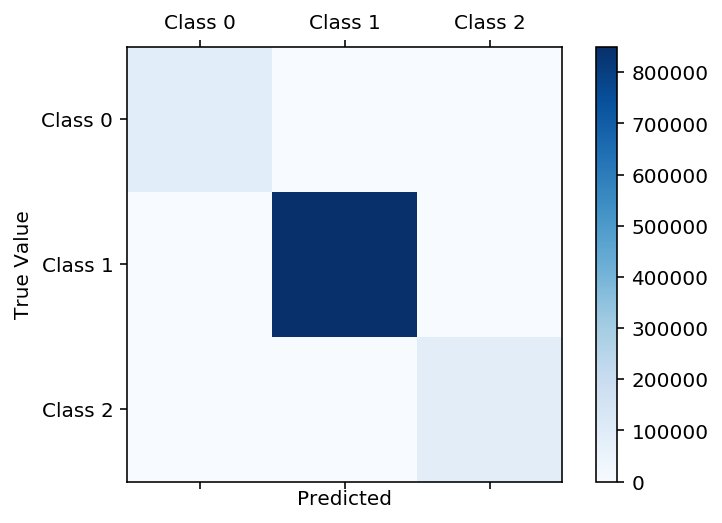

In [67]:
randomforest(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 1.91
ACCURACY Test:  0.5531810065824632
ACCURACY Test0:  0.5384988552395714
ACCURACY Train:  0.5387704271868496

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.67      0.99      0.80     91009
     Class 1       1.00      0.46      0.63    851802
     Class 2       0.17      1.00      0.30     88262

    accuracy                           0.55   1031073
   macro avg       0.61      0.82      0.58   1031073
weighted avg       0.90      0.55      0.62   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.65      0.98      0.78     15011
     Class 1       0.99      0.45      0.62    140128
     Class 2       0.17      1.00      0.28     13892

    accuracy                           0.54    169031
   macro avg       0.60      0.81      0.56    169031
weighted avg       0.90      0.54      0.

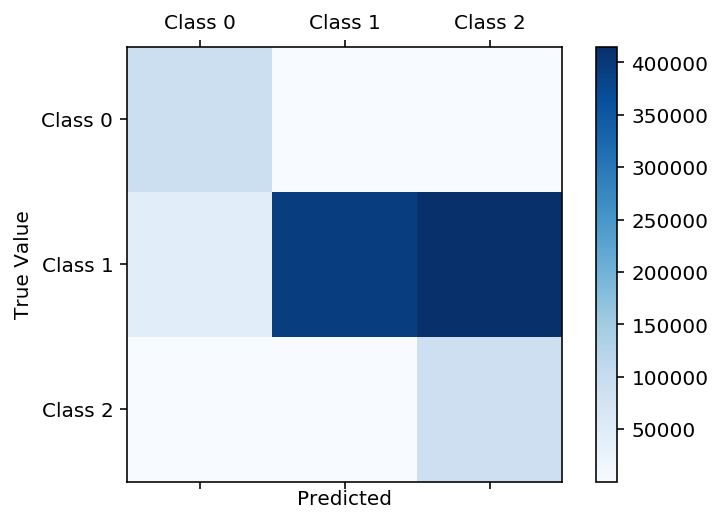

In [68]:
gaussiannb(X_train, y_train, X_test, y_test, X_test0, y_test0)

Iteration 1, loss = 0.07508723
Iteration 2, loss = 0.02624347
Iteration 3, loss = 0.02557121
Iteration 4, loss = 0.02522166
Iteration 5, loss = 0.02489179
Iteration 6, loss = 0.02455917
Iteration 7, loss = 0.02494623
Iteration 8, loss = 0.02510527
Iteration 9, loss = 0.02432468
Iteration 10, loss = 0.02420365
Iteration 11, loss = 0.02470504
Iteration 12, loss = 0.02427967
Iteration 13, loss = 0.02404248
Iteration 14, loss = 0.02440105
Iteration 15, loss = 0.02414154
Iteration 16, loss = 0.02385280
Iteration 17, loss = 0.02410885
Iteration 18, loss = 0.02399180
Iteration 19, loss = 0.02399512
Iteration 20, loss = 0.02372311
Iteration 21, loss = 0.02361378
Iteration 22, loss = 0.02372582
Iteration 23, loss = 0.02393334
Iteration 24, loss = 0.02369052
Iteration 25, loss = 0.02366176
Iteration 26, loss = 0.02356333
Iteration 27, loss = 0.02361211
Iteration 28, loss = 0.02343271
Iteration 29, loss = 0.02348603
Iteration 30, loss = 0.02337404
Iteration 31, loss = 0.02342849
Iteration 32, los

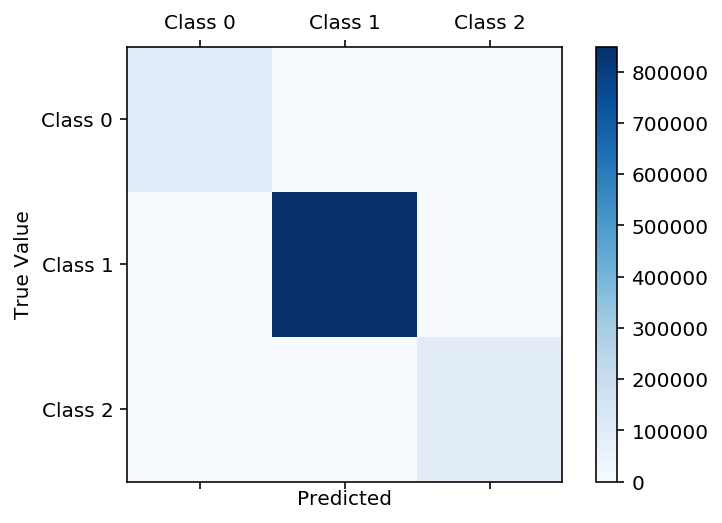

In [69]:
NeuralNetwork(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    4.1s remaining:   12.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    5.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   14.8s remaining:   44.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   23.3s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.6s remaining:   10.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    5.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   10.1s remaining:   30.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   15.8s finished


elapsed time = 50.32
ACCURACY Test:  0.9855092704396294
ACCURACY Test0:  0.981192798954038
ACCURACY Train:  0.9813554082775124

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.90      0.99      0.94     91009
     Class 1       1.00      0.98      0.99    851802
     Class 2       0.96      1.00      0.98     88262

    accuracy                           0.99   1031073
   macro avg       0.95      0.99      0.97   1031073
weighted avg       0.99      0.99      0.99   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.88      0.99      0.93     15125
     Class 1       1.00      0.98      0.99    140214
     Class 2       0.95      0.99      0.97     13692

    accuracy                           0.98    169031
   macro avg       0.94      0.98      0.96    169031
weighted avg       0.98      0.98      0.

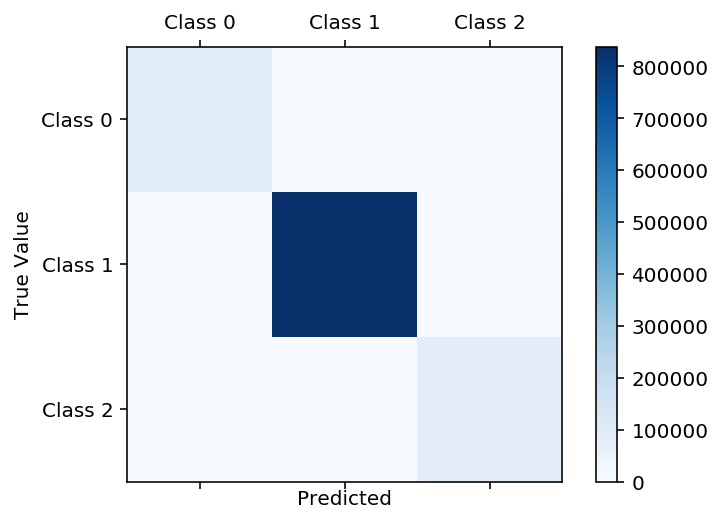

In [67]:
BaggingSVM(X_train, y_train, X_test, y_test, X_test0, y_test0)

#### Findings:

These additional features really change the performance. 

Decision Tree and Random Forest were really good to begin with, so their improvement is minimal. They are still the top performers though.

Logistic Regression suddenly performs very well. This dummy variables were fundamental to get the algorithms to identify 'Victim' and 'Attacker'. The same happens to SVM.

Neural Network does well, and is super consistent going from the train set to the test set.

Naive Bayes is the most surprising. Although still not good compared to the other algorithms, its improvement is astonishing. 

## c) IP Category

Using the function in the following cell, we convert "Src IP Address" into a categorical variable, and then we append it to the copy of the dataset created. Then we convert it to dummies just like we did for Flags, as well as perform the usual steps (splitting, scaling, reassignment).

In [71]:
def get_IP_category(ip_addr):
    if ip_addr == 'DNS':
        return 'DNS'
    elif ip_addr == 'EXT_SERVER':
        return 'EXT_SERVER'
    elif len(ip_addr.split('.')) == 4:
        return 'private'
    elif len(ip_addr.split('_')) == 2:
        return 'public'
    else:
        return '-'

In [72]:
train_IP= train_df_b.copy()
test_IP= test_df_b.copy()

In [73]:
list_train_IP= train_IP['Src IP Addr'].tolist()
list_test_IP= test_IP['Src IP Addr'].tolist()

In [74]:
len(list_train_IP)

845152

In [75]:
l = []
for i in range(len(list_train_IP)):
    l.append(get_IP_category(list_train_IP[i]))
p=[]
for i in range(len(list_test_IP)):
    p.append(get_IP_category(list_test_IP[i]))

In [76]:
train_IP['IP_category']=l
test_IP['IP_category']=p

In [77]:
test_IP

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Flags,Tos,class,attackType,attackID,attackDescription,Bytes,IP_category
0,12,2017-03-22 00:00:11.767,0.004,TCP,192.168.220.5,55126,192.168.100.5,445.0,2,.AP...,0,normal,---,---,---,174.0,private
1,11,2017-03-22 00:00:11.768,0.000,TCP,192.168.100.5,445,192.168.220.5,55126.0,1,.AP...,0,normal,---,---,---,108.0,private
2,29,2017-03-22 00:00:27.207,0.232,TCP,192.168.200.8,58749,EXT_SERVER,8082.0,2,.AP...,0,normal,---,---,---,319.0,private
3,36,2017-03-22 00:00:32.830,0.000,UDP,192.168.210.5,50947,DNS,53.0,1,......,0,normal,---,---,---,81.0,private
4,51,2017-03-22 00:00:46.964,0.000,TCP,10179_174,443,192.168.210.5,51433.0,1,.A....,32,normal,---,---,---,54.0,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031068,10310702,2017-03-28 23:57:37.411,0.003,TCP,192.168.220.8,56102,192.168.100.5,445.0,2,.AP...,0,normal,---,---,---,174.0,private
1031069,10310704,2017-03-28 23:57:37.974,0.000,UDP,192.168.220.14,137,192.168.220.255,137.0,1,......,0,normal,---,---,---,92.0,private
1031070,10310708,2017-03-28 23:57:48.190,0.000,TCP,192.168.100.5,445,192.168.220.14,42935.0,1,.AP...,0,normal,---,---,---,108.0,private
1031071,10310722,2017-03-28 23:58:03.485,1.542,TCP,192.168.100.5,445,192.168.220.16,55756.0,2,.AP...,0,normal,---,---,---,178.0,private


In [78]:
train_IP.columns

Index(['Unnamed: 0', 'Date first seen', 'Duration', 'Proto', 'Src IP Addr',
       'Src Pt', 'Dst IP Addr', 'Dst Pt', 'Packets', 'Flags', 'Tos', 'class',
       'attackType', 'attackID', 'attackDescription', 'Bytes', 'IP_category'],
      dtype='object')

In [79]:
# Split dataset up into train and test sets
X_train, X_test0, y_train, y_test0 = train_test_split(
    train_IP.drop(['class'], axis=1), 
   train_IP['class'], 
    test_size=0.2
)


X_test = test_IP.drop('class', axis=1)
y_test=test_IP['class']

In [80]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train[numeric_cols])

X_train[numeric_cols] = standard_scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = standard_scaler.transform(X_test[numeric_cols])
X_test0[numeric_cols] = standard_scaler.transform(X_test0[numeric_cols])

In [81]:
X_train= X_train[['Duration','Packets','Bytes','IP_category']]
X_test= X_test[['Duration','Packets','Bytes','IP_category']]
X_test0= X_test0[['Duration','Packets','Bytes','IP_category']]

In [82]:
X_train = pd.get_dummies(X_train, columns=['IP_category'])
X_test = pd.get_dummies(X_test, columns=['IP_category'])
X_test0 = pd.get_dummies(X_test0, columns=['IP_category'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.9s finished


elapsed time = 21.05
ACCURACY Test:  0.8261257932270557
ACCURACY Test0:  0.8294632345546084
ACCURACY Train:  0.8287037379403982

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     91009
     Class 1       0.83      1.00      0.90    851802
     Class 2       0.00      0.00      0.00     88262

    accuracy                           0.83   1031073
   macro avg       0.28      0.33      0.30   1031073
weighted avg       0.68      0.83      0.75   1031073


--------------Classification Report Test0-------------------



/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     14995
     Class 1       0.83      1.00      0.91    140206
     Class 2       0.00      0.00      0.00     13830

    accuracy                           0.83    169031
   macro avg       0.28      0.33      0.30    169031
weighted avg       0.69      0.83      0.75    169031


--------------Classification Report Train-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     60129
     Class 1       0.83      1.00      0.91    560307
     Class 2       0.00      0.00      0.00     55685

    accuracy                           0.83    676121
   macro avg       0.28      0.33      0.30    676121
weighted avg       0.69      0.83      0.75    676121



--------------CONFUSION-MATRIX-------------------

Confusion matrix:
 [[     0  91009      0]
 [     3 851796      3]
 [     0  88262      0]]


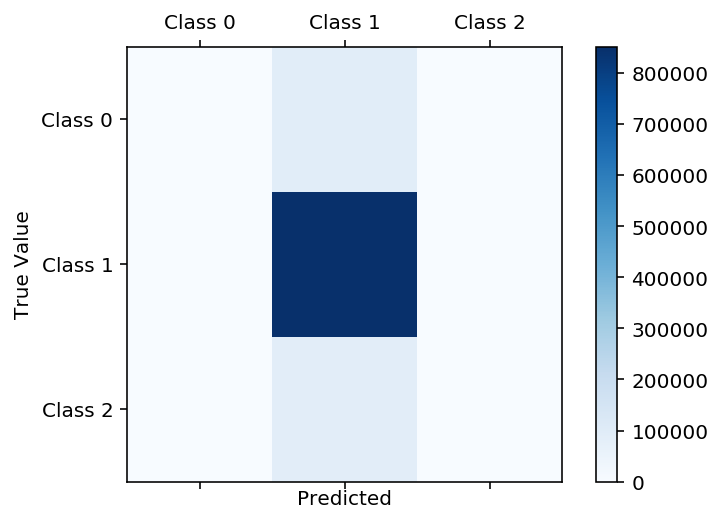

In [80]:
logistic_reg(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 1.95
ACCURACY Test:  0.9957810940641448
ACCURACY Test0:  0.9911850488963563
ACCURACY Train:  0.9912027580862005

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       1.00      0.96      0.98     88262

    accuracy                           1.00   1031073
   macro avg       1.00      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     14995
     Class 1       0.99      1.00      0.99    140206
     Class 2       1.00      0.90      0.95     13830

    accuracy                           0.99    169031
   macro avg       0.99      0.96      0.98    169031
weighted avg       0.99      0.99      0.

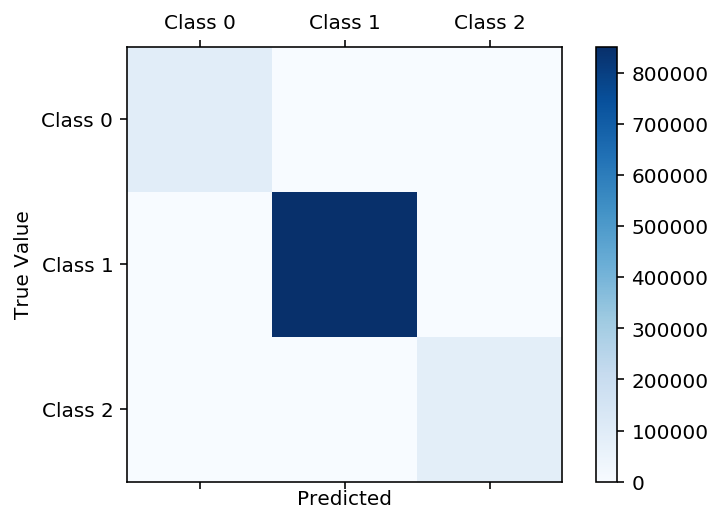

In [81]:
decision_tree(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished


elapsed time = 13.32
ACCURACY Test:  0.9958761406806308
ACCURACY Test0:  0.9912856221639817
ACCURACY Train:  0.9912012790609965

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       1.00      0.96      0.98     88262

    accuracy                           1.00   1031073
   macro avg       1.00      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99     14995
     Class 1       0.99      1.00      0.99    140206
     Class 2       1.00      0.90      0.95     13830

    accuracy                           0.99    169031
   macro avg       1.00      0.96      0.98    169031
weighted avg       0.99      0.99      0

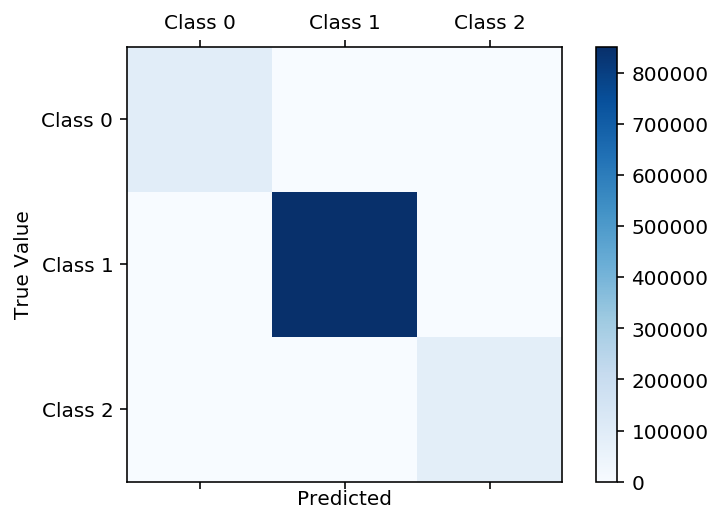

In [82]:
randomforest(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 1.58
ACCURACY Test:  0.5735355304619556
ACCURACY Test0:  0.548236713975543
ACCURACY Train:  0.5471417098418774

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.46      0.94      0.62     91009
     Class 1       1.00      0.51      0.68    851802
     Class 2       0.17      0.81      0.29     88262

    accuracy                           0.57   1031073
   macro avg       0.55      0.75      0.53   1031073
weighted avg       0.88      0.57      0.64   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.41      0.84      0.55     14995
     Class 1       1.00      0.51      0.68    140206
     Class 2       0.12      0.60      0.21     13830

    accuracy                           0.55    169031
   macro avg       0.51      0.65      0.48    169031
weighted avg       0.88      0.55      0.6

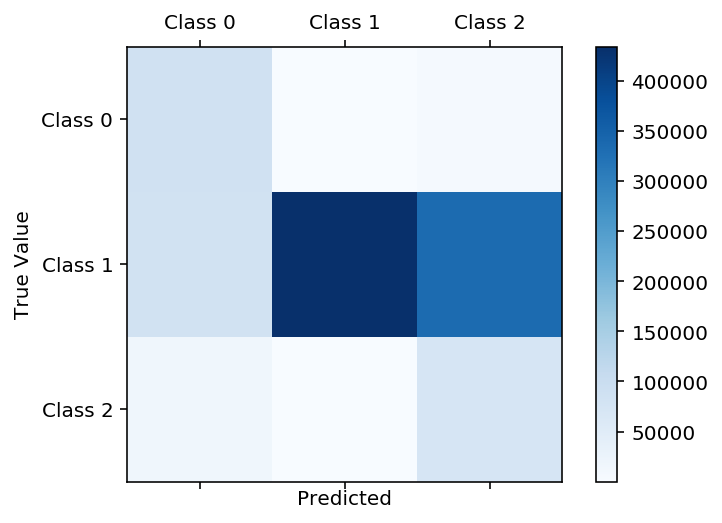

In [83]:
gaussiannb(X_train, y_train, X_test, y_test, X_test0, y_test0)

Iteration 1, loss = inf
Iteration 2, loss = 0.31107290
Iteration 3, loss = 0.23050195
Iteration 4, loss = 0.21724442
Iteration 5, loss = 0.20493373
Iteration 6, loss = 0.19028539
Iteration 7, loss = 0.16353657
Iteration 8, loss = 0.14798180
Iteration 9, loss = 0.14037461
Iteration 10, loss = 0.13722555
Iteration 11, loss = 0.12711883
Iteration 12, loss = 0.11969533
Iteration 13, loss = 0.11742986
Iteration 14, loss = 0.11744140
Iteration 15, loss = 0.11625665
Iteration 16, loss = 0.11643165
Iteration 17, loss = 0.11579901
Iteration 18, loss = 0.11566697
Iteration 19, loss = 0.11530621
Iteration 20, loss = 0.11544828
Iteration 21, loss = 0.11481927
Iteration 22, loss = 0.11509822
Iteration 23, loss = 0.11738163
Iteration 24, loss = 0.11386049
Iteration 25, loss = 0.11396248
Iteration 26, loss = 0.11426667
Iteration 27, loss = 0.11400258
Iteration 28, loss = 0.11398707
Iteration 29, loss = 0.11353044
Iteration 30, loss = 0.11339258
Iteration 31, loss = 0.11366563
Iteration 32, loss = 0.1

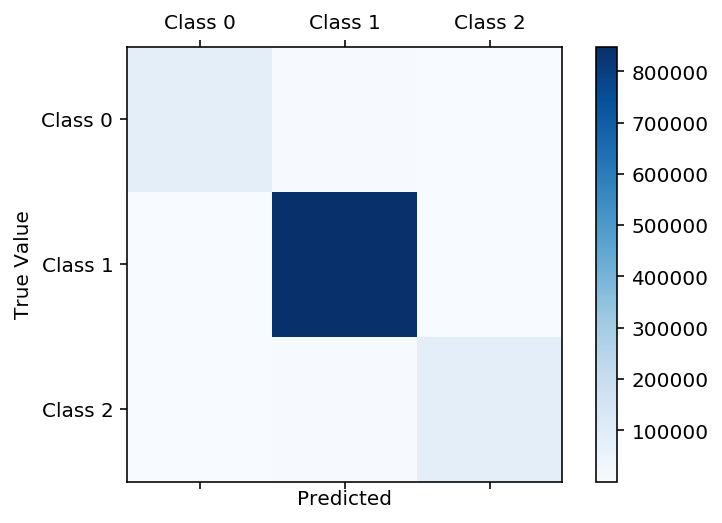

In [84]:
NeuralNetwork(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   17.1s remaining:   51.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   23.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  1.3min remaining:  4.0min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  2.0min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   12.7s remaining:   38.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   19.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   47.5s remaining:  2.4min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  1.2min finished


elapsed time = 233.10
ACCURACY Test:  0.8261277329539227
ACCURACY Test0:  0.8294691506291745
ACCURACY Train:  0.8287037379403982

--------------Classification Report Test-------------------



/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     91009
     Class 1       0.83      1.00      0.90    851802
     Class 2       0.00      0.00      0.00     88262

    accuracy                           0.83   1031073
   macro avg       0.28      0.33      0.30   1031073
weighted avg       0.68      0.83      0.75   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     14995
     Class 1       0.83      1.00      0.91    140206
     Class 2       0.00      0.00      0.00     13830

    accuracy                           0.83    169031
   macro avg       0.28      0.33      0.30    169031
weighted avg       0.69      0.83      0.75    169031


--------------Classification Report Train-------------------

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00     60129
   

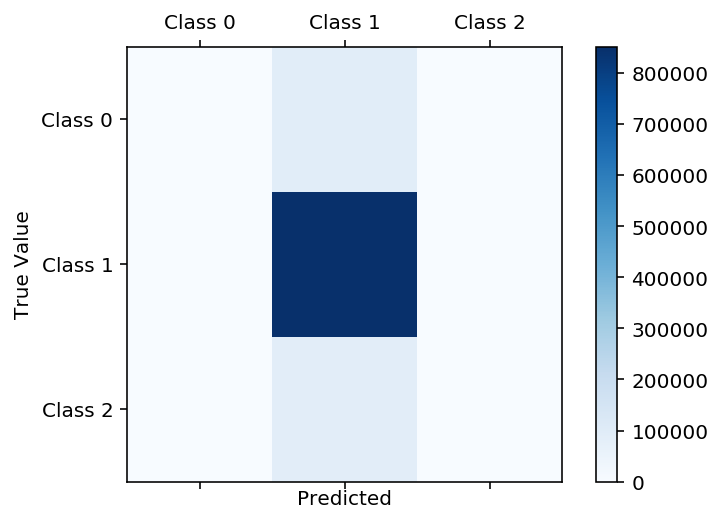

In [85]:
BaggingSVM(X_train, y_train, X_test, y_test, X_test0, y_test0)

#### Findings

Adding the IP Category doesn't improve the performance of the models, they behave just the same way they did using exclusively numerical features to predict the target variable.

## d) All 3 features

From what we have seen above the results are probably going to improve thanks to the "Flags" features, so we expect similar results to those ones.

In [83]:
train_all= train_df_b.copy()
test_all= test_df_b.copy()

In [84]:
# adding time: day, hour, friday, 2pm

In [85]:
times = ['day','hour','friday','2pm']
time_train = train_date[times]
time_test = test_date[times]

In [86]:
time_train

,day,hour,friday,2pm
0,2,0,0,0
1,2,0,0,0
2,2,0,0,0
3,2,0,0,0
4,2,0,0,0
...,...,...,...,...
845147,1,23,0,0
845148,1,23,0,0
845149,1,23,0,0
845150,1,23,0,0


In [87]:
# adding IP category

In [88]:
IP_train = train_IP['IP_category']
IP_test = test_IP['IP_category']

In [89]:
# adding Flags

In [90]:
flags_train= train_flags[['Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6']]
flags_test= test_flags[['Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6']]

In [91]:
flags_train

,Flag_1,Flag_2,Flag_3,Flag_4,Flag_5,Flag_6
0,.,A,P,.,S,.
1,.,A,P,.,S,.
2,.,A,P,.,.,.
3,.,A,P,.,.,.
4,.,A,P,.,.,.
...,...,...,...,...,...,...
845147,.,A,P,.,.,.
845148,.,A,.,.,.,.
845149,.,A,.,.,.,.
845150,.,A,P,.,.,.


In [92]:
train_all = pd.concat([train_all, time_train, IP_train, flags_train], axis=1, sort=False)

In [93]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845152 entries, 0 to 845151
Data columns (total 27 columns):
Unnamed: 0           845152 non-null int64
Date first seen      845152 non-null object
Duration             845152 non-null float64
Proto                845152 non-null object
Src IP Addr          845152 non-null object
Src Pt               845152 non-null int64
Dst IP Addr          845152 non-null object
Dst Pt               845152 non-null float64
Packets              845152 non-null int64
Flags                845152 non-null object
Tos                  845152 non-null int64
class                845152 non-null object
attackType           845152 non-null object
attackID             845152 non-null object
attackDescription    845152 non-null object
Bytes                845152 non-null float64
day                  845152 non-null int64
hour                 845152 non-null int64
friday               845152 non-null int64
2pm                  845152 non-null int64
IP_category   

In [94]:
test_all = pd.concat([test_all, time_test, IP_test, flags_test], axis=1, sort = False)

In [95]:
test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031073 entries, 0 to 1031072
Data columns (total 27 columns):
Unnamed: 0           1031073 non-null int64
Date first seen      1031073 non-null object
Duration             1031073 non-null float64
Proto                1031073 non-null object
Src IP Addr          1031073 non-null object
Src Pt               1031073 non-null int64
Dst IP Addr          1031073 non-null object
Dst Pt               1031073 non-null float64
Packets              1031073 non-null int64
Flags                1031073 non-null object
Tos                  1031073 non-null int64
class                1031073 non-null object
attackType           1031073 non-null object
attackID             1031073 non-null object
attackDescription    1031073 non-null object
Bytes                1031073 non-null float64
day                  1031073 non-null int64
hour                 1031073 non-null int64
friday               1031073 non-null int64
2pm                  1031073 non-nul

In [96]:

# Split dataset up into train and test sets
X_train, X_test0, y_train, y_test0 = train_test_split(
    train_all.drop(['class'], axis=1), 
   train_all['class'], 
    test_size=0.2
)


X_test = test_all.drop('class', axis=1)
y_test=test_all['class']

In [97]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train[numeric_cols])

X_train[numeric_cols] = standard_scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = standard_scaler.transform(X_test[numeric_cols])
X_test0[numeric_cols] = standard_scaler.transform(X_test0[numeric_cols])

In [98]:
X_train= X_train[['Duration','Packets','Bytes','day', 'hour','friday', '2pm', 'IP_category', 'Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6']]
X_test= X_test[['Duration','Packets','Bytes','day', 'hour','friday', '2pm', 'IP_category', 'Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6']]
X_test0= X_test0[['Duration','Packets','Bytes','day', 'hour','friday', '2pm', 'IP_category', 'Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6']]

In [99]:
X_train = pd.get_dummies(X_train, columns=['IP_category', 'Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6'])
X_test = pd.get_dummies(X_test, columns=['IP_category', 'Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6'])
X_test0 = pd.get_dummies(X_test0, columns=['IP_category', 'Flag_1', 'Flag_2', 'Flag_3', 'Flag_4','Flag_5', 'Flag_6'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.3min finished


elapsed time = 78.33
ACCURACY Test:  0.9936813397305525
ACCURACY Test0:  0.9919008939188669
ACCURACY Train:  0.9915518080343607

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.96      0.99      0.98     91009
     Class 1       1.00      0.99      1.00    851802
     Class 2       0.98      1.00      0.99     88262

    accuracy                           0.99   1031073
   macro avg       0.98      0.99      0.99   1031073
weighted avg       0.99      0.99      0.99   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97     15089
     Class 1       1.00      0.99      1.00    139936
     Class 2       0.97      0.99      0.98     14006

    accuracy                           0.99    169031
   macro avg       0.98      0.99      0.98    169031
weighted avg       0.99      0.99      0

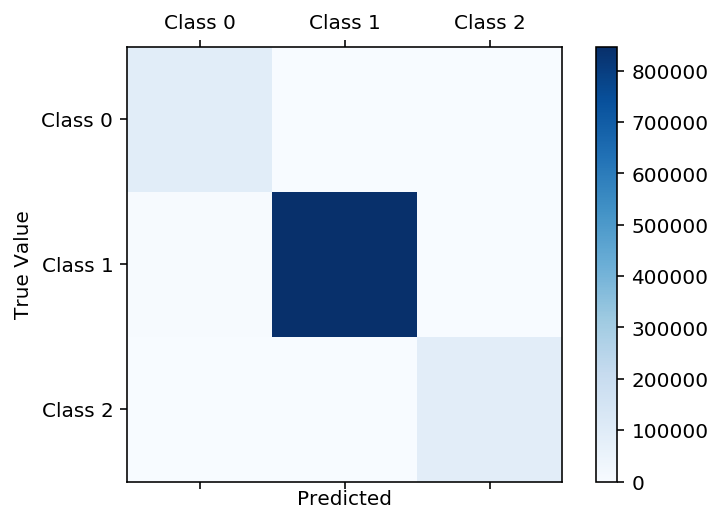

In [103]:
logistic_reg(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 3.11
ACCURACY Test:  0.9971049576509132
ACCURACY Test0:  0.9983612473451615
ACCURACY Train:  0.9986777514675628

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.99      0.99     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       0.99      0.98      0.99     88262

    accuracy                           1.00   1031073
   macro avg       1.00      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     15089
     Class 1       1.00      1.00      1.00    139936
     Class 2       0.99      1.00      0.99     14006

    accuracy                           1.00    169031
   macro avg       1.00      1.00      1.00    169031
weighted avg       1.00      1.00      1.

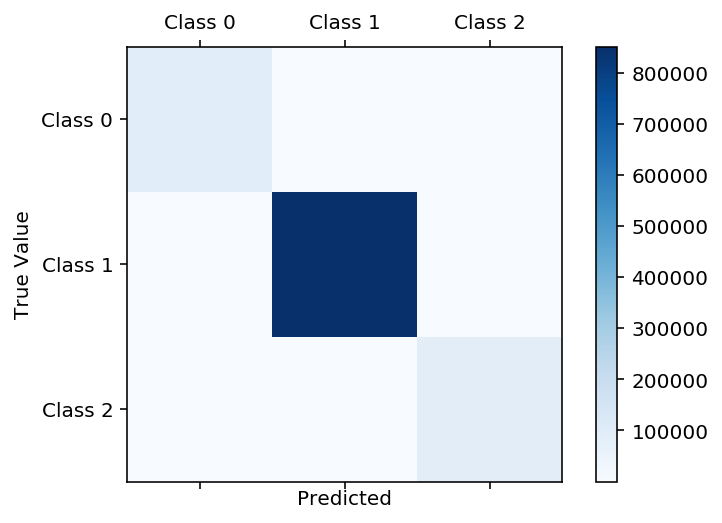

In [104]:
decision_tree(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


elapsed time = 18.38
ACCURACY Test:  0.9965618341281364
ACCURACY Test0:  0.9984677366873532
ACCURACY Train:  0.9986777514675628

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       0.99      0.98      0.99     88262

    accuracy                           1.00   1031073
   macro avg       1.00      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     15089
     Class 1       1.00      1.00      1.00    139936
     Class 2       0.99      1.00      0.99     14006

    accuracy                           1.00    169031
   macro avg       1.00      1.00      1.00    169031
weighted avg       1.00      1.00      1

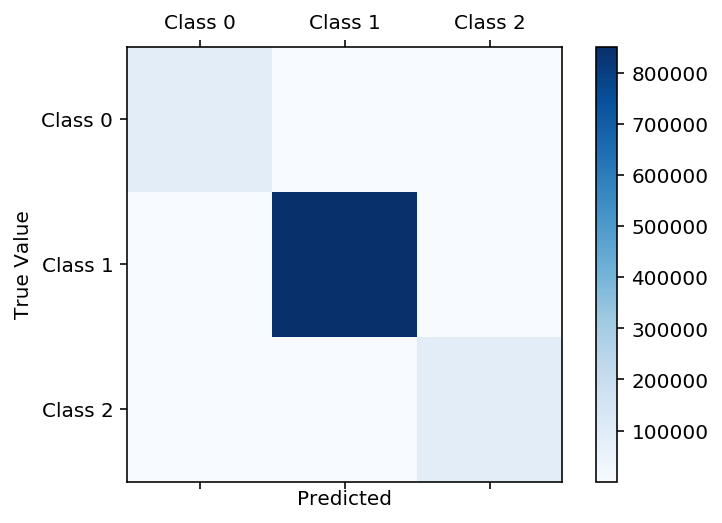

In [105]:
randomforest(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 2.73
ACCURACY Test:  0.7597570686071694
ACCURACY Test0:  0.7517141826055576
ACCURACY Train:  0.7509587780885374

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.70      0.99      0.82     91009
     Class 1       1.00      0.71      0.83    851802
     Class 2       0.30      1.00      0.46     88262

    accuracy                           0.76   1031073
   macro avg       0.67      0.90      0.70   1031073
weighted avg       0.91      0.76      0.80   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.70      0.98      0.82     15089
     Class 1       1.00      0.70      0.82    139936
     Class 2       0.28      1.00      0.44     14006

    accuracy                           0.75    169031
   macro avg       0.66      0.89      0.69    169031
weighted avg       0.91      0.75      0.

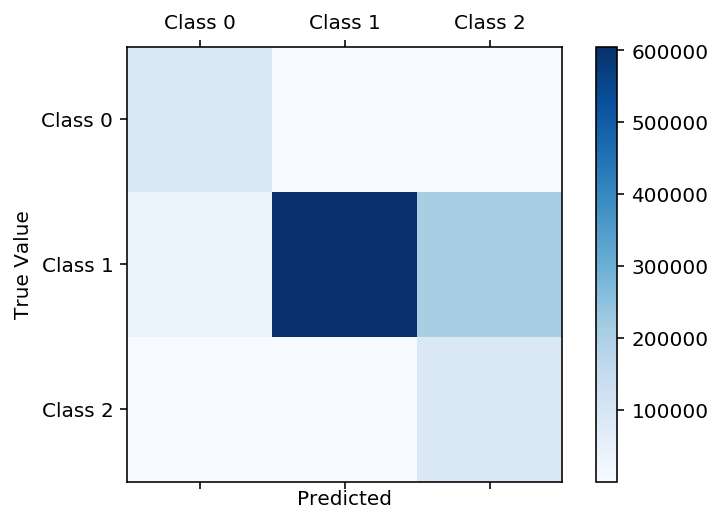

In [106]:
gaussiannb(X_train, y_train, X_test, y_test, X_test0, y_test0)

Iteration 1, loss = 0.11083706
Iteration 2, loss = 0.02461218
Iteration 3, loss = 0.02105809
Iteration 4, loss = 0.01993077
Iteration 5, loss = 0.01914636
Iteration 6, loss = 0.01882219
Iteration 7, loss = 0.01843052
Iteration 8, loss = 0.01823231
Iteration 9, loss = 0.01801729
Iteration 10, loss = 0.01810379
Iteration 11, loss = 0.01759918
Iteration 12, loss = 0.01748368
Iteration 13, loss = 0.01728857
Iteration 14, loss = 0.01715610
Iteration 15, loss = 0.01695101
Iteration 16, loss = 0.01700695
Iteration 17, loss = 0.01677983
Iteration 18, loss = 0.01671803
Iteration 19, loss = 0.01655908
Iteration 20, loss = 0.01656654
Iteration 21, loss = 0.01667592
Iteration 22, loss = 0.01646806
Iteration 23, loss = 0.01632031
Iteration 24, loss = 0.01635330
Iteration 25, loss = 0.01621758
Iteration 26, loss = 0.01654902
Iteration 27, loss = 0.01624619
Iteration 28, loss = 0.01612972
Iteration 29, loss = 0.01606079
Iteration 30, loss = 0.01599631
Iteration 31, loss = 0.01579192
Iteration 32, los

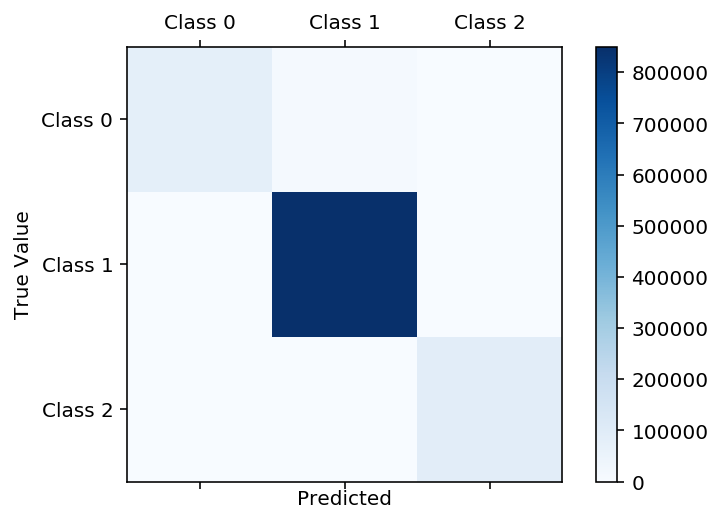

In [107]:
NeuralNetwork(X_train, y_train, X_test, y_test, X_test0, y_test0)

In the next cell we will not run the Begging SVM algorithm since our new features added would take too long to be trained on this computer

In [ ]:
BaggingSVM(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   10.3s remaining:   30.9s


#### Findings

This additional features improve the predictions of all the algorithms (except BaggingSVM, which would take too long to run - this algorithm is definitely not reccommended compared to the others).

It is interesting to see how the three separate improvements have a smaller impact than the three of them combined. 

Naive Bayes reaches now a high accuracy. Although the other algorithms still outperform it, it is interesting to see how much it was able to improve its predictions from the first results we had.

## e) Counting total requests in a given amount of seconds

In [107]:
train_count = train_date.copy()
test_count = test_date.copy()

In [108]:
train_count['Cum Count Src IP Addr (10seconds)'] = train_count.groupby(['Src IP Addr', pd.Grouper(freq='10S',
key='Date first seen')]).cumcount()

test_count['Cum Count Src IP Addr (10seconds)'] = test_count.groupby(['Src IP Addr', pd.Grouper(freq='10S',
key='Date first seen')]).cumcount()

In [109]:
train_count

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Flags,...,class,attackType,attackID,attackDescription,Bytes,day,hour,friday,2pm,Cum Count Src IP Addr (10seconds)
0,23,2017-03-15 00:01:17.728,0.047,TCP,192.168.220.16,45586,10000_35,443.0,5,.AP.S.,...,normal,---,---,---,906.0,2,0,0,0,0
1,36,2017-03-15 00:01:18.457,0.170,TCP,10003_195,80,192.168.220.16,48286.0,3,.AP.S.,...,normal,---,---,---,908.0,2,0,0,0,0
2,30,2017-03-15 00:01:18.511,0.003,TCP,10002_113,443,192.168.220.16,49062.0,2,.AP...,...,normal,---,---,---,1089.0,2,0,0,0,0
3,46,2017-03-15 00:01:22.400,0.000,TCP,EXT_SERVER,8082,192.168.220.15,37039.0,1,.AP...,...,normal,---,---,---,212.0,2,0,0,0,0
4,51,2017-03-15 00:01:24.152,0.266,TCP,192.168.200.9,52290,EXT_SERVER,8082.0,2,.AP...,...,normal,---,---,---,319.0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845147,8451392,2017-03-21 23:58:23.416,0.000,TCP,EXT_SERVER,8082,192.168.200.8,58749.0,1,.AP...,...,normal,---,---,---,200.0,1,23,0,0,0
845148,8451435,2017-03-21 23:58:51.041,0.000,TCP,11015_151,443,192.168.220.16,52284.0,1,.A....,...,normal,---,---,---,66.0,1,23,0,0,0
845149,8451463,2017-03-21 23:59:16.509,0.000,TCP,10179_174,443,192.168.210.5,51433.0,1,.A....,...,normal,---,---,---,54.0,1,23,0,0,0
845150,8451472,2017-03-21 23:59:17.423,0.000,TCP,192.168.100.5,445,192.168.220.7,41802.0,1,.AP...,...,normal,---,---,---,108.0,1,23,0,0,0


In [110]:
# Split dataset up into train and test sets
X_train, X_test0, y_train, y_test0 = train_test_split(
    train_count.drop(['class'], axis=1), 
   train_count['class'], 
    test_size=0.2
)


X_test = test_count.drop('class', axis=1)
y_test=test_count['class']

In [111]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train[numeric_cols])

X_train[numeric_cols] = standard_scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = standard_scaler.transform(X_test[numeric_cols])
X_test0[numeric_cols] = standard_scaler.transform(X_test0[numeric_cols])

In [112]:
X_train= X_train[['Duration','Packets','Bytes','Cum Count Src IP Addr (10seconds)']]
X_test= X_test[['Duration','Packets','Bytes','Cum Count Src IP Addr (10seconds)']]
X_test0= X_test0[['Duration','Packets','Bytes','Cum Count Src IP Addr (10seconds)']]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.3s finished


elapsed time = 19.51
ACCURACY Test:  0.9056565345033766
ACCURACY Test0:  0.900822925972159
ACCURACY Train:  0.9011005426543474

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.51      0.63      0.57     91009
     Class 1       0.98      1.00      0.99    851802
     Class 2       0.53      0.29      0.37     88262

    accuracy                           0.91   1031073
   macro avg       0.67      0.64      0.64   1031073
weighted avg       0.90      0.91      0.90   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.52      0.63      0.57     15063
     Class 1       0.96      1.00      0.98    140149
     Class 2       0.53      0.20      0.29     13819

    accuracy                           0.90    169031
   macro avg       0.67      0.61      0.61    169031
weighted avg       0.89      0.90      0.

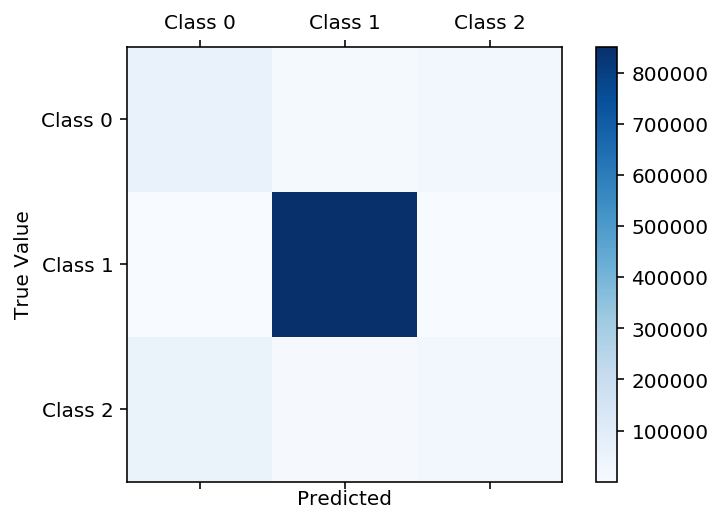

In [113]:
logistic_reg(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 2.34
ACCURACY Test:  0.9953262281138193
ACCURACY Test0:  0.9902503091148961
ACCURACY Train:  0.9907102426932457

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       1.00      0.96      0.98     88262

    accuracy                           1.00   1031073
   macro avg       0.99      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     15063
     Class 1       0.99      1.00      0.99    140149
     Class 2       1.00      0.90      0.95     13819

    accuracy                           0.99    169031
   macro avg       0.99      0.96      0.98    169031
weighted avg       0.99      0.99      0.

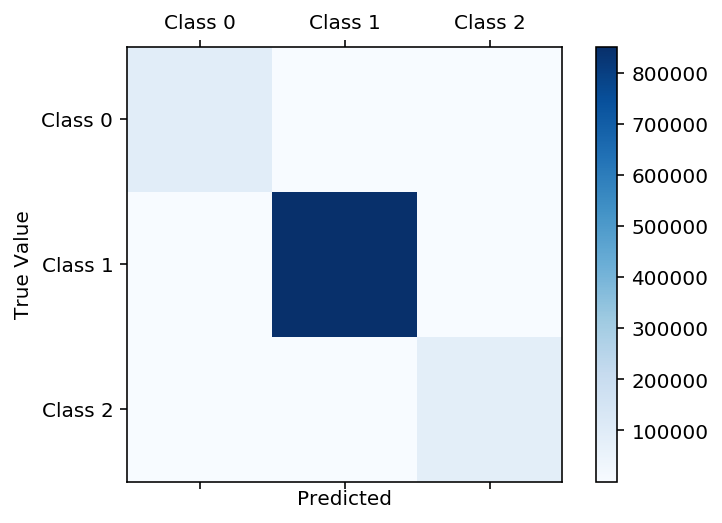

In [114]:
decision_tree(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.6s finished


elapsed time = 22.39
ACCURACY Test:  0.9955890611043059
ACCURACY Test0:  0.9904869520975442
ACCURACY Train:  0.9907102426932457

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     91009
     Class 1       1.00      1.00      1.00    851802
     Class 2       1.00      0.96      0.98     88262

    accuracy                           1.00   1031073
   macro avg       1.00      0.99      0.99   1031073
weighted avg       1.00      1.00      1.00   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99     15063
     Class 1       0.99      1.00      0.99    140149
     Class 2       1.00      0.90      0.95     13819

    accuracy                           0.99    169031
   macro avg       0.99      0.96      0.98    169031
weighted avg       0.99      0.99      0

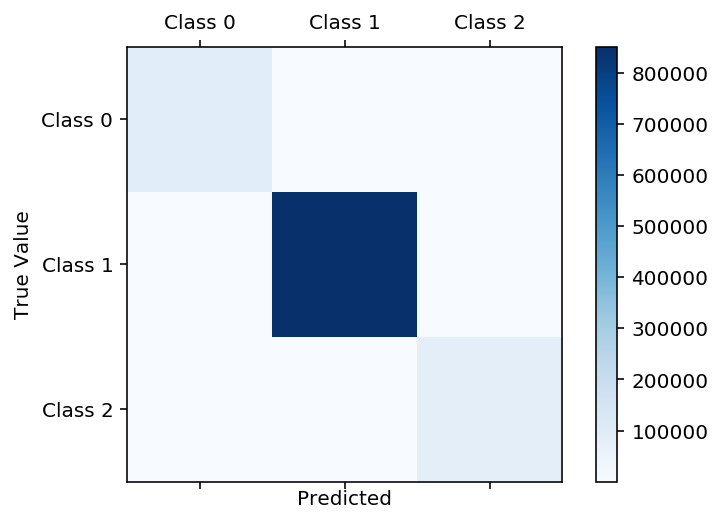

In [115]:
randomforest(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 1.39
ACCURACY Test:  0.14301509204488916
ACCURACY Test0:  0.14702628511929763
ACCURACY Train:  0.14658175089961709

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.10      1.00      0.19     91009
     Class 1       1.00      0.07      0.12    851802
     Class 2       0.00      0.00      0.00     88262

    accuracy                           0.14   1031073
   macro avg       0.37      0.35      0.10   1031073
weighted avg       0.83      0.14      0.12   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.10      1.00      0.19     15063
     Class 1       1.00      0.07      0.13    140149
     Class 2       0.00      0.00      0.00     13819

    accuracy                           0.15    169031
   macro avg       0.37      0.36      0.11    169031
weighted avg       0.84      0.15     

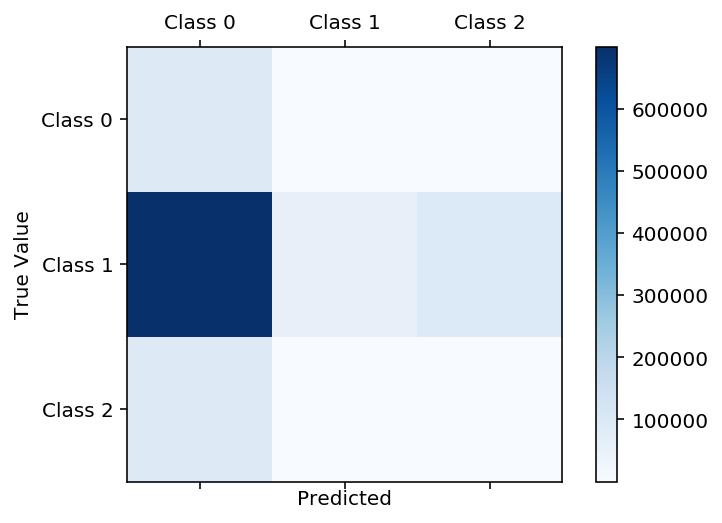

In [116]:
gaussiannb(X_train, y_train, X_test, y_test, X_test0, y_test0)

Iteration 1, loss = 0.31715676
Iteration 2, loss = 0.24675828
Iteration 3, loss = 0.24378056
Iteration 4, loss = 0.24111684
Iteration 5, loss = 0.23909258
Iteration 6, loss = 0.23780119
Iteration 7, loss = 0.23720081
Iteration 8, loss = 0.23662316
Iteration 9, loss = 0.23639399
Iteration 10, loss = 0.23580206
Iteration 11, loss = 0.23550204
Iteration 12, loss = 0.23507993
Iteration 13, loss = 0.23488566
Iteration 14, loss = 0.23490028
Iteration 15, loss = 0.23473500
Iteration 16, loss = 0.23473722
Iteration 17, loss = 0.23463185
Iteration 18, loss = 0.23409307
Iteration 19, loss = 0.23403812
Iteration 20, loss = 0.23388779
Iteration 21, loss = 0.23368581
Iteration 22, loss = 0.23340310
Iteration 23, loss = 0.23321471
Iteration 24, loss = 0.23303469
Iteration 25, loss = 0.23262325
Iteration 26, loss = 0.23202181
Iteration 27, loss = 0.23180907
Iteration 28, loss = 0.23087840
Iteration 29, loss = 0.22959480
Iteration 30, loss = 0.22885398
Iteration 31, loss = 0.22728904
Iteration 32, los

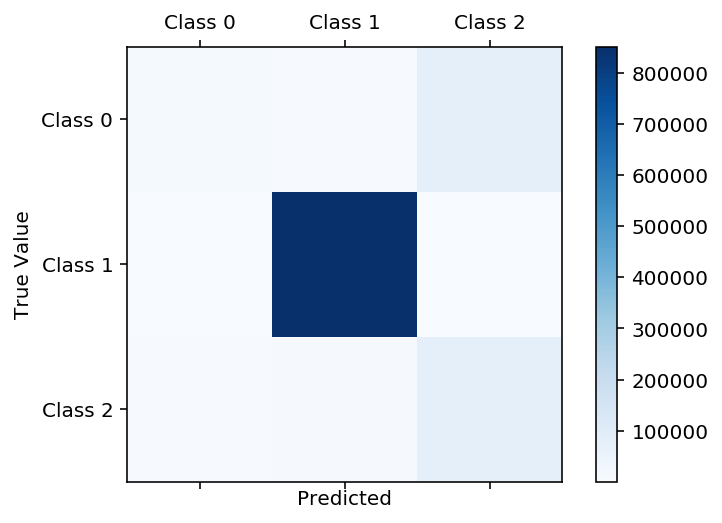

In [117]:
NeuralNetwork(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  4.2min remaining: 12.7min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  9.7min finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   38.5s remaining:  1.9min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   57.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    5.6s remaining:   16.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    9.1s finished
[Parallel(n_jobs=8)]: 

elapsed time = 684.70
ACCURACY Test:  0.9023910043226814
ACCURACY Test0:  0.8975513367370482
ACCURACY Train:  0.8979443028688652

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.50      0.43      0.46     91009
     Class 1       0.98      1.00      0.99    851802
     Class 2       0.50      0.45      0.47     88262

    accuracy                           0.90   1031073
   macro avg       0.66      0.63      0.64   1031073
weighted avg       0.89      0.90      0.90   1031073


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.51      0.43      0.47     15063
     Class 1       0.96      1.00      0.98    140149
     Class 2       0.49      0.37      0.42     13819

    accuracy                           0.90    169031
   macro avg       0.65      0.60      0.62    169031
weighted avg       0.88      0.90      

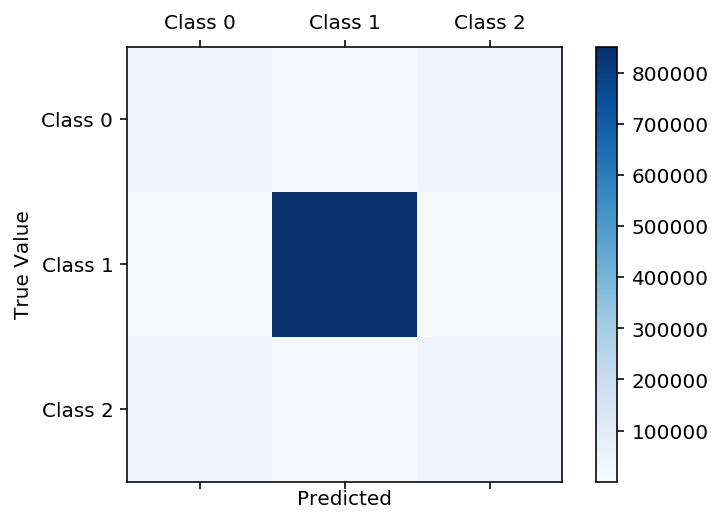

In [118]:
BaggingSVM(X_train, y_train, X_test, y_test, X_test0, y_test0)

#### Findings

This feature improves the performance of logistic regression, but decreases further the already poor predictions of Naive Bayes. 

It would be interesting to see how it affects the other algorithms if added to the model that contains all the other features, because it seems to have some improvement capabilities overall.

# 3) Clustering

## a) Data Preprocessing

In [119]:
from sklearn.cluster import (
    KMeans, 
    AgglomerativeClustering
)

from sklearn.metrics import (
    homogeneity_score,
    completeness_score,
    v_measure_score,
    davies_bouldin_score,
)

Creating complete Data Frame out of Week 1 and Week 2

In [120]:
complete_data = pd.concat([train_df_b, test_df_b])

Considering only numeric data

In [121]:
cancel = ['Unnamed: 0', 'Date first seen','Proto', 'Src IP Addr','Src Pt', 'Dst IP Addr', 'Dst Pt', 'Flags', 'Tos','attackType', 'attackID', 'attackDescription']

In [122]:
cancel2 = ['Unnamed: 0', 'Date first seen','Proto', 'Src IP Addr','Src Pt', 'Dst IP Addr', 'Dst Pt', 'Flags', 'Tos','class', 'attackID', 'attackDescription']

In [123]:
Cluster_label = train_df_b.drop(cancel, axis = 1)

In [124]:
Cluster2_label = test_df_b.drop(cancel, axis = 1)

In [125]:
Cluster_label_complete = complete_data.drop(cancel, axis = 1)

In [126]:
Cluster_label_complete_attacktype = complete_data.drop(cancel2, axis = 1)

Changing class lables, good if normal, bad if victim or attacker

In [127]:
Cluster_label['class'] = Cluster_label['class'].apply(lambda x: 'good' if x == 'normal' else 'bad')

In [128]:
Cluster2_label['class'] = Cluster2_label['class'].apply(lambda x: 'good' if x == 'normal' else 'bad')

In [129]:
Cluster_label_complete['class'] = Cluster_label_complete['class'].apply(lambda x: 0 if x == 'normal' else 1)

In [130]:
numeric_cols = ['Duration', 'Packets', 'Bytes']

Scaling the numeric data, normal distribution

In [131]:
standard_scaler = StandardScaler().fit(Cluster_label[numeric_cols])
Cluster_label[numeric_cols] = standard_scaler.transform(Cluster_label[numeric_cols])

In [132]:
standard_scaler = StandardScaler().fit(Cluster2_label[numeric_cols])
Cluster2_label[numeric_cols] = standard_scaler.transform(Cluster2_label[numeric_cols])

In [133]:
standard_scaler = StandardScaler().fit(Cluster_label_complete[numeric_cols])
Cluster_label_complete[numeric_cols] = standard_scaler.transform(Cluster_label_complete[numeric_cols])

In [134]:
standard_scaler = StandardScaler().fit(Cluster_label_complete_attacktype[numeric_cols])
Cluster_label_complete_attacktype[numeric_cols] = standard_scaler.transform(Cluster_label_complete_attacktype[numeric_cols])

## b) KMeans
The first clustering algorithm used is K-means. Since the euclidean distance is used to compute the clusters we will only consider numerical data since binary or other categorical data does not contain any distance relevant information. 

In [135]:
# k means with class
def KmeansClustering(Clusters, Data):
    kmeans = KMeans(n_clusters=Clusters).fit(Data.drop(['class'], axis=1))
    Data['Clusters'] = kmeans.labels_
    predicted_clusters = Data['Clusters'].values
    true_labels = Data['class'].values
    print('Homogenity Score: ', homogeneity_score(true_labels, predicted_clusters))
    print('Completness Score: ', completeness_score(true_labels, predicted_clusters))
    print('V-measure: ', v_measure_score(true_labels, predicted_clusters))
    print('Davis Bouldin Score: ', davies_bouldin_score(Data.drop(['class', 'Clusters'], axis=1), kmeans.labels_))
    print('----------------------')
    print(Data.groupby(['class', 'Clusters']).size())

In [136]:
KmeansClustering(2, Cluster_label) # for 800 000, predicting class

Homogenity Score:  3.0572145901471715e-05
Completness Score:  0.017870285810899143
V-measure:  6.103986595840834e-05
Davis Bouldin Score:  0.6011475713994834
----------------------
class  Clusters
bad    0           144639
good   0           700450
       1               63
dtype: int64


In [137]:
KmeansClustering(2, Cluster2_label) # for 1 M, predicting class

Homogenity Score:  2.0451133961856705e-05
Completness Score:  0.017500626042809813
V-measure:  4.0854525553069636e-05
Davis Bouldin Score:  0.5384833615392621
----------------------
class  Clusters
bad    0           179271
good   0           851751
       1               51
dtype: int64


In [138]:
KmeansClustering(2, Cluster_label_complete) # all together, predicting class

Homogenity Score:  2.4811242010154592e-05
Completness Score:  0.017683533736503523
V-measure:  4.955295773416179e-05
Davis Bouldin Score:  0.5565510976111011
----------------------
class  Clusters
0      0           1552202
       1               113
1      0            323910
dtype: int64


In [139]:
# k means with attack Type
def KmeansClustering(Clusters, Data):
    kmeans = KMeans(n_clusters=Clusters).fit(Data.drop(['attackType'], axis=1))
    Data['Clusters'] = kmeans.labels_
    predicted_clusters = Data['Clusters'].values
    true_labels = Data['attackType'].values
    print('Homogenity Score: ', homogeneity_score(true_labels, predicted_clusters))
    print('Completness Score: ', completeness_score(true_labels, predicted_clusters))
    print('V-measure: ', v_measure_score(true_labels, predicted_clusters))
    print('Davis Bouldin Score: ', davies_bouldin_score(Data.drop(['attackType', 'Clusters'], axis=1), kmeans.labels_))
    print('----------------------')
    print(Data.groupby(['attackType', 'Clusters']).size())

In [140]:
KmeansClustering(4, Cluster_label_complete_attacktype) # all together, predicting attack type

Homogenity Score:  4.675663634713923e-05
Completness Score:  0.0180287846492602
V-measure:  9.327137863335322e-05
Davis Bouldin Score:  0.5446976050496032
----------------------
attackType  Clusters
---         0           1552089
            1                69
            2               120
            3                37
bruteForce  0               528
dos         0            295942
pingScan    0               611
            2                 1
portScan    0             26828
dtype: int64


## c) DB-Scan

In [142]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Taking a sample from the complete Data Frame to increase DB Scan performance

In [143]:
db_scan_data_sample = Cluster_label_complete.sample(20000)

In [144]:
standard_scaler = StandardScaler().fit(db_scan_data_sample[numeric_cols])
db_scan_data_sample[numeric_cols] = standard_scaler.transform(db_scan_data_sample[numeric_cols])

In [145]:
db_scan_data_sample

,Duration,Packets,class,Bytes,Clusters
252191,-0.140230,-0.015255,0,-0.012181,0
826466,-0.140230,-0.011565,0,-0.011821,0
799001,-0.132904,-0.010335,1,-0.011531,0
361138,-0.132904,-0.010335,1,-0.011531,0
615757,-0.135346,-0.009105,1,-0.011427,0
...,...,...,...,...,...
798977,-0.140230,-0.014025,0,-0.012052,0
764593,-0.098720,-0.012795,0,-0.011070,0
785260,-0.140230,-0.015255,0,-0.012181,0
835982,-0.140230,-0.015255,0,-0.012181,0


In [146]:
db = DBSCAN(eps=0.85, min_samples=2).fit(db_scan_data_sample)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


In [147]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(db_scan_data_sample['class'], labels))
print("Completeness: %0.3f" % metrics.completeness_score(db_scan_data_sample['class'], labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pd.get_dummies(db_scan_data_sample, columns=['class']), labels))

Estimated number of clusters: 3
Estimated number of noise points: 16
Homogeneity: 1.000
Completeness: 0.984
V-measure: 0.992
Adjusted Rand Index: 0.996
Adjusted Mutual Information: 0.992
Silhouette Coefficient: 0.865


* Homogeneity score:
A homogeneity score of 1 indicates that all clusters contain only data which are members of a single class.

* Completness score:
A completeness score of 0.984 shows that almost all data points from a given class belong to the same cluster.

* Silhouette coefficient:
A silhouette coefficient of 0.865 indicates that most of the data has been assigned to the right cluster.

# ANDROID MALWARE DETECTION

Let's make sure that when we try to visualise our dataset, all columns are displayed despite their potentially large number:

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
features_filename ='/Users/mmekiska/Desktop/AI project/data/AndroidMalware/dataset-features-categories.csv'
data_filename = '/Users/mmekiska/Desktop/AI project/data/AndroidMalware/drebin-215-dataset-5560malware-9476-benign.csv'

In [10]:
features = pd.read_csv(features_filename)
data = pd.read_csv(data_filename)

/Users/mmekiska/anaconda/envs/snakes2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
data = data.drop(['TelephonyManager.getSimCountryIso'], axis=1)

## Let's visualise 'Features':

In [262]:
features.head()

,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature


In [263]:
features.shape

(215, 2)

In [264]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
transact              215 non-null object
API call signature    215 non-null object
dtypes: object(2)
memory usage: 3.5+ KB


In [265]:
features.groupby('API call signature').count()

,transact
API call signature,
API call signature,72
B=Benign; S=Malware,1
Commands signature,6
Intent,23
Manifest Permission,113


## Now we move on to visualising the data:

In [266]:
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,android.telephony.SmsManager,READ_PHONE_STATE,getBinder,ClassLoader,Landroid.content.Context.registerReceiver,Ljava.lang.Class.getField,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,RECEIVE_SMS,Ljava.lang.Class.getDeclaredField,READ_SMS,getCallingUid,Ljavax.crypto.spec.SecretKeySpec,android.intent.action.BOOT_COMPLETED,USE_CREDENTIALS,MANAGE_ACCOUNTS,android.content.pm.PackageInfo,KeySpec,TelephonyManager.getLine1Number,DexClassLoader,HttpGet.init,SecretKey,Ljava.lang.Class.getMethod,System.loadLibrary,android.intent.action.SEND,Ljavax.crypto.Cipher,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,android.telephony.gsm.SmsManager,WRITE_HISTORY_BOOKMARKS,TelephonyManager.getSubscriberId,mount,INSTALL_PACKAGES,Runtime.getRuntime,CAMERA,Ljava.lang.Object.getClass,WRITE_SYNC_SETTINGS,READ_HISTORY_BOOKMARKS,Ljava.lang.Class.forName,INTERNET,android.intent.action.PACKAGE_REPLACED,Binder,android.intent.action.SEND_MULTIPLE,RECORD_AUDIO,IBinder,android.os.IBinder,createSubprocess,NFC,ACCESS_LOCATION_EXTRA_COMMANDS,URLClassLoader,WRITE_APN_SETTINGS,abortBroadcast,BIND_REMOTEVIEWS,android.intent.action.TIME_SET,READ_PROFILE,TelephonyManager.getDeviceId,MODIFY_AUDIO_SETTINGS,getCallingPid,READ_SYNC_STATS,BROADCAST_STICKY,android.intent.action.PACKAGE_REMOVED,android.intent.action.TIMEZONE_CHANGED,WAKE_LOCK,RECEIVE_BOOT_COMPLETED,RESTART_PACKAGES,Ljava.lang.Class.getPackage,chmod,Ljava.lang.Class.getDeclaredClasses,android.intent.action.ACTION_POWER_DISCONNECTED,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,READ_EXTERNAL_STORAGE,sendMultipartTextMessage,PackageInstaller,VIBRATE,remount,android.intent.action.ACTION_SHUTDOWN,sendDataMessage,ACCESS_NETWORK_STATE,chown,HttpPost.init,Ljava.lang.Class.getClasses,SUBSCRIBED_FEEDS_READ,TelephonyManager.isNetworkRoaming,CHANGE_WIFI_MULTICAST_STATE,WRITE_CALENDAR,android.intent.action.PACKAGE_DATA_CLEARED,MASTER_CLEAR,HttpUriRequest,UPDATE_DEVICE_STATS,WRITE_CALL_LOG,DELETE_PACKAGES,GET_TASKS,GLOBAL_SEARCH,DELETE_CACHE_FILES,WRITE_USER_DICTIONARY,android.intent.action.PACKAGE_CHANGED,android.intent.action.NEW_OUTGOING_CALL,REORDER_TASKS,WRITE_PROFILE,SET_WALLPAPER,BIND_INPUT_METHOD,divideMessage,READ_SOCIAL_STREAM,READ_USER_DICTIONARY,PROCESS_OUTGOING_CALLS,CALL_PRIVILEGED,Runtime.exec,BIND_WALLPAPER,RECEIVE_WAP_PUSH,DUMP,BATTERY_STATS,ACCESS_COARSE_LOCATION,SET_TIME,android.intent.action.SENDTO,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,IRemoteService,KILL_BACKGROUND_PROCESSES,SET_ALARM,ACCOUNT_MANAGER,/system/app,android.intent.action.CALL,STATUS_BAR,TelephonyManager.getSimOperator,PERSISTENT_ACTIVITY,CHANGE_NETWORK_STATE,onBind,Process.start,android.intent.action.SCREEN_ON,Context.bindService,RECEIVE_MMS,SET_TIME_ZONE,android.intent.action.BATTERY_OKAY,CONTROL_LOCATION_UPDATES,BROADCAST_WAP_PUSH,BIND_ACCESSIBILITY_SERVICE,ADD_VOICEMAIL,CALL_PHONE,ProcessBuilder,BIND_APPWIDGET,FLASHLIGHT,READ_LOGS,Ljava.lang.Class.getResource,defineClass,SET_PROCESS_LIMIT,android.intent.action.PACKAGE_RESTARTED,MOUNT_UNMOUNT_FILESYSTEMS,BIND_TEXT_SERVICE,INSTALL_LOCATION_PROVIDER,android.intent.action.CALL_BUTTON,android.intent.action.SCREEN_OFF,findClass,SYSTEM_ALERT_WINDOW,MOUNT_FORMAT_FILESYSTEMS,CHANGE_CONFIGURATION,CLEAR_APP_USER_DATA,intent.action.RUN,android.intent.action.SET_WALLPAPER,CHANGE_WIFI_STATE,READ_FRAME_BUFFER,ACCESS_SURFACE_FLINGER,Runtime.loadLibrary,BROADCAST_SMS,EXPAND_STATUS_BAR,INTERNAL_SYSTEM_WINDOW,android.intent.action.BATTERY_LOW,SET_ACTIVITY_WATCHER,WRITE_CONTACTS,android.intent.action

In [267]:
data.shape

(15036, 215)

When the class of a datapoint is S, it is considered as malware. When it's B, we call it benign. Now that this is clear, let's have a look at the proportions of each in our entire dataset:

In [268]:
data['class'].value_counts()

B    9476
S    5560
Name: class, dtype: int64

In [269]:
print('Percentage of malware amongst our applications: ' + str((5560/(9476+5560))*100) + ' %')

Percentage of malware amongst our applications: 36.9779196594839 %


Let's select only the malicious applications of our dataset and compute some statistics on them:

In [271]:
malware = data.loc[data['class'] == 'S']
malware = malware.drop(['class'], axis=1)
malware.loc[:,'Total'] = malware.sum(axis = 1)
malware_sum = malware.loc[:,'Total']

In [272]:
malware_sum.head()

0     9
1    14
2    11
3    48
4    26
Name: Total, dtype: int64

In [273]:
print('The number of applications that are malware despite not showing any behaviour is: ' + str(malware_sum.loc[malware_sum == 0].count()))

The number of applications that are malware despite not showing any behaviour is: 12


In [274]:
malware_sum.describe()

count    5560.000000
mean       25.774101
std        12.880093
min         0.000000
25%        14.000000
50%        26.000000
75%        35.000000
max       106.000000
Name: Total, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x12412bc90>,
 'caps': [<matplotlib.lines.Line2D at 0x125187ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x125181390>],
 'medians': [<matplotlib.lines.Line2D at 0x12518d550>],
 'fliers': [<matplotlib.lines.Line2D at 0x12518da50>],
 'means': []}

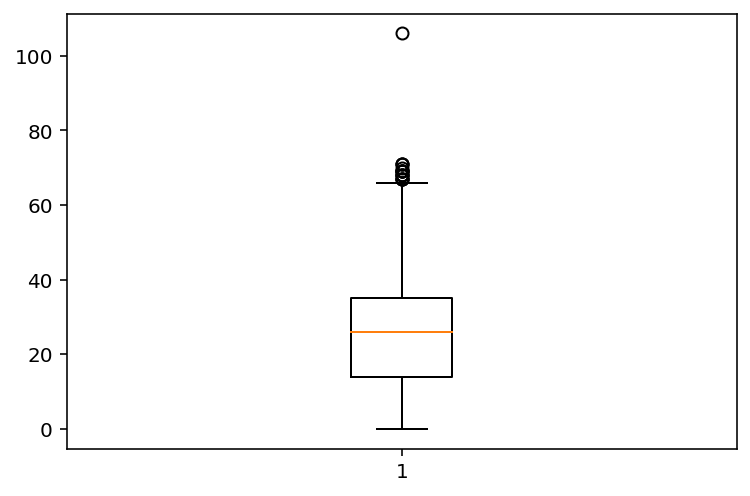

In [275]:
plt.boxplot(malware_sum)

It is interesting to note that some applications have been categorised as malware despite acting like none of our recorded behaviours. 

The biggest amount of behaviours a malware has shown is 106. We can therefore say that the amount of different behaviours of malware has a high range. 

### Computing the same statistics for benign applications:

In [276]:
benign = data.loc[data['class'] == 'B']
benign = benign.drop(['class'], axis=1)
benign.loc[:,'Total'] = benign.sum(axis = 1)
benign_sum = benign.loc[:,'Total']

In [277]:
benign.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,android.telephony.SmsManager,READ_PHONE_STATE,getBinder,ClassLoader,Landroid.content.Context.registerReceiver,Ljava.lang.Class.getField,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,RECEIVE_SMS,Ljava.lang.Class.getDeclaredField,READ_SMS,getCallingUid,Ljavax.crypto.spec.SecretKeySpec,android.intent.action.BOOT_COMPLETED,USE_CREDENTIALS,MANAGE_ACCOUNTS,android.content.pm.PackageInfo,KeySpec,TelephonyManager.getLine1Number,DexClassLoader,HttpGet.init,SecretKey,Ljava.lang.Class.getMethod,System.loadLibrary,android.intent.action.SEND,Ljavax.crypto.Cipher,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,android.telephony.gsm.SmsManager,WRITE_HISTORY_BOOKMARKS,TelephonyManager.getSubscriberId,mount,INSTALL_PACKAGES,Runtime.getRuntime,CAMERA,Ljava.lang.Object.getClass,WRITE_SYNC_SETTINGS,READ_HISTORY_BOOKMARKS,Ljava.lang.Class.forName,INTERNET,android.intent.action.PACKAGE_REPLACED,Binder,android.intent.action.SEND_MULTIPLE,RECORD_AUDIO,IBinder,android.os.IBinder,createSubprocess,NFC,ACCESS_LOCATION_EXTRA_COMMANDS,URLClassLoader,WRITE_APN_SETTINGS,abortBroadcast,BIND_REMOTEVIEWS,android.intent.action.TIME_SET,READ_PROFILE,TelephonyManager.getDeviceId,MODIFY_AUDIO_SETTINGS,getCallingPid,READ_SYNC_STATS,BROADCAST_STICKY,android.intent.action.PACKAGE_REMOVED,android.intent.action.TIMEZONE_CHANGED,WAKE_LOCK,RECEIVE_BOOT_COMPLETED,RESTART_PACKAGES,Ljava.lang.Class.getPackage,chmod,Ljava.lang.Class.getDeclaredClasses,android.intent.action.ACTION_POWER_DISCONNECTED,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,READ_EXTERNAL_STORAGE,sendMultipartTextMessage,PackageInstaller,VIBRATE,remount,android.intent.action.ACTION_SHUTDOWN,sendDataMessage,ACCESS_NETWORK_STATE,chown,HttpPost.init,Ljava.lang.Class.getClasses,SUBSCRIBED_FEEDS_READ,TelephonyManager.isNetworkRoaming,CHANGE_WIFI_MULTICAST_STATE,WRITE_CALENDAR,android.intent.action.PACKAGE_DATA_CLEARED,MASTER_CLEAR,HttpUriRequest,UPDATE_DEVICE_STATS,WRITE_CALL_LOG,DELETE_PACKAGES,GET_TASKS,GLOBAL_SEARCH,DELETE_CACHE_FILES,WRITE_USER_DICTIONARY,android.intent.action.PACKAGE_CHANGED,android.intent.action.NEW_OUTGOING_CALL,REORDER_TASKS,WRITE_PROFILE,SET_WALLPAPER,BIND_INPUT_METHOD,divideMessage,READ_SOCIAL_STREAM,READ_USER_DICTIONARY,PROCESS_OUTGOING_CALLS,CALL_PRIVILEGED,Runtime.exec,BIND_WALLPAPER,RECEIVE_WAP_PUSH,DUMP,BATTERY_STATS,ACCESS_COARSE_LOCATION,SET_TIME,android.intent.action.SENDTO,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,IRemoteService,KILL_BACKGROUND_PROCESSES,SET_ALARM,ACCOUNT_MANAGER,/system/app,android.intent.action.CALL,STATUS_BAR,TelephonyManager.getSimOperator,PERSISTENT_ACTIVITY,CHANGE_NETWORK_STATE,onBind,Process.start,android.intent.action.SCREEN_ON,Context.bindService,RECEIVE_MMS,SET_TIME_ZONE,android.intent.action.BATTERY_OKAY,CONTROL_LOCATION_UPDATES,BROADCAST_WAP_PUSH,BIND_ACCESSIBILITY_SERVICE,ADD_VOICEMAIL,CALL_PHONE,ProcessBuilder,BIND_APPWIDGET,FLASHLIGHT,READ_LOGS,Ljava.lang.Class.getResource,defineClass,SET_PROCESS_LIMIT,android.intent.action.PACKAGE_RESTARTED,MOUNT_UNMOUNT_FILESYSTEMS,BIND_TEXT_SERVICE,INSTALL_LOCATION_PROVIDER,android.intent.action.CALL_BUTTON,android.intent.action.SCREEN_OFF,findClass,SYSTEM_ALERT_WINDOW,MOUNT_FORMAT_FILESYSTEMS,CHANGE_CONFIGURATION,CLEAR_APP_USER_DATA,intent.action.RUN,android.intent.action.SET_WALLPAPER,CHANGE_WIFI_STATE,READ_FRAME_BUFFER,ACCESS_SURFACE_FLINGER,Runtime.loadLibrary,BROADCAST_SMS,EXPAND_STATUS_BAR,INTERNAL_SYSTEM_WINDOW,android.intent.action.BATTERY_LOW,SET_ACTIVITY_WATCHER,WRITE_CONTACTS,android.intent.action

In [278]:
benign_sum.head()

5560    51
5561    58
5562    21
5563     0
5564     5
Name: Total, dtype: int64

In [279]:
benign_sum.describe()

count    9476.000000
mean       37.552026
std        21.865222
min         0.000000
25%        20.000000
50%        40.000000
75%        53.000000
max       112.000000
Name: Total, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x123538c50>,
 'caps': [<matplotlib.lines.Line2D at 0x123b68e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x123b68a10>],
 'medians': [<matplotlib.lines.Line2D at 0x1250c4e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1250c4350>],
 'means': []}

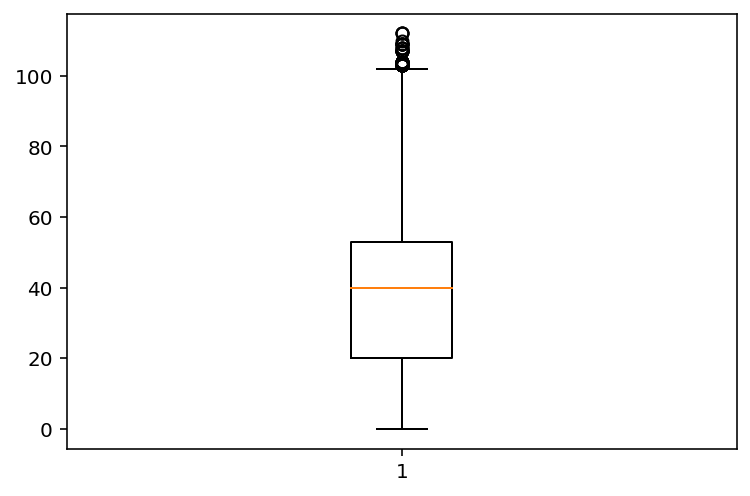

In [280]:
plt.boxplot(benign_sum)

The biggest amount of behaviours a benign application has shown is 112, which is higher than the maximum amount for a malware (106). Therefore, we can conclude that the number of behaviours is not predictive of the class of an application. On average the benign applications act according to a bigger variety of behaviours than the malware.

## Comparison of the different behaviours observed on both benign and malicious applications:

In [282]:
benign2 = data.loc[data['class'] == 'B']
benign2 = benign2.drop(['class'], axis=1)
benign2_sum = benign2.loc['Total', :] = benign2.sum(axis = 0)

In [283]:
benign2_sum = benign2_sum.sort_values(ascending=False) 
benign2_sum.head(10).reset_index()

,index,0
0,Binder,8122
1,IBinder,8030
2,android.os.IBinder,8029
3,INTERNET,7771
4,Ljava.lang.Object.getClass,7645
5,android.content.pm.PackageInfo,7410
6,ACCESS_NETWORK_STATE,7209
7,onBind,6676
8,Ljava.lang.Class.forName,6669
9,android.os.Binder,6623


In [284]:
benign2_sum.sort_values(ascending=True).head(10)

createSubprocess                       4
BIND_VPN_SERVICE                       8
SET_ACTIVITY_WATCHER                  15
Runtime.loadLibrary                   15
CONTROL_LOCATION_UPDATES              22
BIND_TEXT_SERVICE                     23
android.intent.action.BATTERY_OKAY    27
ADD_VOICEMAIL                         30
DELETE_CACHE_FILES                    30
INSTALL_LOCATION_PROVIDER             30
dtype: int64

In [285]:
malware2 = data.loc[data['class'] == 'S']
malware2 = malware2.drop(['class'], axis=1)
malware2_sum = malware2.loc['Total', :] = malware2.sum(axis = 0)

In [286]:
malware2_sum = malware2_sum.sort_values(ascending=False) 
malware2_sum.head(10).reset_index()

,index,0
0,INTERNET,5340
1,READ_PHONE_STATE,4946
2,Binder,3770
3,android.os.IBinder,3758
4,IBinder,3758
5,WRITE_EXTERNAL_STORAGE,3727
6,ACCESS_NETWORK_STATE,3680
7,TelephonyManager.getDeviceId,3646
8,onBind,3645
9,android.intent.action.BOOT_COMPLETED,3630


In [287]:
index_list = malware2_sum.head(10).reset_index()['index'].values

In [288]:
zero_list=malware2_sum.head(10).reset_index()[0].values


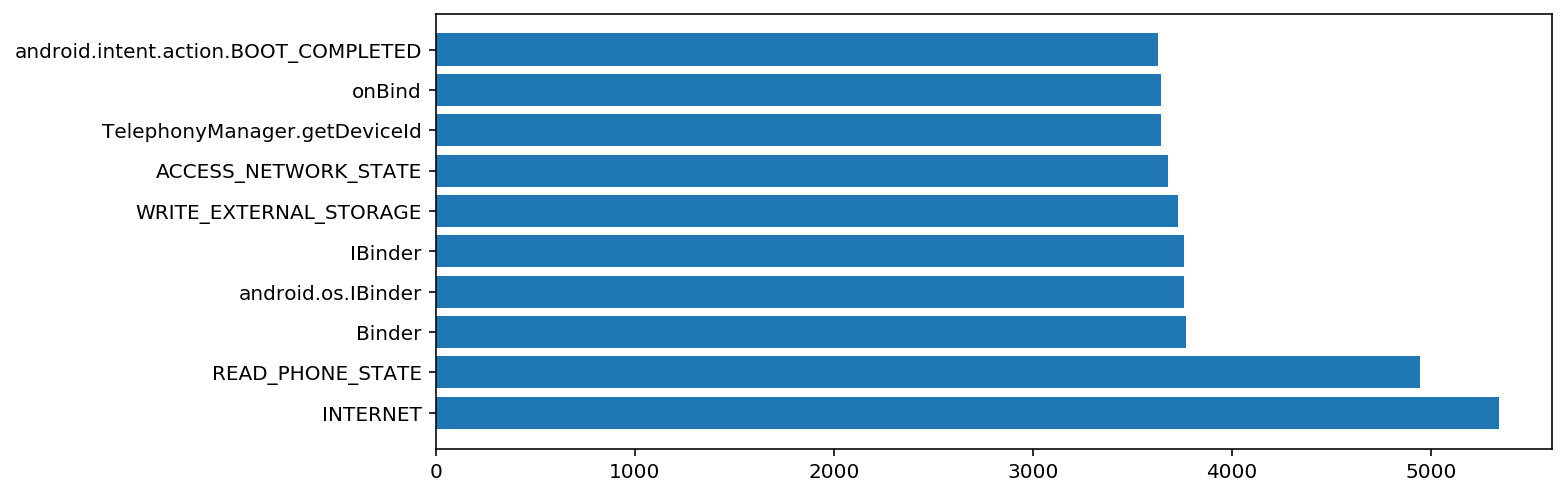

In [289]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.barh(index_list, zero_list)

plt.show()

And now for the benign apps:

In [290]:
index_listb = benign2_sum.head(10).reset_index()['index'].values

In [291]:
zero_listb=benign2_sum.head(10).reset_index()[0].values

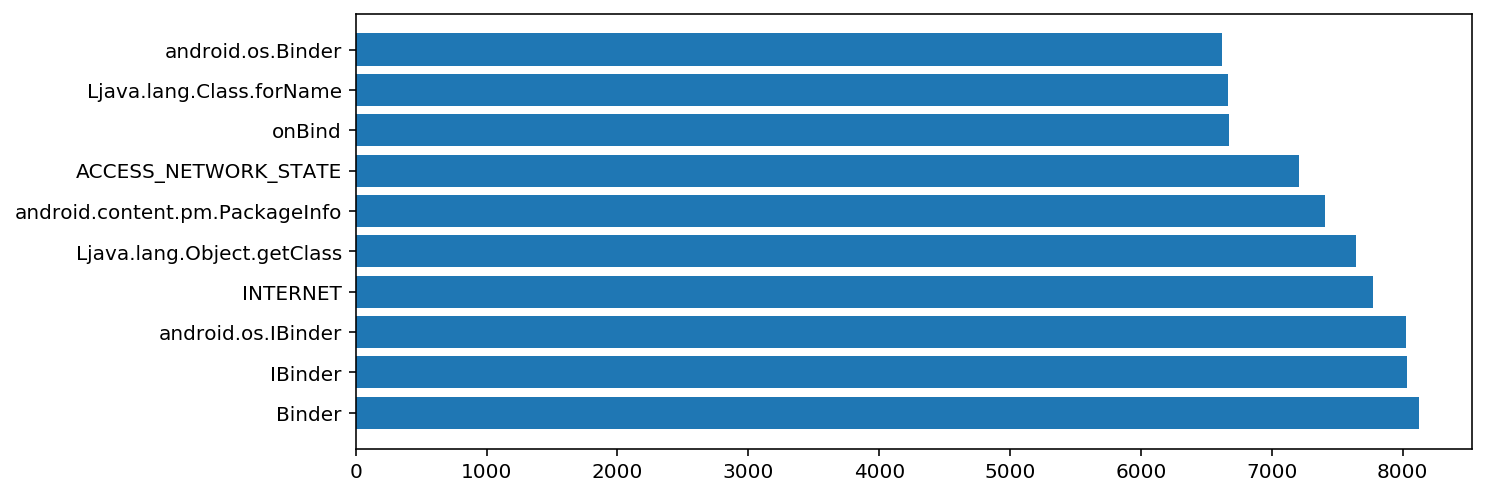

In [292]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.barh(index_listb, zero_listb)

plt.show()

The two graphs show that the 10 most common behaviours differ slightly from benign to malware applications. The most common one for malware is 'INTERNET', and 'Binder' for benign apps.

Let's go further by calculating the percentages of these two behaviours:

In [293]:
print('Percentage of malicious applications displaying an "INTERNET" behaviour: ' + str((5340/5560)*100) + ' %')
print('Percentage of benign applications displaying a "Binder" behaviour: ' + str((8122/9476)*100) + ' %')

Percentage of malicious applications displaying an "INTERNET" behaviour: 96.0431654676259 %
Percentage of benign applications displaying a "Binder" behaviour: 85.71127057830307 %


### Finding the permission which has the greatest probability of being requested by a malware (vs a benign application):

In [294]:
list_s = malware2_sum.reset_index().sort_values(by=['index'])[0].to_list()

In [295]:
list_s

[709,
 954,
 1800,
 1673,
 605,
 57,
 3680,
 5,
 2432,
 4,
 0,
 1,
 54,
 1,
 6,
 32,
 7,
 0,
 0,
 0,
 273,
 207,
 185,
 33,
 36,
 12,
 3770,
 735,
 6,
 231,
 45,
 184,
 400,
 2,
 985,
 81,
 4,
 50,
 1433,
 0,
 119,
 268,
 91,
 469,
 2,
 316,
 87,
 100,
 443,
 96,
 735,
 57,
 32,
 1886,
 2781,
 3261,
 3758,
 1,
 825,
 10,
 5340,
 14,
 147,
 1542,
 1356,
 966,
 254,
 2660,
 242,
 106,
 10,
 1319,
 1049,
 2177,
 144,
 866,
 2289,
 3298,
 686,
 1468,
 1229,
 10,
 2,
 73,
 125,
 3,
 235,
 0,
 1,
 15,
 225,
 305,
 9,
 0,
 403,
 59,
 0,
 1299,
 334,
 27,
 1003,
 519,
 4946,
 0,
 2085,
 0,
 30,
 1,
 1,
 27,
 2700,
 186,
 2139,
 160,
 122,
 11,
 753,
 1477,
 1616,
 3,
 0,
 2999,
 1,
 207,
 28,
 46,
 1,
 1,
 1,
 527,
 75,
 100,
 10,
 1,
 342,
 1521,
 462,
 1071,
 198,
 3646,
 2335,
 2435,
 1115,
 1042,
 1914,
 134,
 166,
 15,
 3,
 1633,
 2131,
 563,
 72,
 0,
 542,
 3727,
 1,
 916,
 0,
 241,
 687,
 1244,
 0,
 45,
 0,
 1064,
 2665,
 465,
 295,
 10,
 14,
 56,
 56,
 3630,
 3,
 2,
 184,
 163,
 31,
 0

In [296]:
list_b = benign2_sum.reset_index().sort_values(by=['index'])[0].to_list()

In [297]:
len(list_b)

214

In [298]:
p=[]
for i in range (len(list_b)) :
    p.append(list_s[i]/(list_b[i]+list_s[i]))
    

In [299]:
p

[0.3078593139383413,
 0.44372093023255815,
 0.4234297812279464,
 0.3825748913789161,
 0.7766367137355584,
 0.285,
 0.33795573514555977,
 0.11627906976744186,
 0.3723208818126148,
 0.04938271604938271,
 0.0,
 0.0010330578512396695,
 0.1588235294117647,
 0.023809523809523808,
 0.09230769230769231,
 0.14545454545454545,
 0.0440251572327044,
 0.0,
 0.0,
 0.0,
 0.5711297071129707,
 0.173512154233026,
 0.23717948717948717,
 0.22916666666666666,
 0.04681404421326398,
 0.12244897959183673,
 0.31701984527413385,
 0.42757417102966844,
 0.04411764705882353,
 0.1124634858812074,
 0.3146853146853147,
 0.47668393782383417,
 0.2921840759678597,
 0.010638297872340425,
 0.40468364831553,
 0.3767441860465116,
 0.09090909090909091,
 0.6944444444444444,
 0.18306080735820132,
 0.0,
 0.7986577181208053,
 0.6473429951690821,
 0.3473282442748092,
 0.40500863557858374,
 0.019801980198019802,
 0.1031331592689295,
 0.2779552715654952,
 0.2506265664160401,
 0.09861976847729297,
 0.3609022556390977,
 0.27767283717

In [300]:
list_names = benign2_sum.reset_index().sort_values(by=['index'])['index'].to_list()
dict = {'behavior': list_names, 'stats': p}
list_all =[list_names,p]
table = pd.DataFrame(dict)

In [301]:
table.sort_values(['stats'], ascending=False)

,behavior,stats
199,createSubprocess,0.987138
194,android.telephony.gsm.SmsManager,0.909910
121,SEND_SMS,0.842889
193,android.telephony.SmsManager,0.810054
40,DELETE_CACHE_FILES,0.798658
151,WRITE_APN_SETTINGS,0.788515
58,INSTALL_PACKAGES,0.784221
4,ACCESS_LOCATION_EXTRA_COMMANDS,0.776637
157,WRITE_HISTORY_BOOKMARKS,0.767812
198,chown,0.764706


When an application asks for the 'createSubprocess' access, we are 98% sure that is malware. 'android.telephony.gsm.SmsManager', 'SEND_SMS' and 'android.telephony.SmsManager' are all behaviours that are associated with a very high probability of malicious activity (all have a probability superior than 80%).

### Classification

In the following we applied our set of classifiers to predict the class attribute. We did not scale our data since all data points are binary, hence on the same scale.

In [12]:
from sklearn.model_selection import train_test_split


# Split dataset up into train and test sets
X_train, X_test0, y_train, y_test0 = train_test_split(
    data.drop(['class'], axis=1), 
   data['class'], 
    test_size=0.2
)

In [13]:
X_test = data.drop('class', axis=1)
y_test= data['class']

In [14]:
X_train.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,Ljava.net.URLDecoder,android.content.pm.Signature,android.telephony.SmsManager,READ_PHONE_STATE,getBinder,ClassLoader,Landroid.content.Context.registerReceiver,Ljava.lang.Class.getField,Landroid.content.Context.unregisterReceiver,GET_ACCOUNTS,RECEIVE_SMS,Ljava.lang.Class.getDeclaredField,READ_SMS,getCallingUid,Ljavax.crypto.spec.SecretKeySpec,android.intent.action.BOOT_COMPLETED,USE_CREDENTIALS,MANAGE_ACCOUNTS,android.content.pm.PackageInfo,KeySpec,TelephonyManager.getLine1Number,DexClassLoader,HttpGet.init,SecretKey,Ljava.lang.Class.getMethod,System.loadLibrary,android.intent.action.SEND,Ljavax.crypto.Cipher,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,android.telephony.gsm.SmsManager,WRITE_HISTORY_BOOKMARKS,TelephonyManager.getSubscriberId,mount,INSTALL_PACKAGES,Runtime.getRuntime,CAMERA,Ljava.lang.Object.getClass,WRITE_SYNC_SETTINGS,READ_HISTORY_BOOKMARKS,Ljava.lang.Class.forName,INTERNET,android.intent.action.PACKAGE_REPLACED,Binder,android.intent.action.SEND_MULTIPLE,RECORD_AUDIO,IBinder,android.os.IBinder,createSubprocess,NFC,ACCESS_LOCATION_EXTRA_COMMANDS,URLClassLoader,WRITE_APN_SETTINGS,abortBroadcast,BIND_REMOTEVIEWS,android.intent.action.TIME_SET,READ_PROFILE,TelephonyManager.getDeviceId,MODIFY_AUDIO_SETTINGS,getCallingPid,READ_SYNC_STATS,BROADCAST_STICKY,android.intent.action.PACKAGE_REMOVED,android.intent.action.TIMEZONE_CHANGED,WAKE_LOCK,RECEIVE_BOOT_COMPLETED,RESTART_PACKAGES,Ljava.lang.Class.getPackage,chmod,Ljava.lang.Class.getDeclaredClasses,android.intent.action.ACTION_POWER_DISCONNECTED,android.intent.action.PACKAGE_ADDED,PathClassLoader,TelephonyManager.getSimSerialNumber,Runtime.load,TelephonyManager.getCallState,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,READ_EXTERNAL_STORAGE,sendMultipartTextMessage,PackageInstaller,VIBRATE,remount,android.intent.action.ACTION_SHUTDOWN,sendDataMessage,ACCESS_NETWORK_STATE,chown,HttpPost.init,Ljava.lang.Class.getClasses,SUBSCRIBED_FEEDS_READ,TelephonyManager.isNetworkRoaming,CHANGE_WIFI_MULTICAST_STATE,WRITE_CALENDAR,android.intent.action.PACKAGE_DATA_CLEARED,MASTER_CLEAR,HttpUriRequest,UPDATE_DEVICE_STATS,WRITE_CALL_LOG,DELETE_PACKAGES,GET_TASKS,GLOBAL_SEARCH,DELETE_CACHE_FILES,WRITE_USER_DICTIONARY,android.intent.action.PACKAGE_CHANGED,android.intent.action.NEW_OUTGOING_CALL,REORDER_TASKS,WRITE_PROFILE,SET_WALLPAPER,BIND_INPUT_METHOD,divideMessage,READ_SOCIAL_STREAM,READ_USER_DICTIONARY,PROCESS_OUTGOING_CALLS,CALL_PRIVILEGED,Runtime.exec,BIND_WALLPAPER,RECEIVE_WAP_PUSH,DUMP,BATTERY_STATS,ACCESS_COARSE_LOCATION,SET_TIME,android.intent.action.SENDTO,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,TelephonyManager.getNetworkOperator,/system/bin,MessengerService,BIND_DEVICE_ADMIN,WRITE_GSERVICES,IRemoteService,KILL_BACKGROUND_PROCESSES,SET_ALARM,ACCOUNT_MANAGER,/system/app,android.intent.action.CALL,STATUS_BAR,TelephonyManager.getSimOperator,PERSISTENT_ACTIVITY,CHANGE_NETWORK_STATE,onBind,Process.start,android.intent.action.SCREEN_ON,Context.bindService,RECEIVE_MMS,SET_TIME_ZONE,android.intent.action.BATTERY_OKAY,CONTROL_LOCATION_UPDATES,BROADCAST_WAP_PUSH,BIND_ACCESSIBILITY_SERVICE,ADD_VOICEMAIL,CALL_PHONE,ProcessBuilder,BIND_APPWIDGET,FLASHLIGHT,READ_LOGS,Ljava.lang.Class.getResource,defineClass,SET_PROCESS_LIMIT,android.intent.action.PACKAGE_RESTARTED,MOUNT_UNMOUNT_FILESYSTEMS,BIND_TEXT_SERVICE,INSTALL_LOCATION_PROVIDER,android.intent.action.CALL_BUTTON,android.intent.action.SCREEN_OFF,findClass,SYSTEM_ALERT_WINDOW,MOUNT_FORMAT_FILESYSTEMS,CHANGE_CONFIGURATION,CLEAR_APP_USER_DATA,intent.action.RUN,android.intent.action.SET_WALLPAPER,CHANGE_WIFI_STATE,READ_FRAME_BUFFER,ACCESS_SURFACE_FLINGER,Runtime.loadLibrary,BROADCAST_SMS,EXPAND_STATUS_BAR,INTERNAL_SYSTEM_WINDOW,android.intent.action.BATTERY_LOW,SET_ACTIVITY_WATCHER,WRITE_CONTACTS,android.intent.action

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.2s finished


elapsed time = 4.32
ACCURACY Test:  0.9793828145783453
ACCURACY Test0:  0.976063829787234
ACCURACY Train:  0.9802128367143332

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98      9476
     Class 1       0.98      0.96      0.97      5560

    accuracy                           0.98     15036
   macro avg       0.98      0.98      0.98     15036
weighted avg       0.98      0.98      0.98     15036


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98      1875
     Class 1       0.98      0.96      0.97      1133

    accuracy                           0.98      3008
   macro avg       0.98      0.97      0.97      3008
weighted avg       0.98      0.98      0.98      3008


--------------Classification Report Train-------------------

              precision    recal

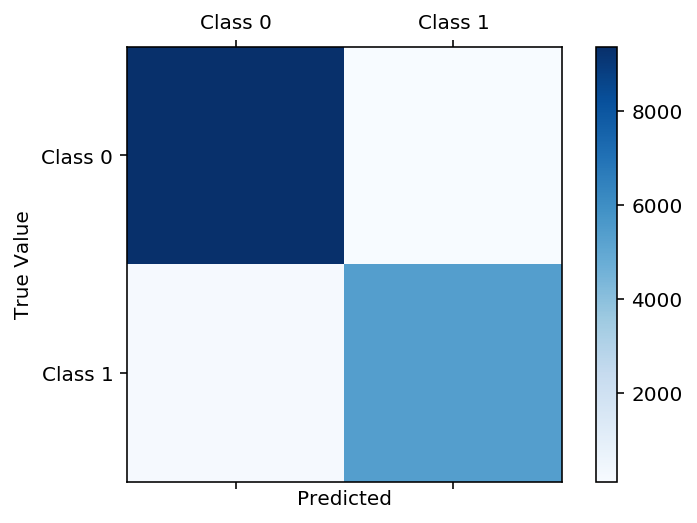

In [15]:
logistic_reg(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 0.23
ACCURACY Test:  0.9950784783187018
ACCURACY Test0:  0.9803856382978723
ACCURACY Train:  0.9987529098769538

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      9476
     Class 1       0.99      0.99      0.99      5560

    accuracy                           1.00     15036
   macro avg       0.99      0.99      0.99     15036
weighted avg       1.00      1.00      1.00     15036


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.98      1875
     Class 1       0.97      0.98      0.97      1133

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008


--------------Classification Report Train-------------------

              precision    reca

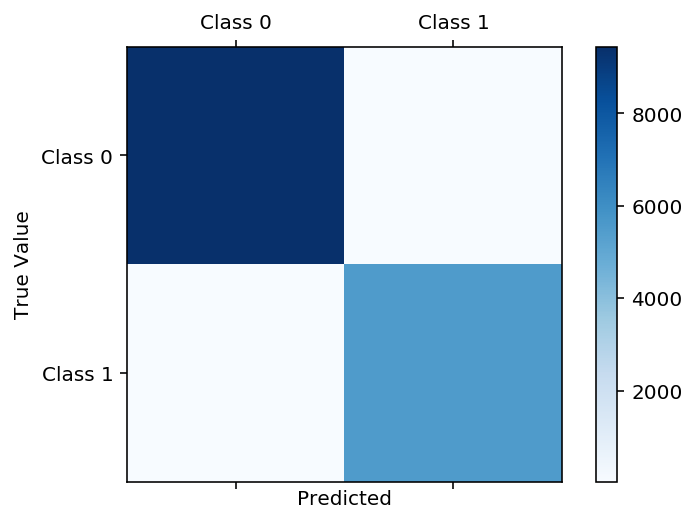

In [16]:
decision_tree(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


elapsed time = 0.85
ACCURACY Test:  0.9971401968608673
ACCURACY Test0:  0.9906914893617021
ACCURACY Train:  0.9987529098769538

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      9476
     Class 1       1.00      0.99      1.00      5560

    accuracy                           1.00     15036
   macro avg       1.00      1.00      1.00     15036
weighted avg       1.00      1.00      1.00     15036


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99      1875
     Class 1       0.99      0.98      0.99      1133

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008


--------------Classification Report Train-------------------

              precision    reca

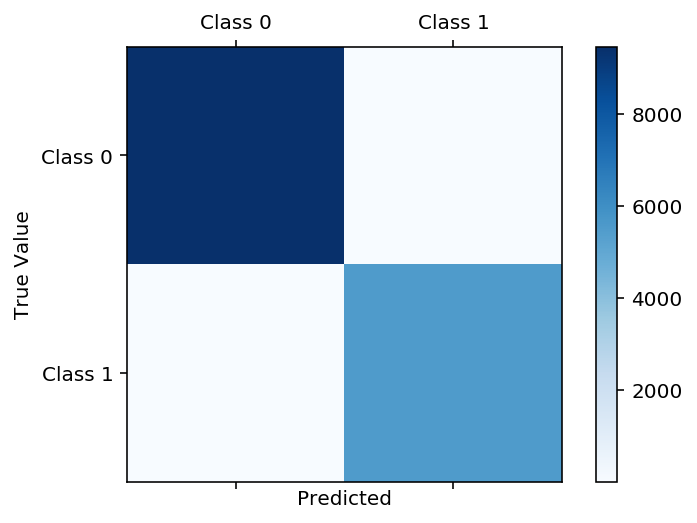

In [17]:
randomforest(X_train, y_train, X_test, y_test, X_test0, y_test0)

elapsed time = 0.20
ACCURACY Test:  0.7155493482309124
ACCURACY Test0:  0.7174202127659575
ACCURACY Train:  0.7150814765547057

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.98      0.56      0.71      9476
     Class 1       0.57      0.98      0.72      5560

    accuracy                           0.72     15036
   macro avg       0.77      0.77      0.72     15036
weighted avg       0.83      0.72      0.71     15036


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.98      0.56      0.71      1875
     Class 1       0.57      0.98      0.72      1133

    accuracy                           0.72      3008
   macro avg       0.78      0.77      0.72      3008
weighted avg       0.83      0.72      0.72      3008


--------------Classification Report Train-------------------

              precision    reca

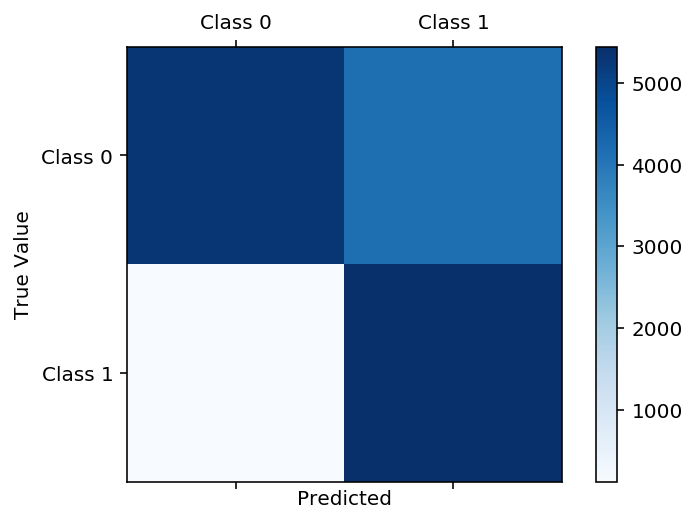

In [18]:
gaussiannb(X_train, y_train, X_test, y_test, X_test0, y_test0)

Iteration 1, loss = 0.58053191
Iteration 2, loss = 0.22953994
Iteration 3, loss = 0.11928147
Iteration 4, loss = 0.09007208
Iteration 5, loss = 0.07703625
Iteration 6, loss = 0.06899569
Iteration 7, loss = 0.06256577
Iteration 8, loss = 0.05825747
Iteration 9, loss = 0.05494553
Iteration 10, loss = 0.05176353
Iteration 11, loss = 0.04894744
Iteration 12, loss = 0.04668128
Iteration 13, loss = 0.04516781
Iteration 14, loss = 0.04240690
Iteration 15, loss = 0.04144402
Iteration 16, loss = 0.03990094
Iteration 17, loss = 0.03861167
Iteration 18, loss = 0.03816519
Iteration 19, loss = 0.03517305
Iteration 20, loss = 0.03535312
Iteration 21, loss = 0.03322369
Iteration 22, loss = 0.03179163
Iteration 23, loss = 0.03127627
Iteration 24, loss = 0.02973198
Iteration 25, loss = 0.02961242
Iteration 26, loss = 0.02938404
Iteration 27, loss = 0.02770379
Iteration 28, loss = 0.02713027
Iteration 29, loss = 0.02566724
Iteration 30, loss = 0.02468314
Iteration 31, loss = 0.02449522
Iteration 32, los

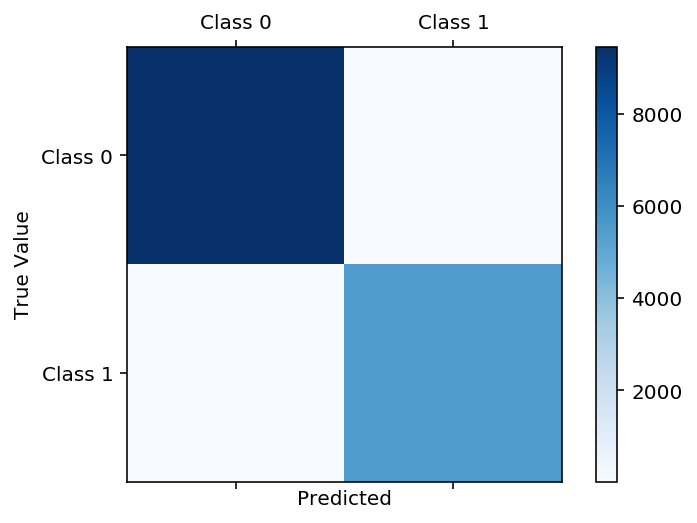

In [19]:
NeuralNetwork(X_train, y_train, X_test, y_test, X_test0, y_test0)

[LibSVM]elapsed time = 10.70
ACCURACY Test:  0.9858339984038308
ACCURACY Test0:  0.9817154255319149
ACCURACY Train:  0.9868639840372464

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99      9476
     Class 1       0.99      0.97      0.98      5560

    accuracy                           0.99     15036
   macro avg       0.99      0.98      0.98     15036
weighted avg       0.99      0.99      0.99     15036


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99      1875
     Class 1       0.99      0.97      0.98      1133

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008


--------------Classification Report Train-------------------

              precisio

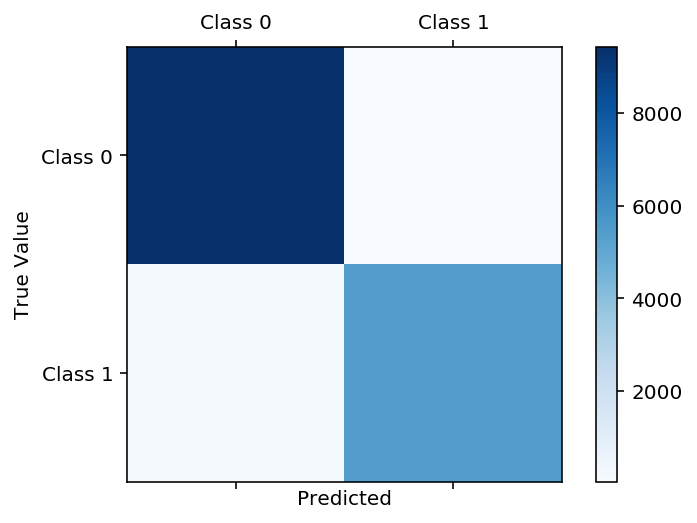

In [21]:
SupportVectorMachine(X_train, y_train, X_test, y_test, X_test0, y_test0)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.6s remaining:    1.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished


elapsed time = 1.65
ACCURACY Test:  0.951316839584996
ACCURACY Test0:  0.9501329787234043
ACCURACY Train:  0.9516129032258065

--------------Classification Report Test-------------------

              precision    recall  f1-score   support

     Class 0       0.95      0.97      0.96      9476
     Class 1       0.95      0.92      0.93      5560

    accuracy                           0.95     15036
   macro avg       0.95      0.94      0.95     15036
weighted avg       0.95      0.95      0.95     15036


--------------Classification Report Test0-------------------

              precision    recall  f1-score   support

     Class 0       0.95      0.97      0.96      1875
     Class 1       0.94      0.92      0.93      1133

    accuracy                           0.95      3008
   macro avg       0.95      0.94      0.95      3008
weighted avg       0.95      0.95      0.95      3008


--------------Classification Report Train-------------------

              precision    recal

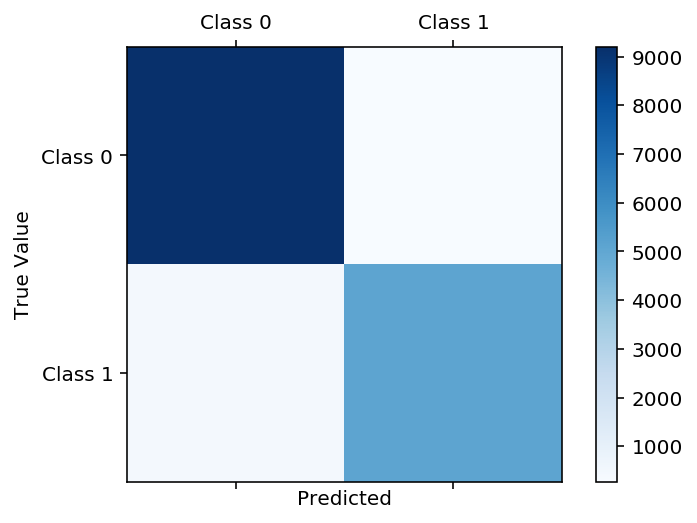

In [22]:
BaggingSVM(X_train, y_train, X_test, y_test, X_test0, y_test0)

The general results of the classifiers on the Android malware dataset in regard to predicting the class attirbute is very good.
Most notably, the random forest algorithm had the best accuracy performance on the second week test data which underlines its capability to generalize
effectively. This result is further supported by the confusion-matrix which shows that the algorithm only mistakenly classified in 5 instances class 0 as class 1 and 37 times
class 1 as class 0.